In [24]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
# import cvxpy as cvx
import os

from util import *
# from data_loader import * 
# from module_deconv import *
# from module_exp import *
from sc_deconv import *
from fig_gen import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import scanpy.api as sc
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import pairwise_distances

sc.settings.verbosity = 3                # increase for more output
sc.settings.set_dpi(100)                  # low pixel number yields small inline figures
sc.logging.print_version_and_date()

Running Scanpy 0.4.2 on 2018-02-20 12:03.


In [3]:
import seaborn as sns

[ 2.4   2.15  1.2  -0.7  -5.  ]
--- ccdf ---
>0.05: 90.48%
>0.1: 81.16%
>0.15: 70.55%
>0.2: 58.86%
>0.25: 46.61%
>0.3: 34.58%
>0.35: 25.74%
>0.4: 14.75%


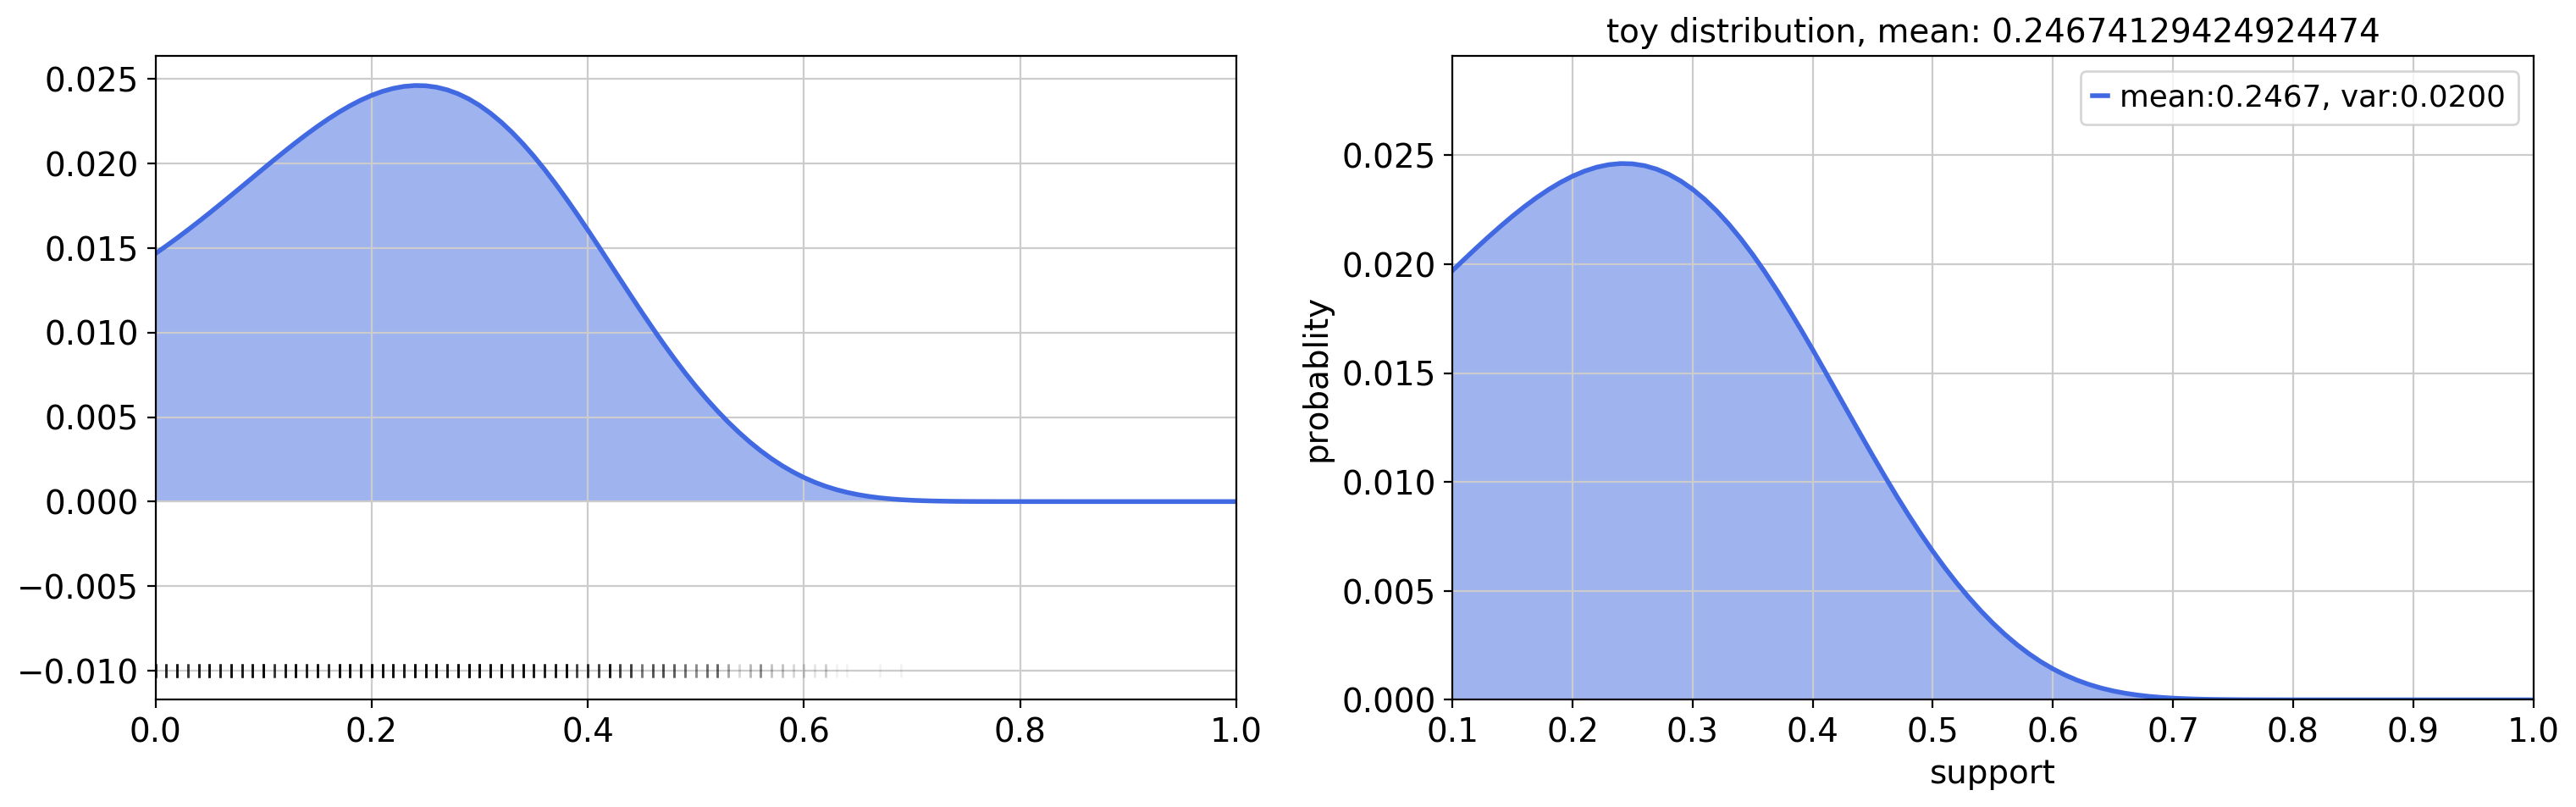

In [4]:
## creating a toy 1d distribution instance
np.random.seed(42)
p,x=toy_dist(vis=1,opt='1d_Q')

In [5]:
## generate the simulated read count data
N_c=8000
N_r=38
X,Y,data_info=data_gen_1d(p_hat,dd_info['x'],N_c,N_r,noise='poi',vis=1)

NameError: name 'p_hat' is not defined

### distribution estimation

In [ ]:
## distribution estimation
# input: Y  
# summary function: Y --> Y_pdf, Y_supp
# specify the scale of x and N_r 

p_hat,dd_info=dd_1d(Y,noise='poi',vis=1,N_r=None)
p_hat_ml,ml_info=ml_1d(Y)
_=plot_result_1d(p_hat,p_hat,p_hat_ml,dd_info,ml_info,data_info)

## 8k PBMC @ 100K rpc

In [6]:
filename_data = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/matrix.mtx'
filename_genes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/genes.tsv'
filename_barcodes = '/data/martin/single_cell/filtered_gene_bc_matrices/GRCh38/barcodes.tsv'

In [7]:
%%time
adata = sc.read(filename_data, cache=True).transpose()
adata.var_names = np.genfromtxt(filename_genes, dtype=str)[:, 1]
adata.smp_names = np.genfromtxt(filename_barcodes, dtype=str)
sc.logging.print_memory_usage()

Memory usage: current 0.25 GB, difference +0.25 GB
CPU times: user 1.54 s, sys: 169 ms, total: 1.71 s
Wall time: 1.88 s


CST3
Average counts per cell = 7.001789762558167


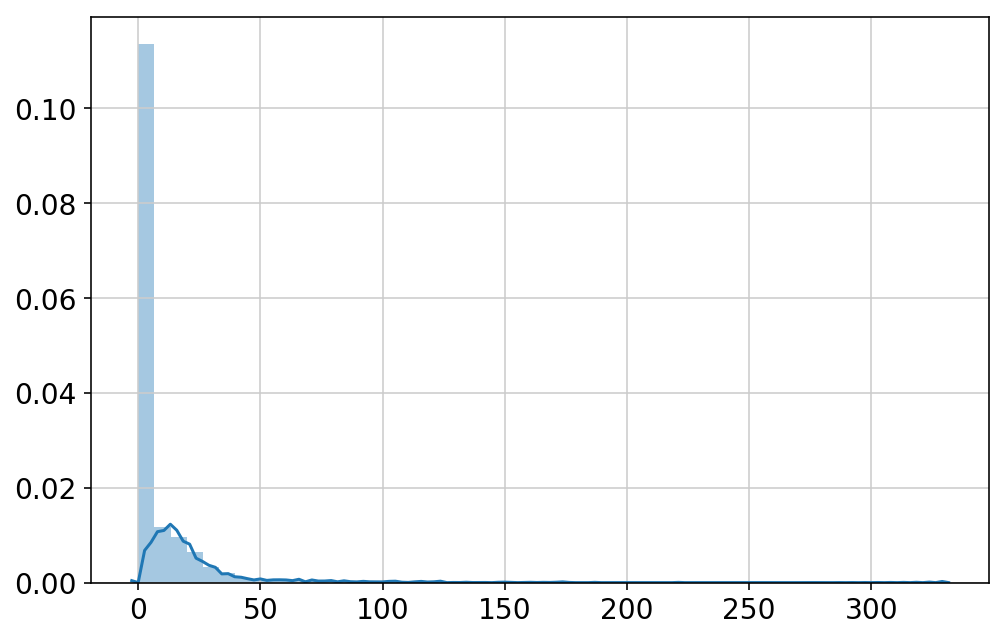

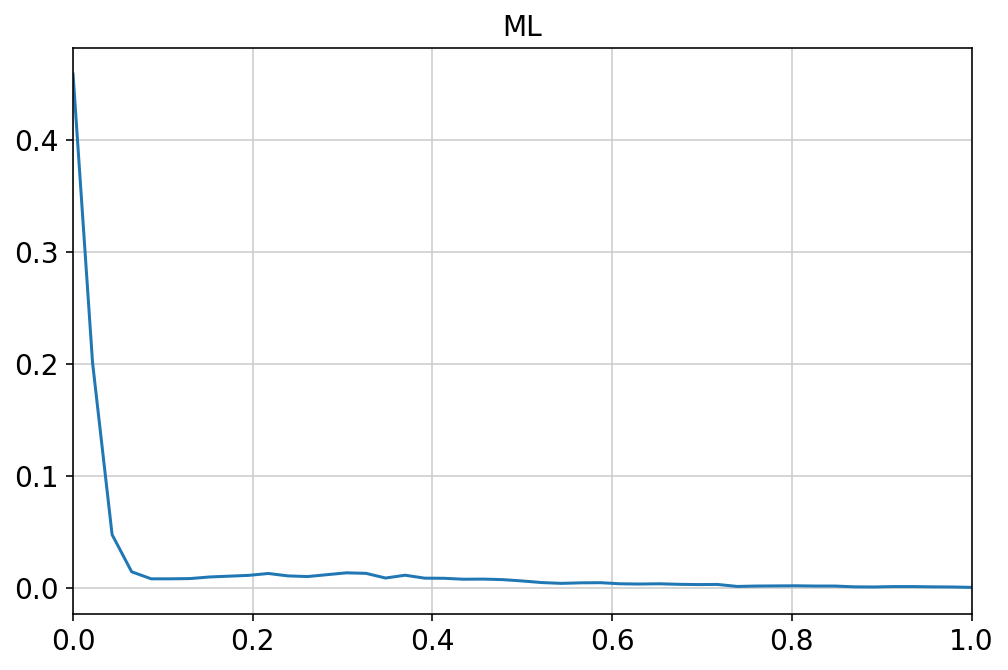

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 46

### debug: proportion separation ### start ###


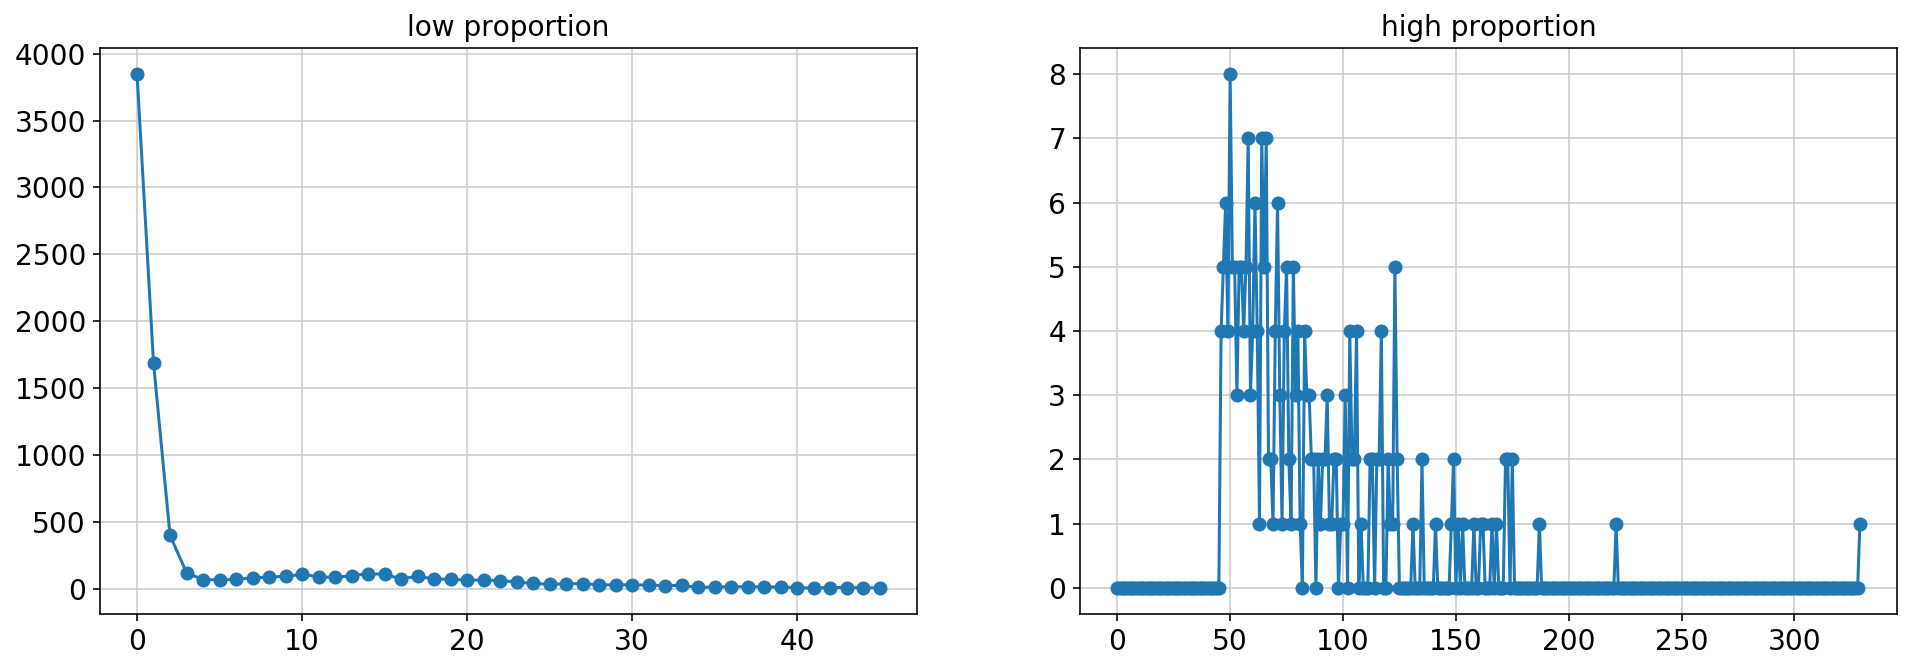

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.5280992492195935
-0.041347298918026354
-0.16270120806183286
-0.20434019054604846
-0.1198106569511026
Close-form gradients
[ 0.52809927 -0.04134728 -0.1627012  -0.20434017 -0.11981063]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.2010253812111347, reg:0.0025018558323716576
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  4.87488128  -4.50197554   9.591923   -10.66130511   0.69636087]
gamma:46


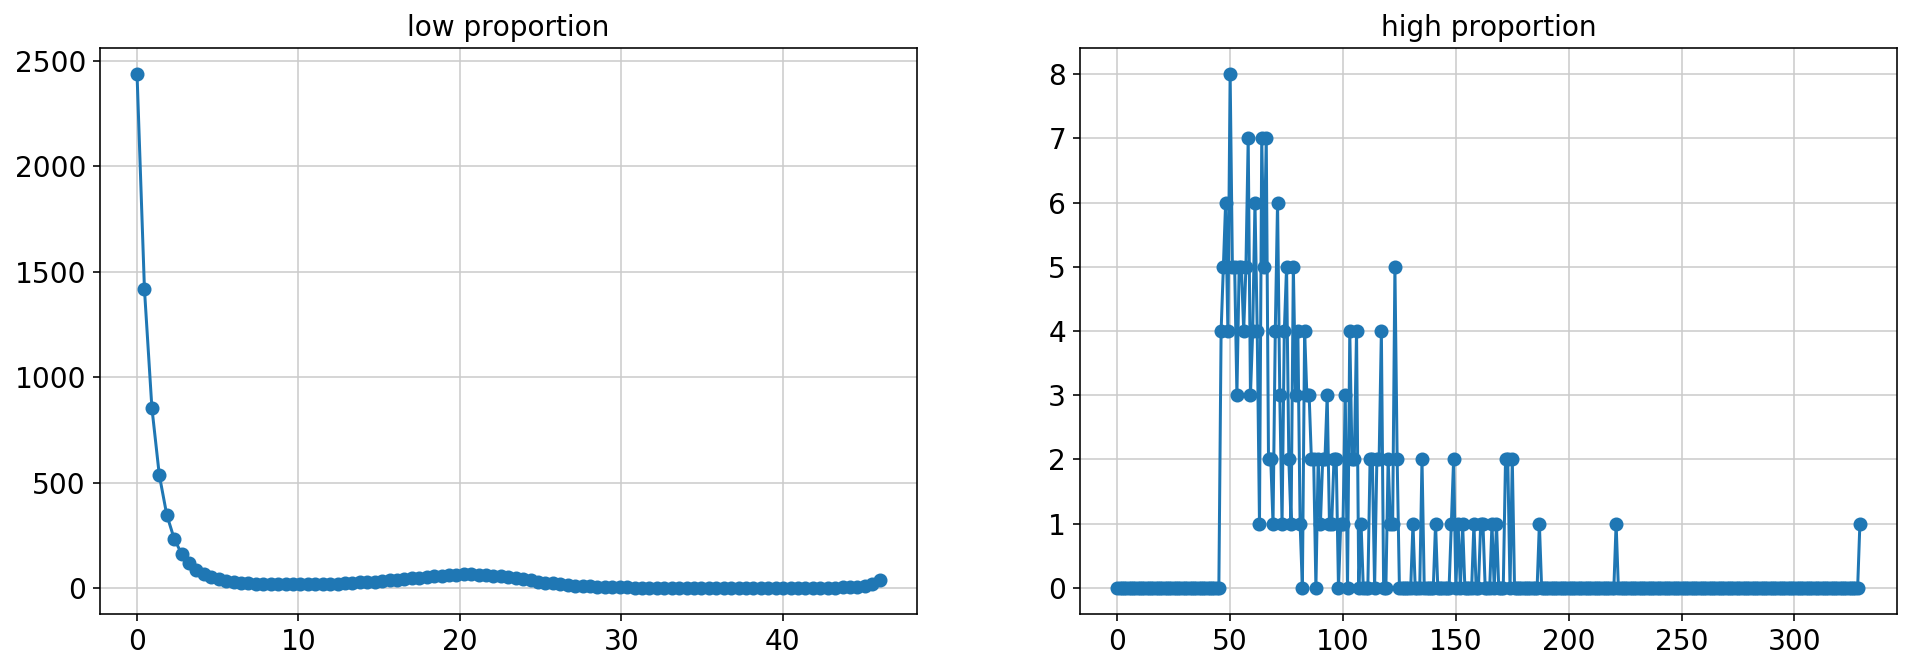

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:329.0


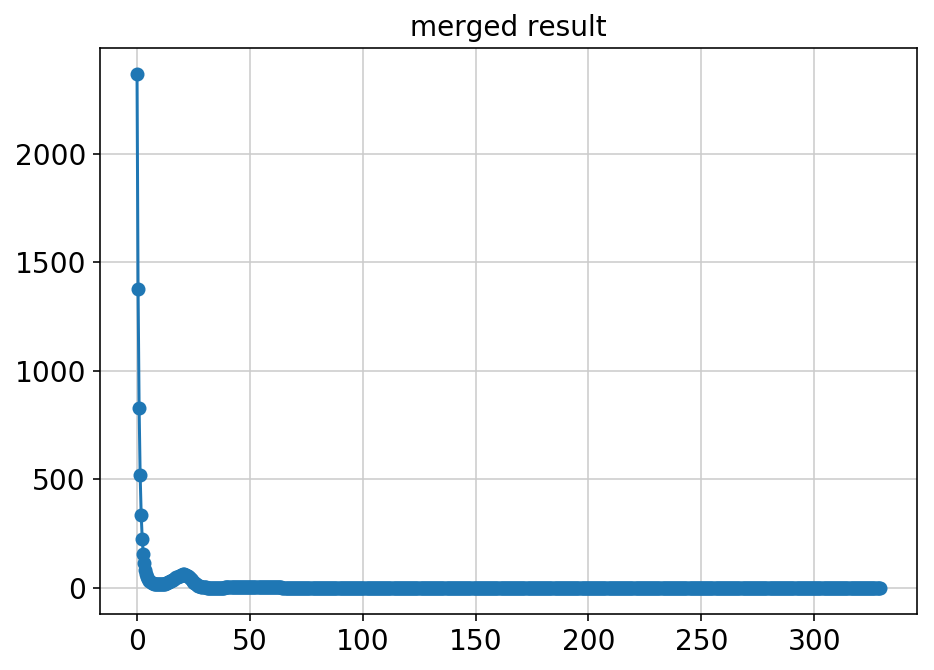

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 17.40%
>0.1: 3.925%
>0.15: 2.722%
>0.2: 1.717%
>0.25: 1.120%
>0.3: 0.747%
>0.35: 0.455%
>0.4: 0.279%


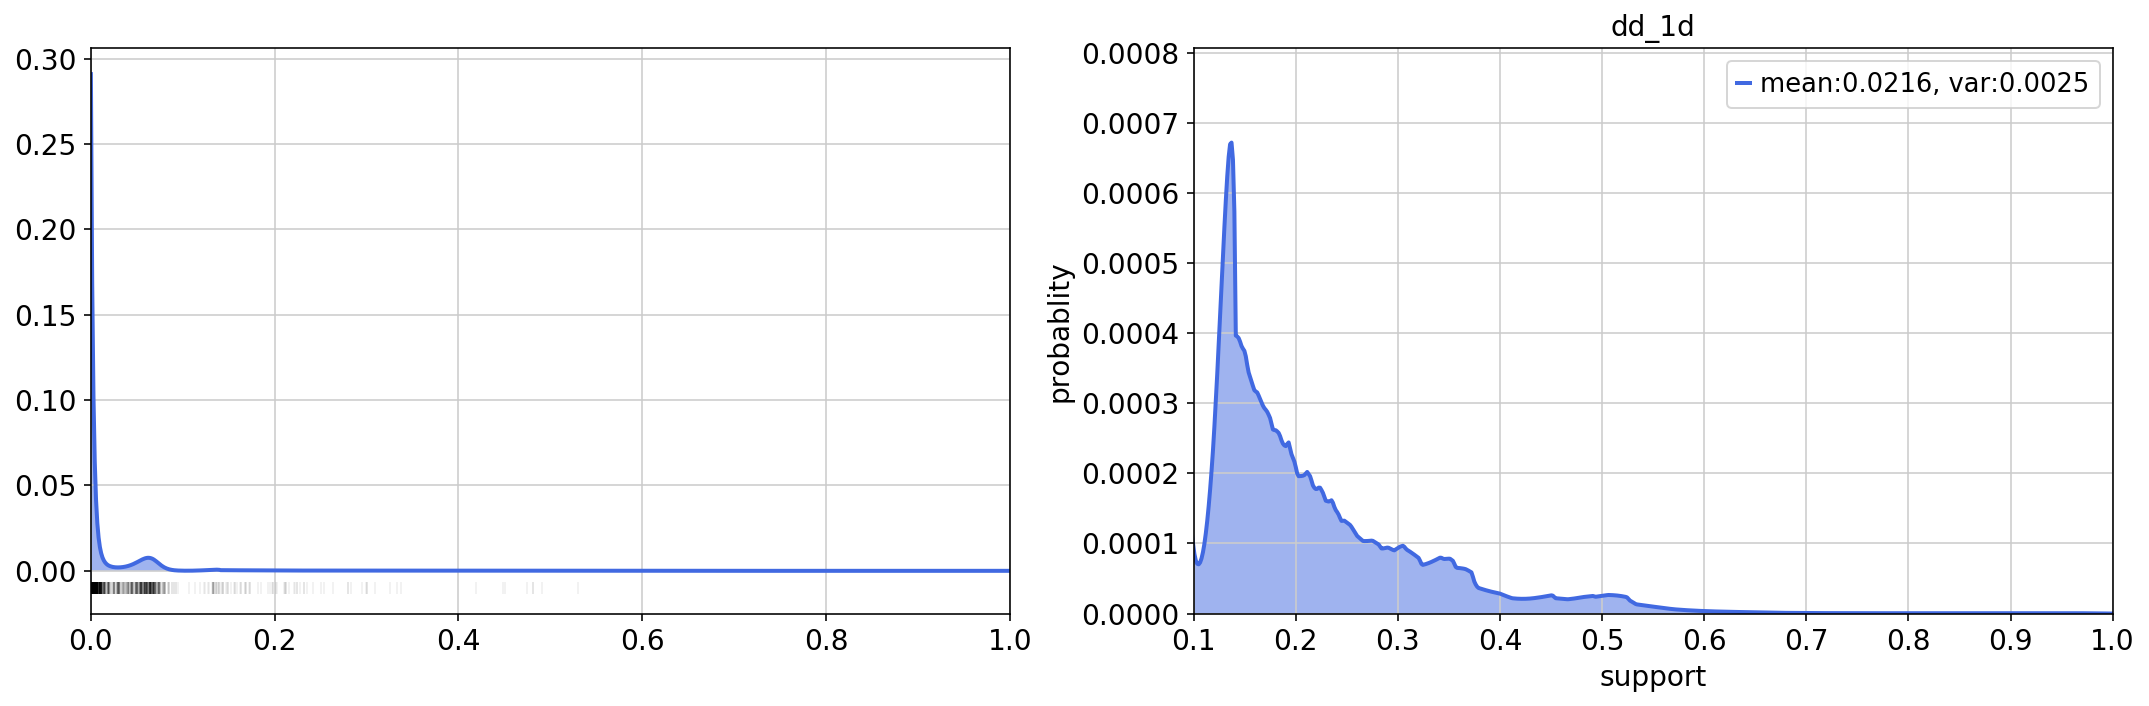

estimated gamma: 329.0
### N_r=469, mean_cts=9, N_c=20000


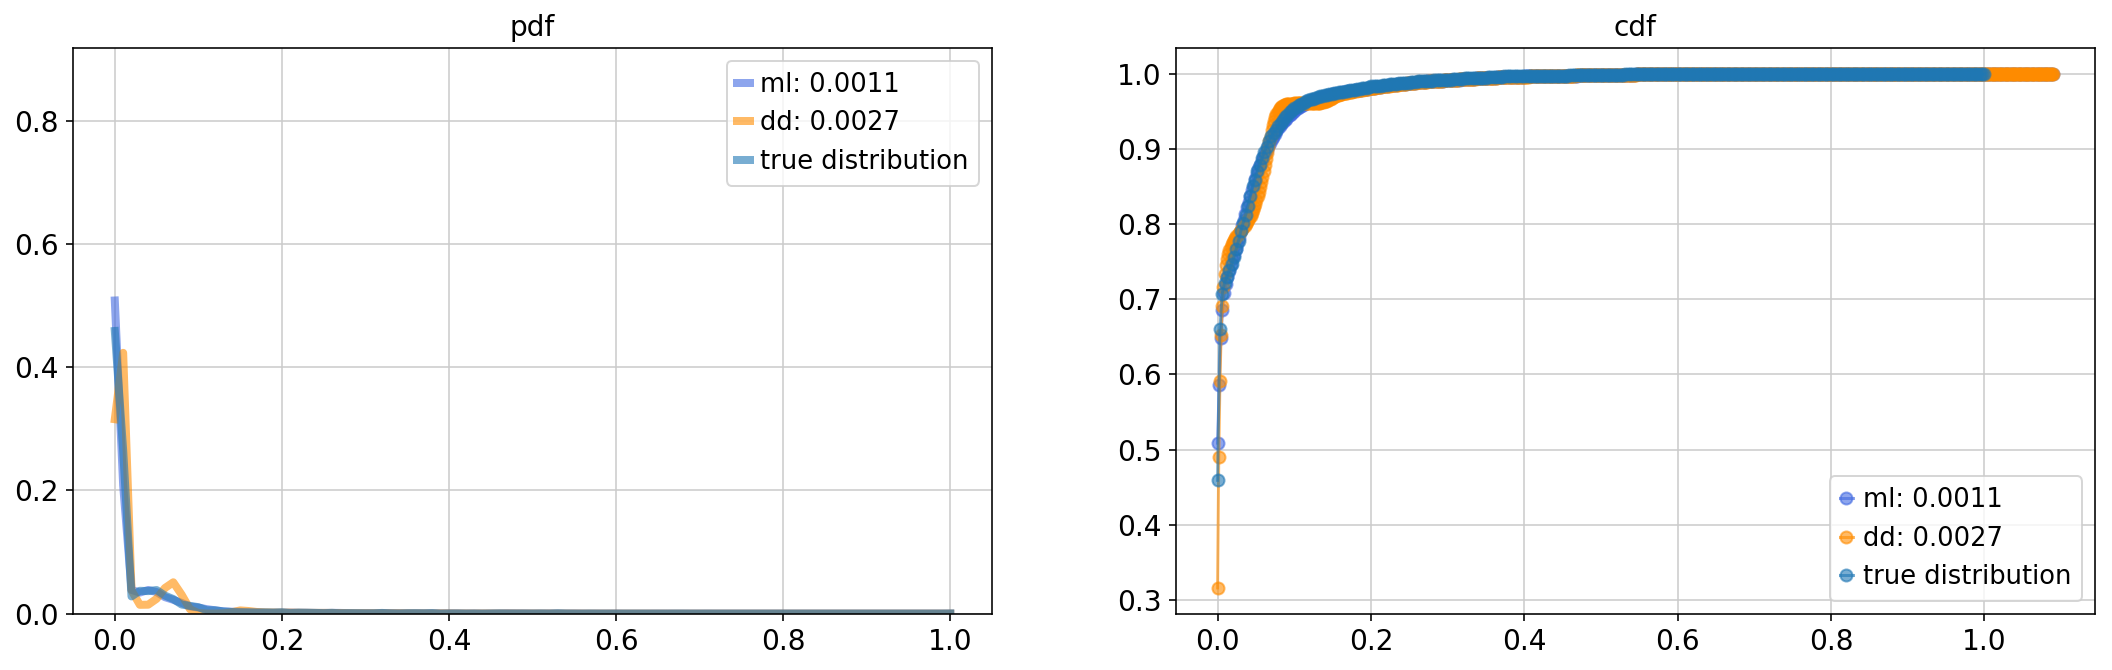



### N_r=4698, mean_cts=99, N_c=2000


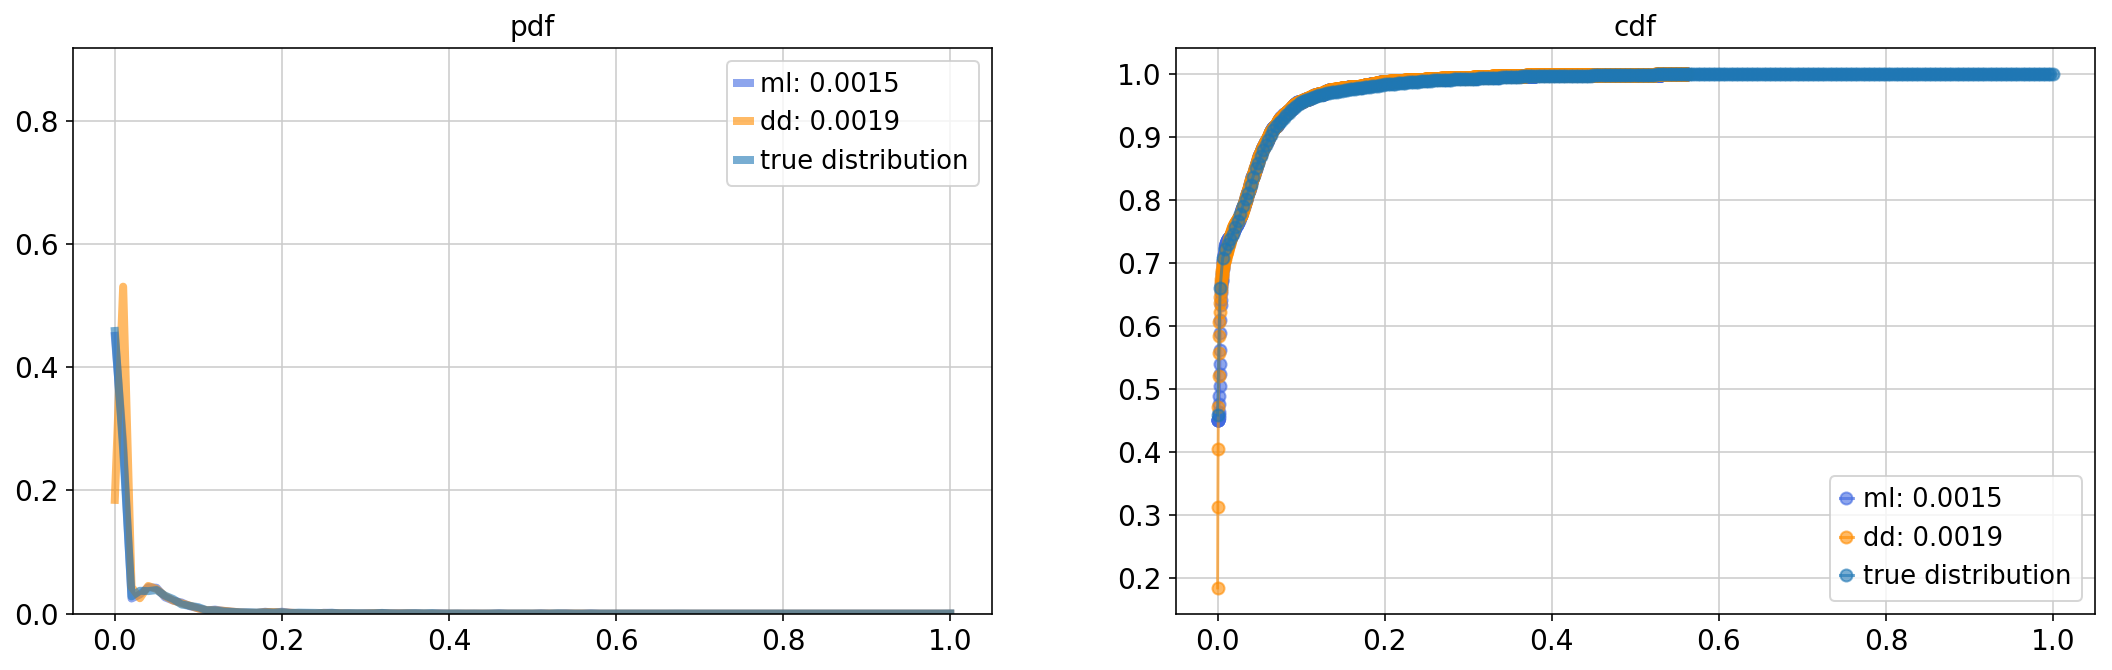

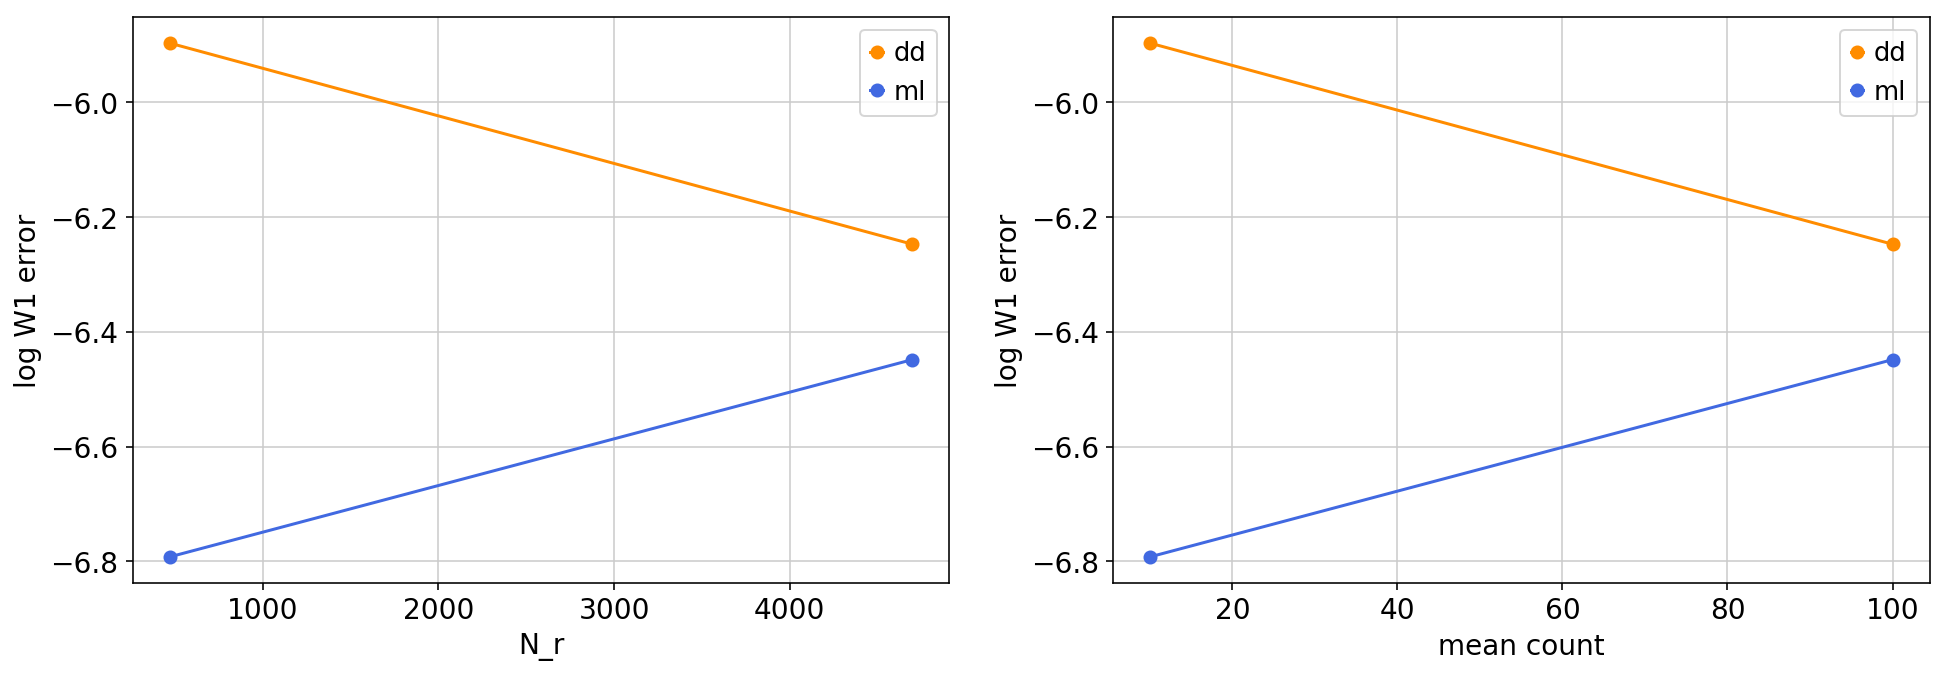

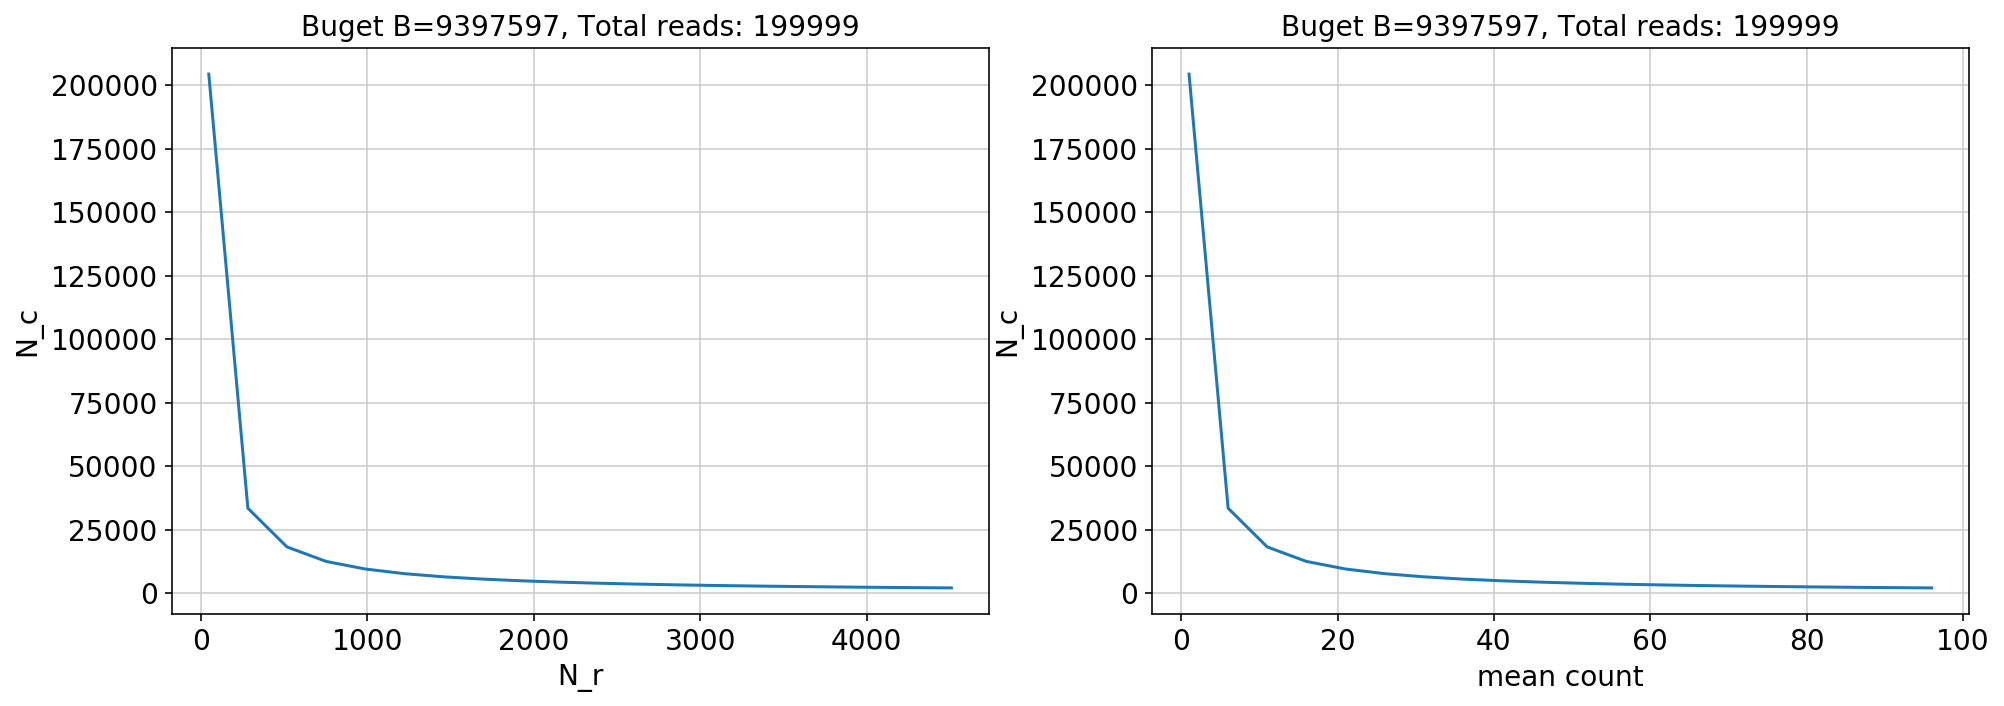

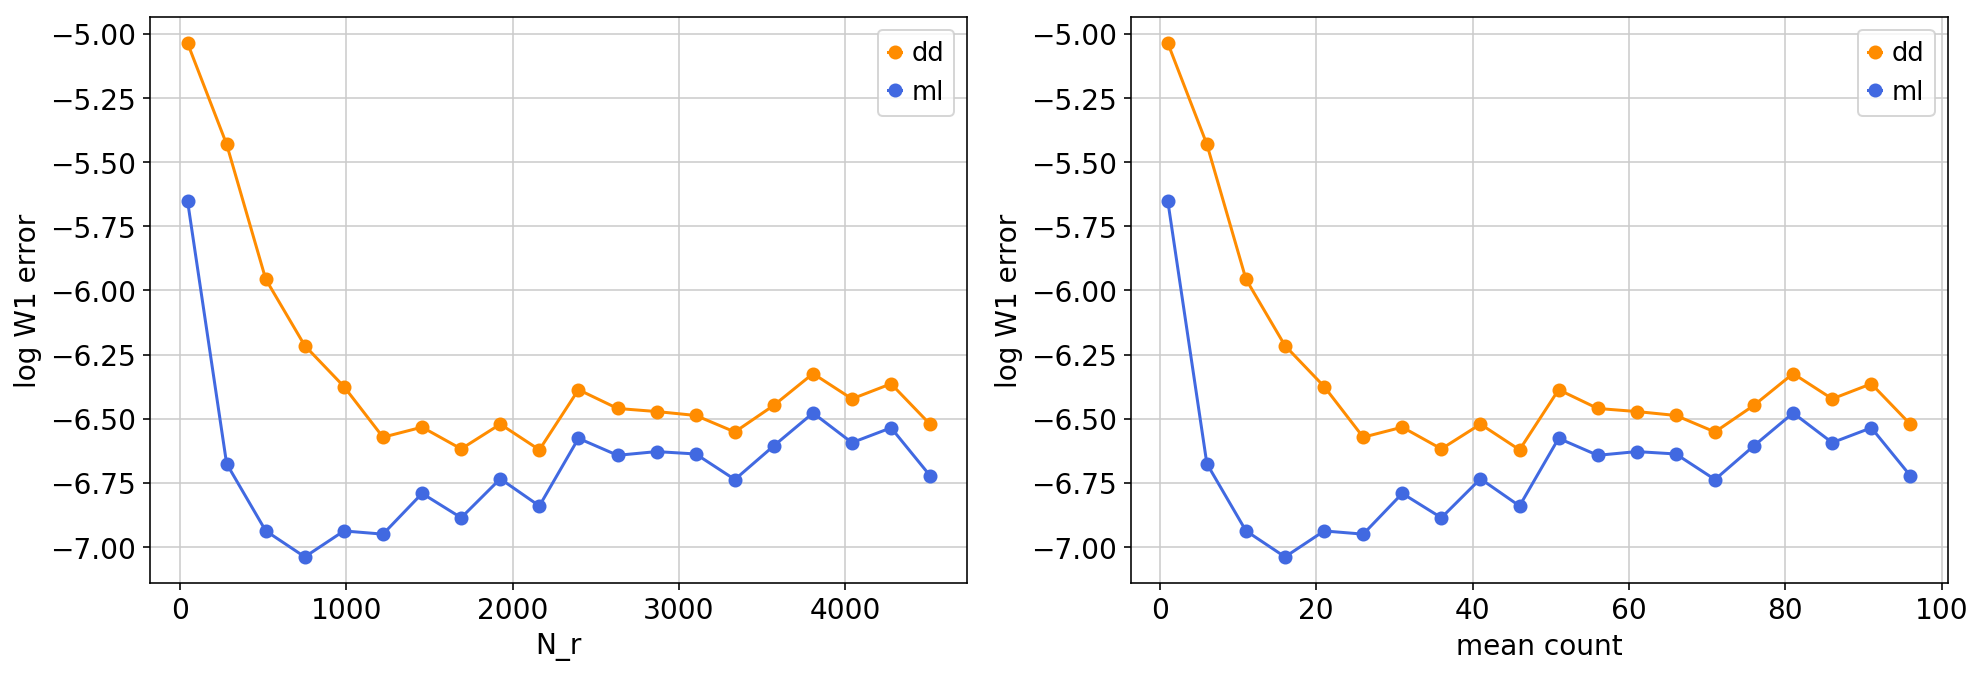

### N_r=469, mean_cts=9, N_c=10000


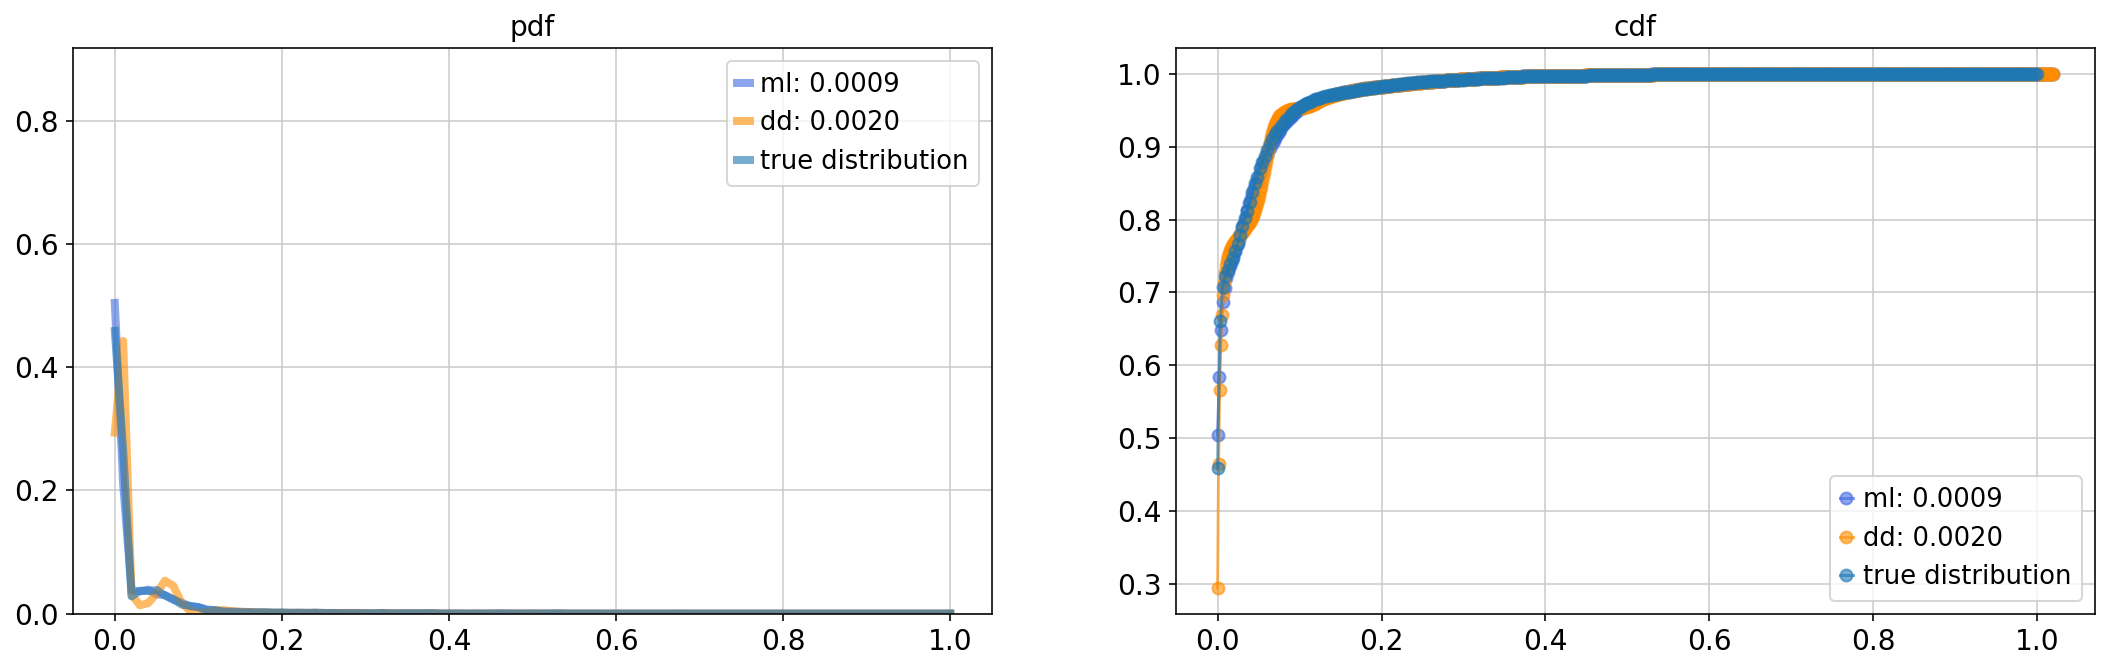



### N_r=4698, mean_cts=99, N_c=1000


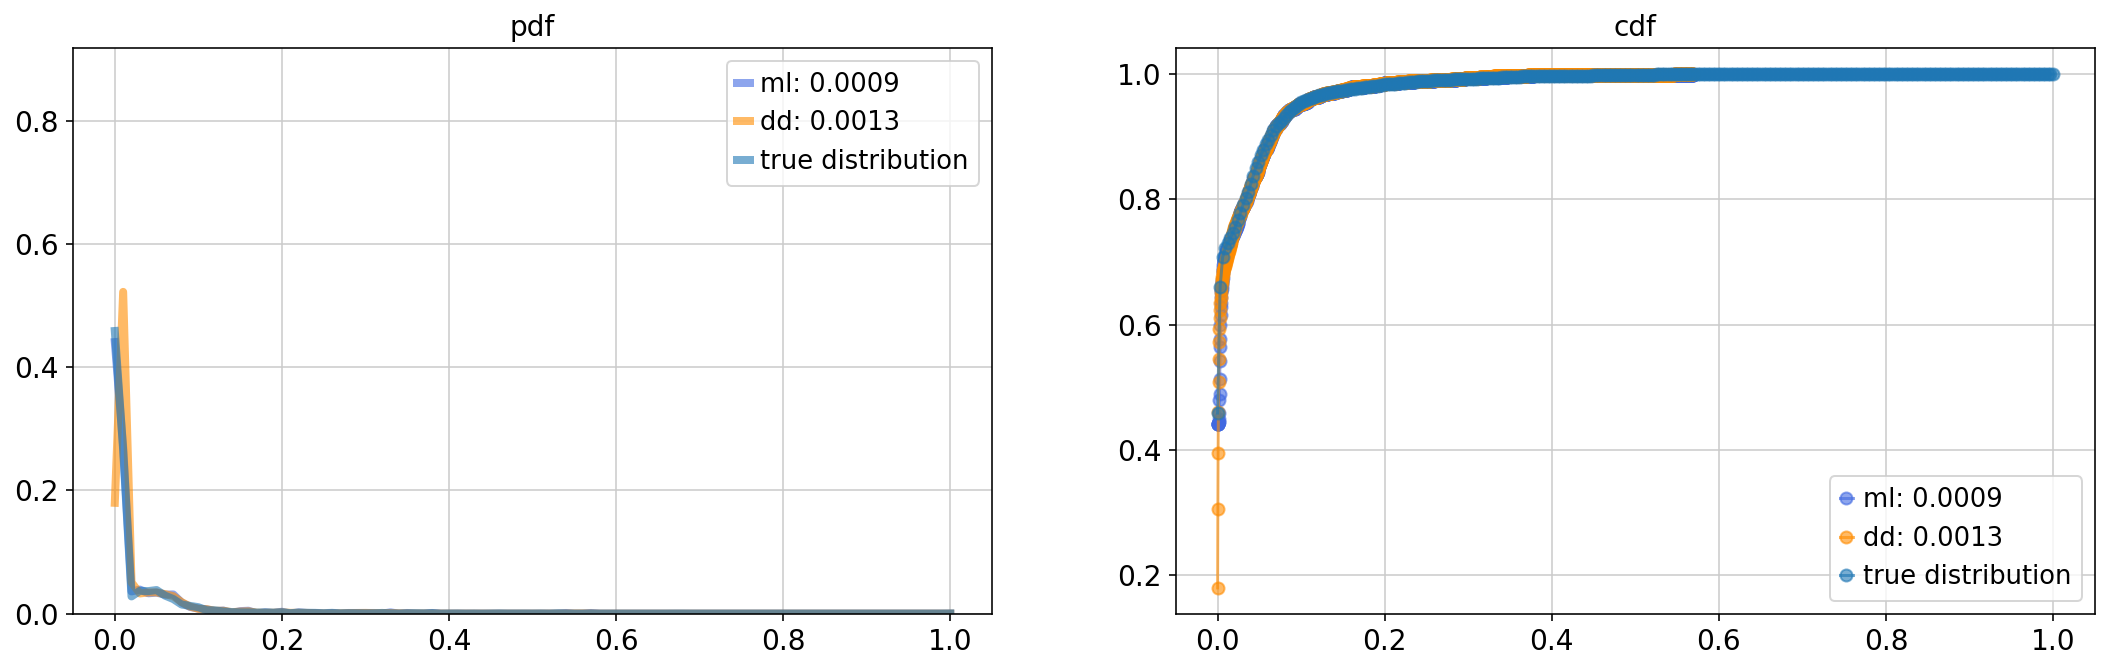

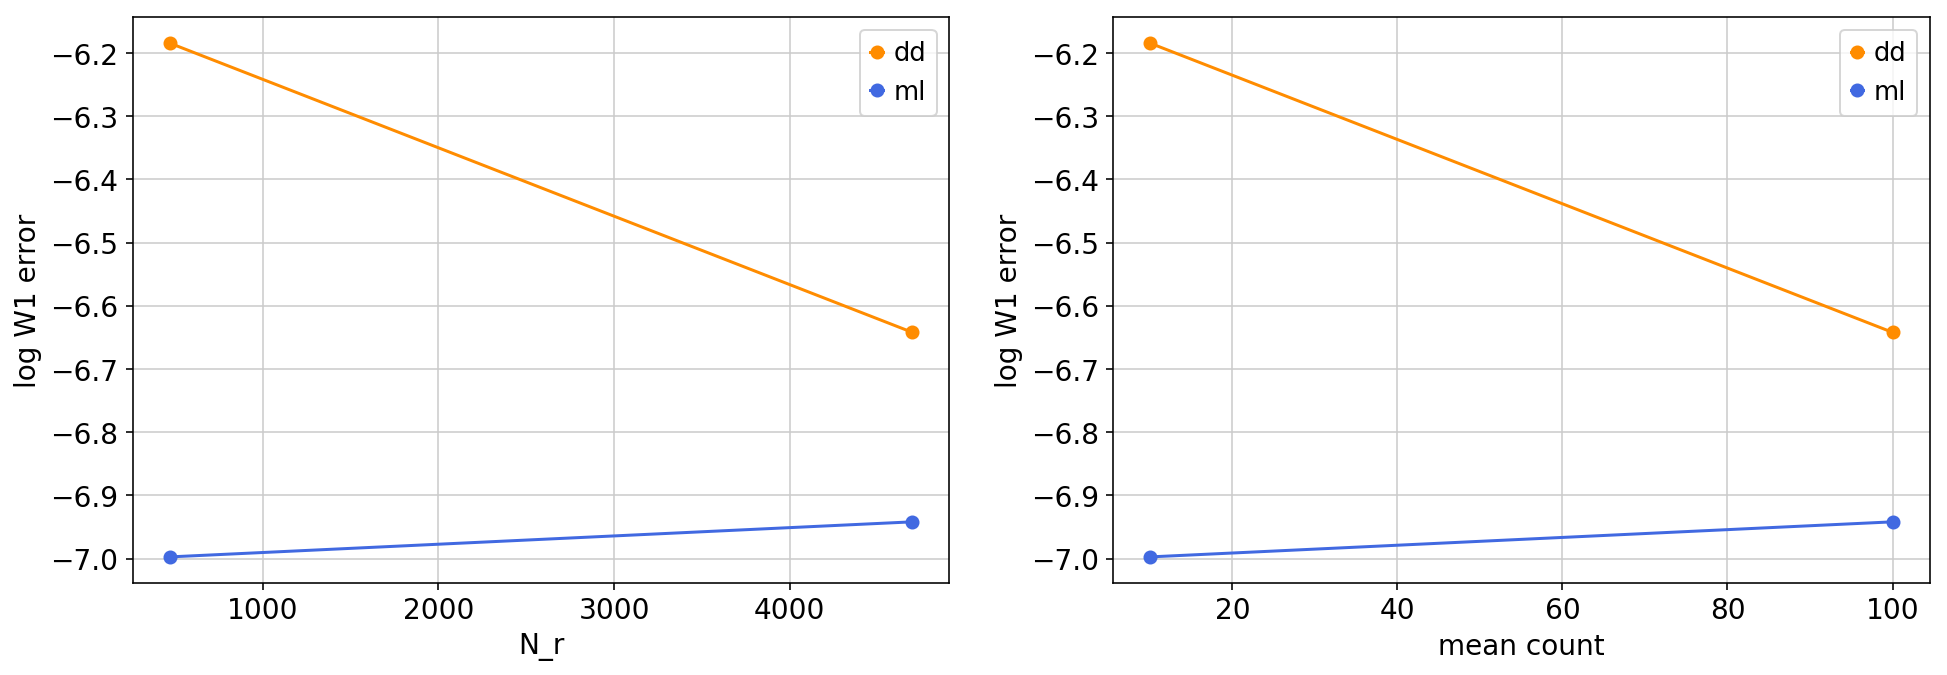

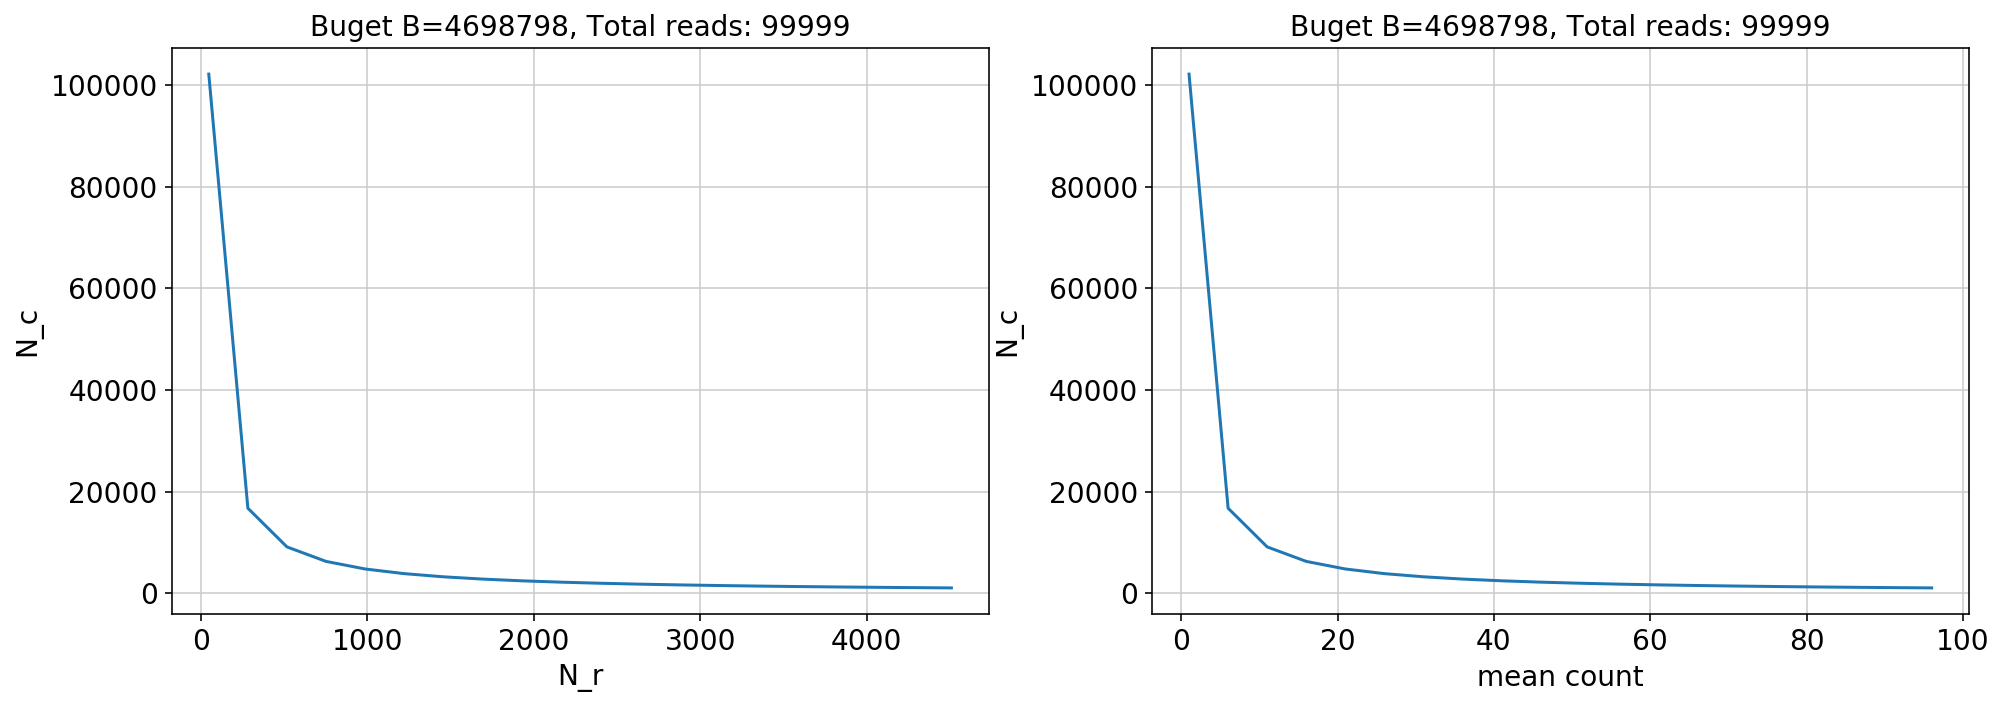

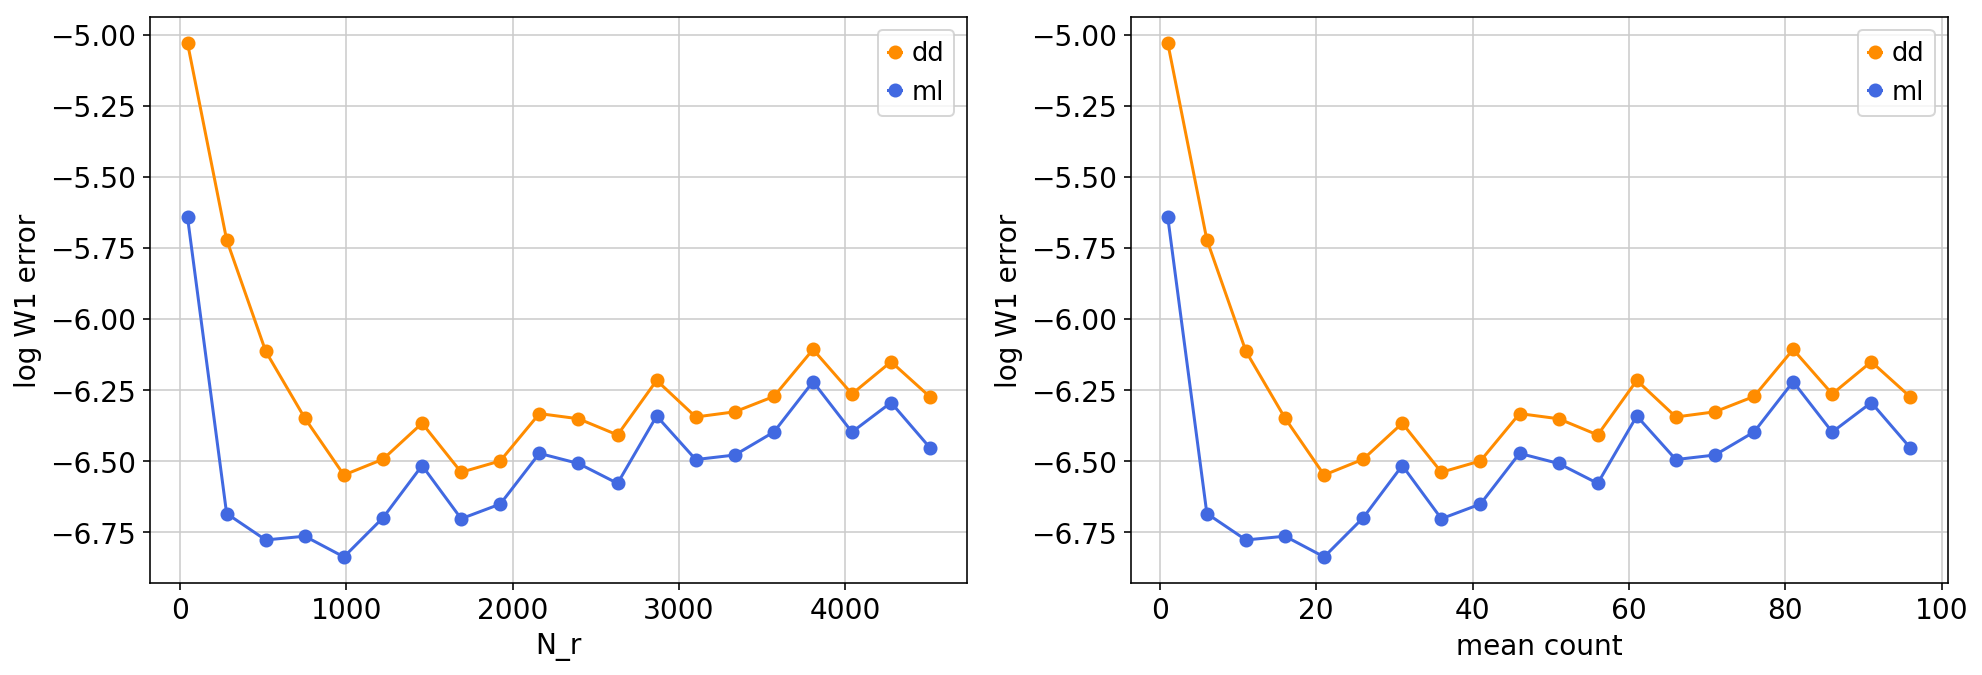

In [30]:
gene='CST3'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.xlim([0,1])
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

p_gene,x_gene = counts2pdf_1d(Y)
x_gene = x_gene/x_gene.max()
comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
tradeoff_1d(p_gene,x_gene,1e5)

FTL
Average counts per cell = 27.60064431452094


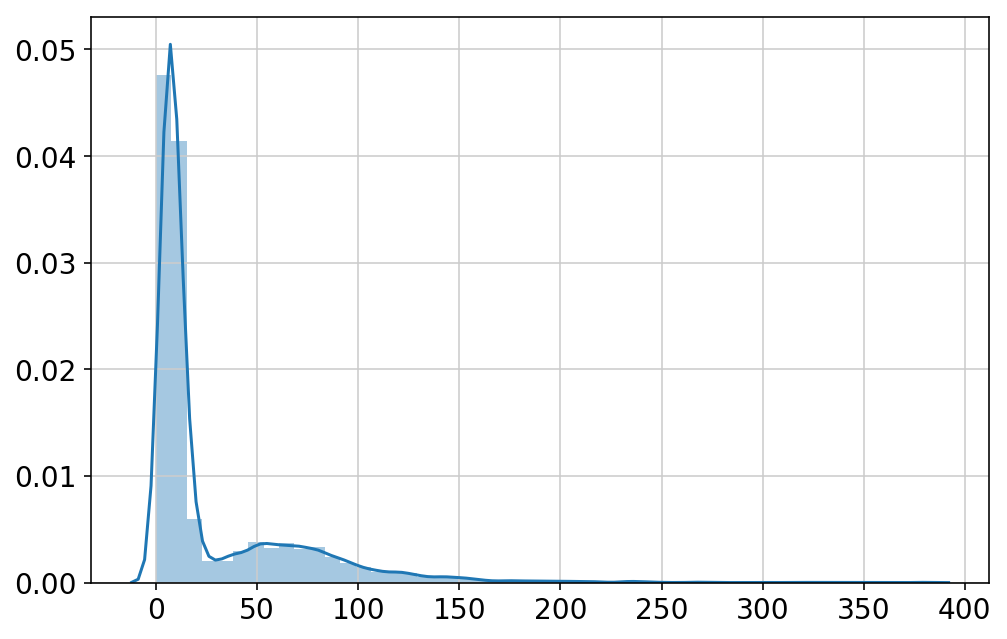

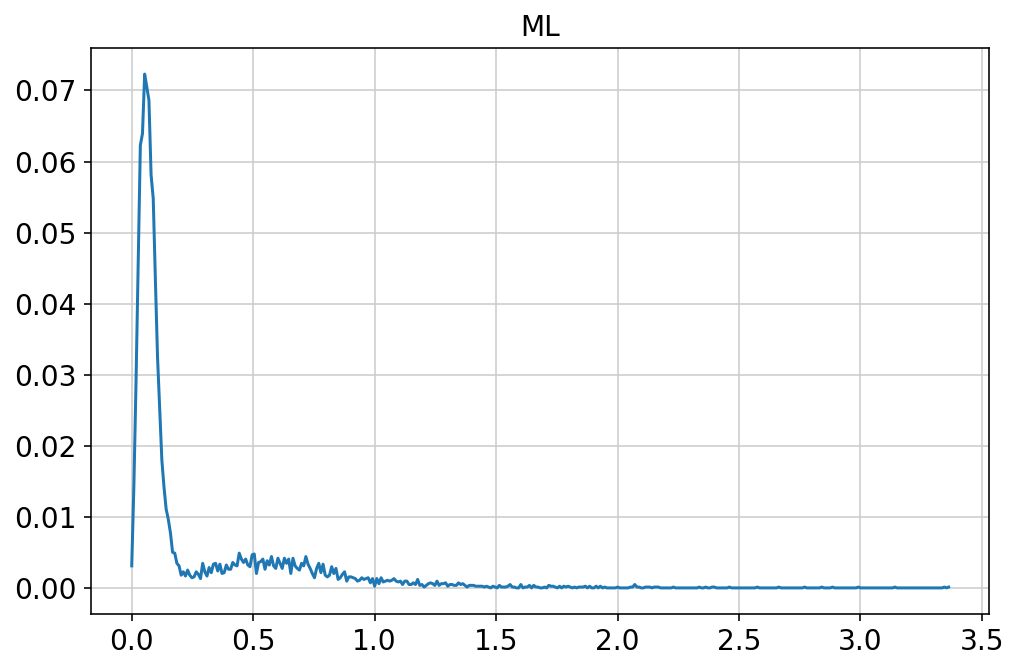

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 113

### debug: proportion separation ### start ###


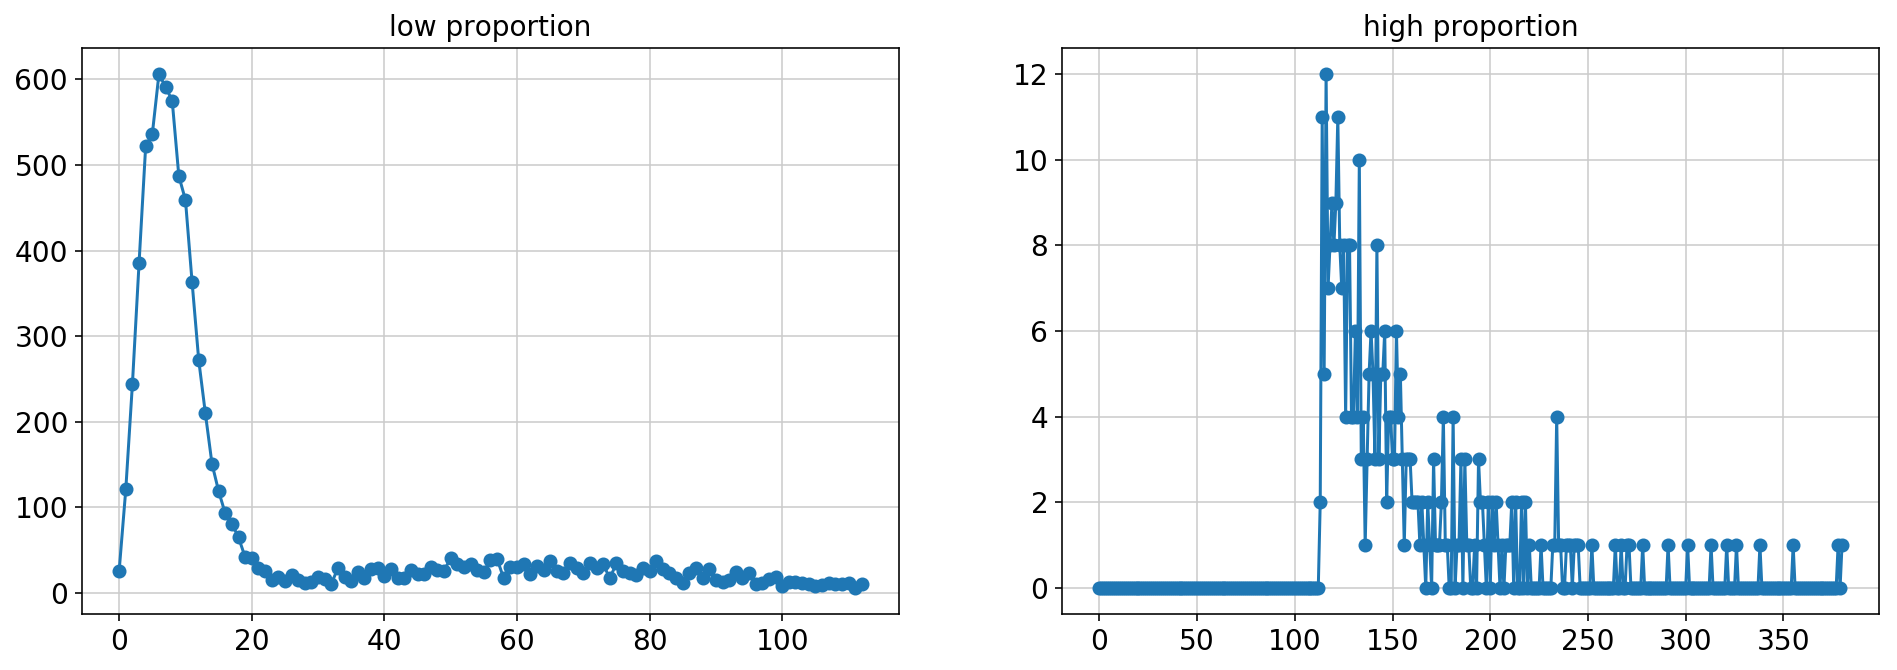

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.33744254679390906
0.06517944584061297
-0.1323157423627208
-0.1666877169625991
-0.1037186434516002
Close-form gradients
[ 0.33744257  0.06517946 -0.13231573 -0.1666877  -0.10371862]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:3.99500247810062, reg:0.0027149319203173964
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  4.1142826    4.68789919  -5.74157581   8.34237582 -11.40300596]
gamma:113


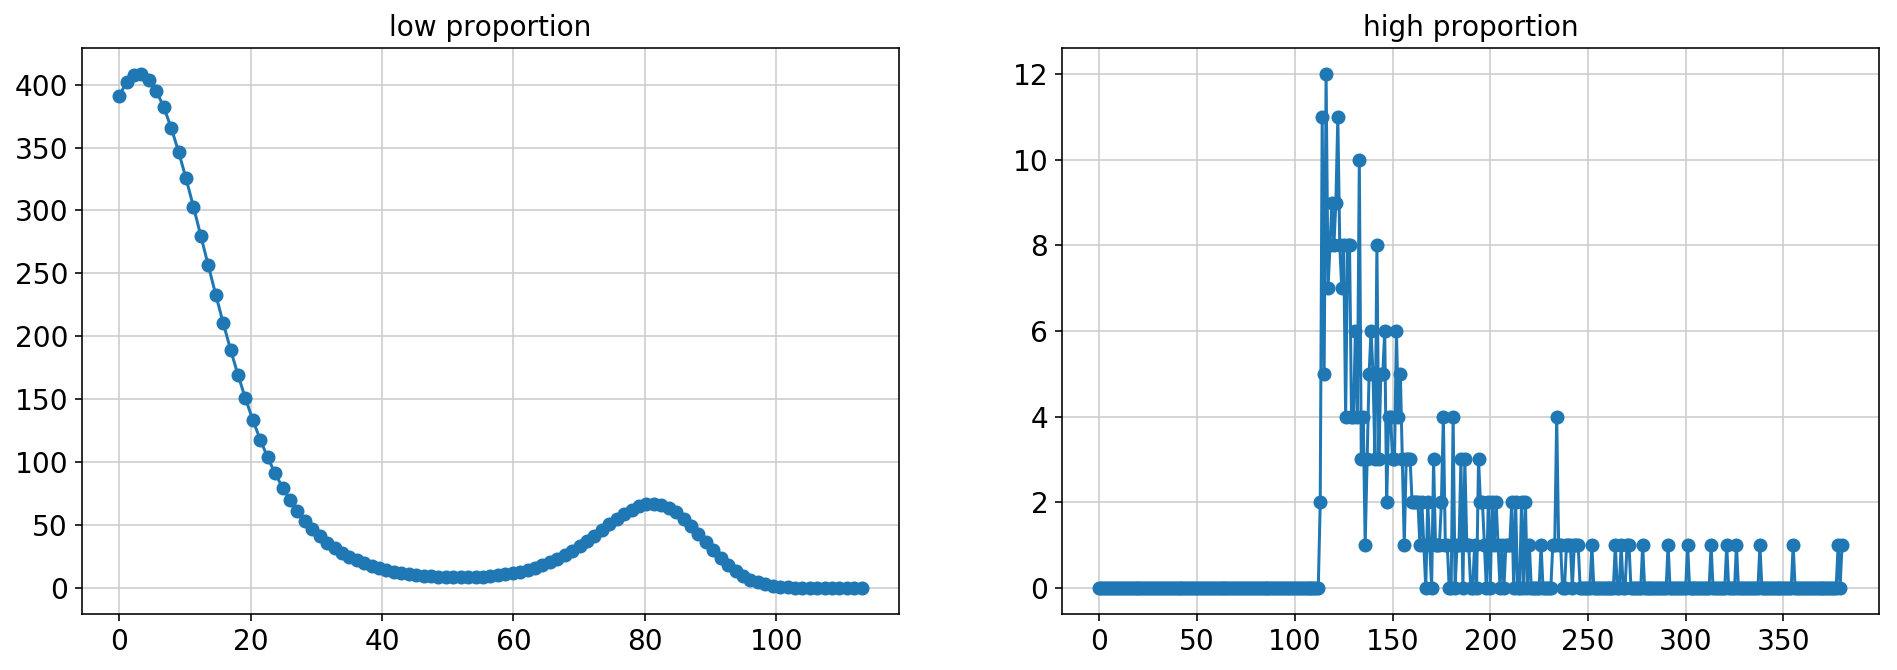

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:380.0


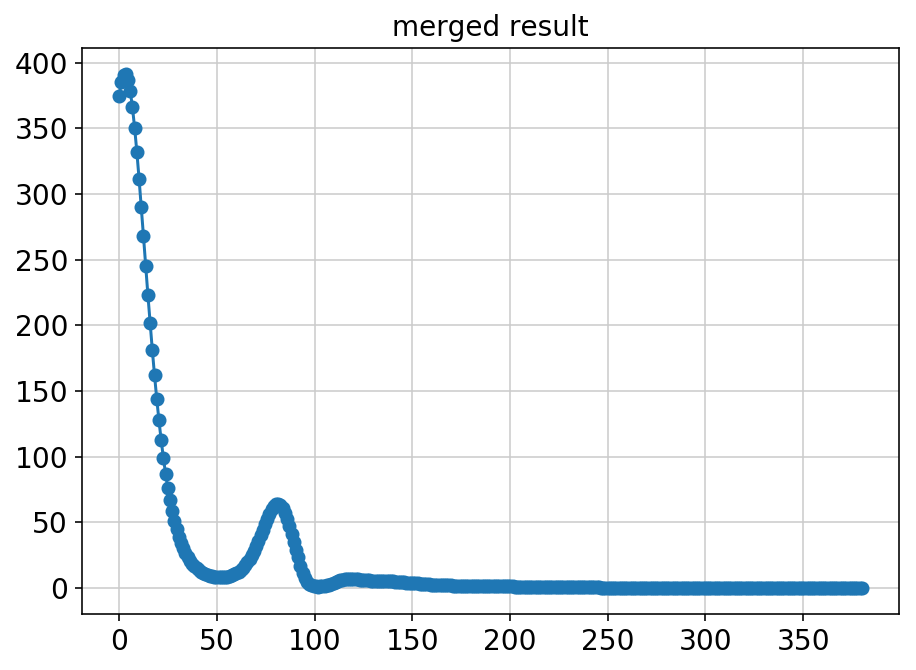

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 34.69%
>0.1: 21.48%
>0.15: 19.30%
>0.2: 13.81%
>0.25: 4.440%
>0.3: 3.884%
>0.35: 2.554%
>0.4: 1.568%


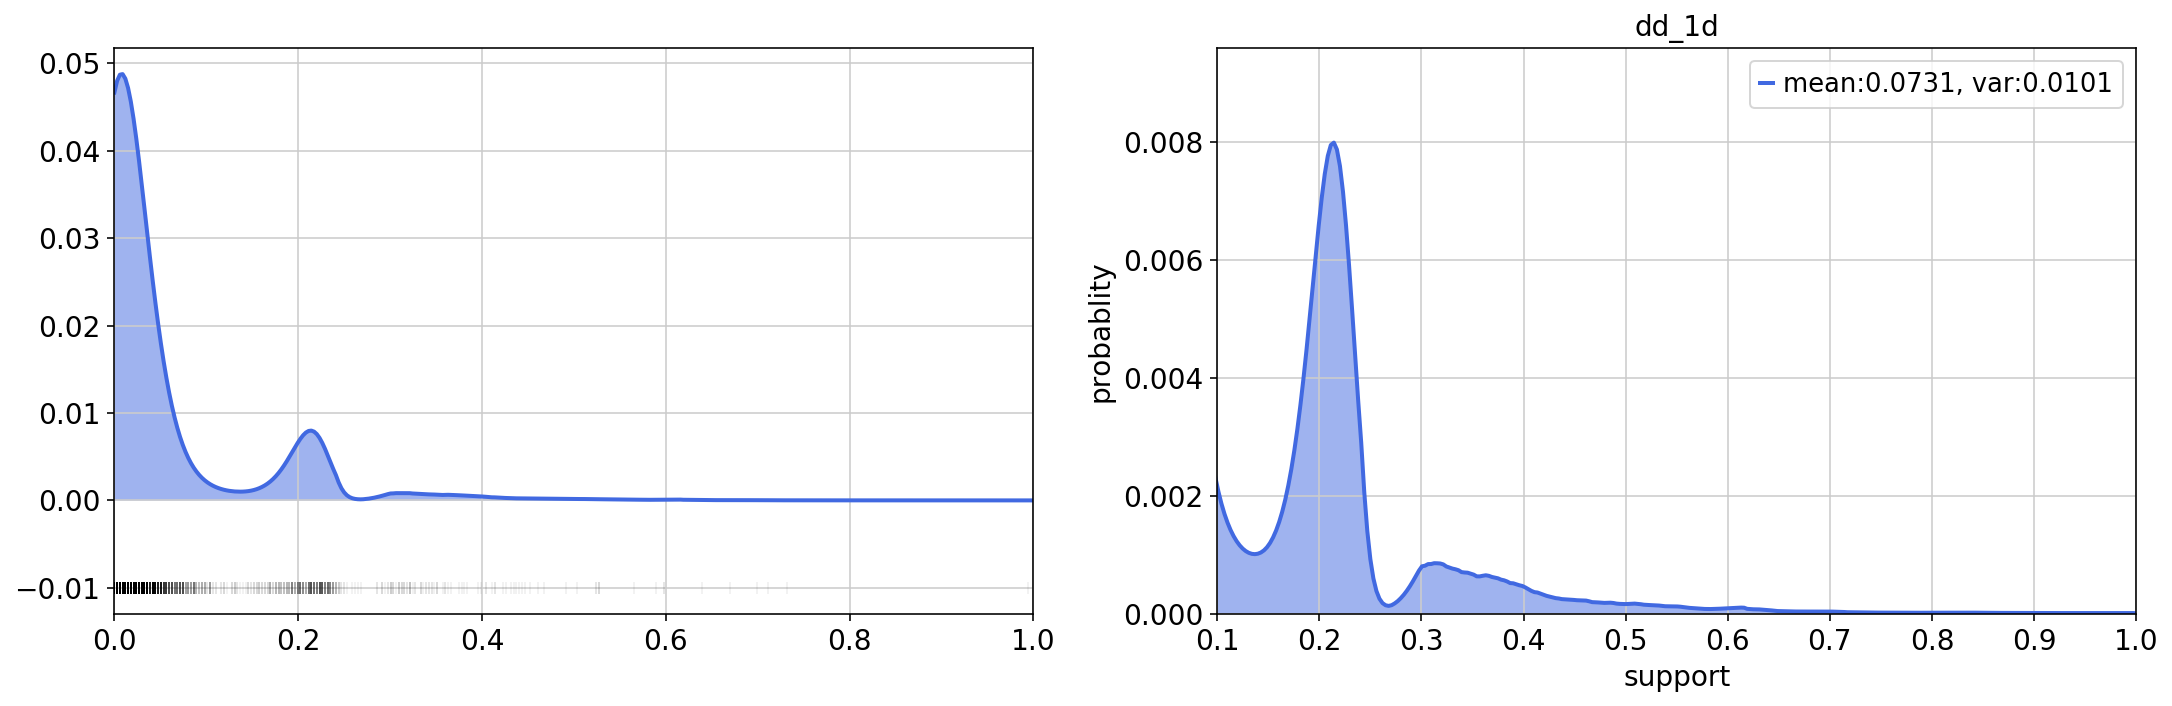

estimated gamma: 380.0


In [31]:
gene='FTL'
Y=np.array(adata[:,gene].X,dtype=int)
print(gene)
print("Average counts per cell =",np.sum(Y)/len(Y))
plt.figure(figsize=[8,5])
sns.distplot(Y)
plt.show()
plt.figure(figsize=[8,5])
p_hat_ml,ml_info=ml_1d(Y)
plt.plot(ml_info['x'],p_hat_ml)
plt.title('ML')
plt.show()

p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,n_degree=5,gamma=None,debug_mode=True)
print("estimated gamma:",dd_info['gamma'])

# plt.figure(figsize=[8,5])
# X=np.random.choice(dd_info['x'], 2000, p=p_hat)
# plt.plot(dd_info['x'],p_hat,marker='.',lw=2,markersize=0,color="royalblue")
# # plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
# # plt.xlim([0,1])
# # plt.ylim([0,1.05*np.max(p)])
# plt.plot(X, [-0.01]*len(X), '|', color='k',alpha=0.05)
# plt.show()

### N_r=137, mean_cts=9, N_c=10000


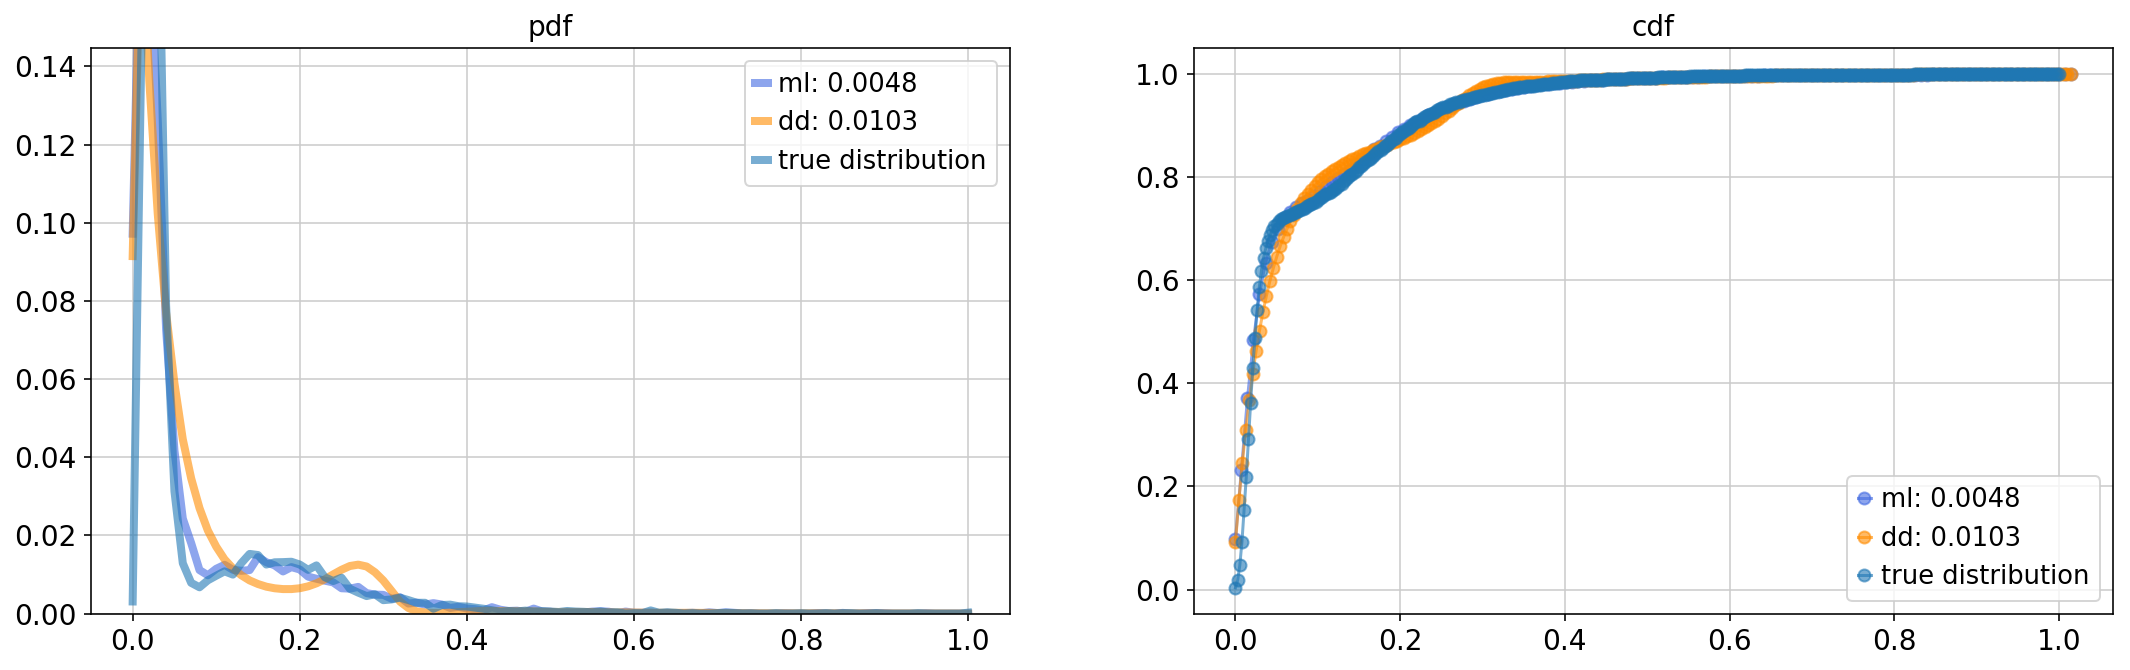



### N_r=1376, mean_cts=99, N_c=1000


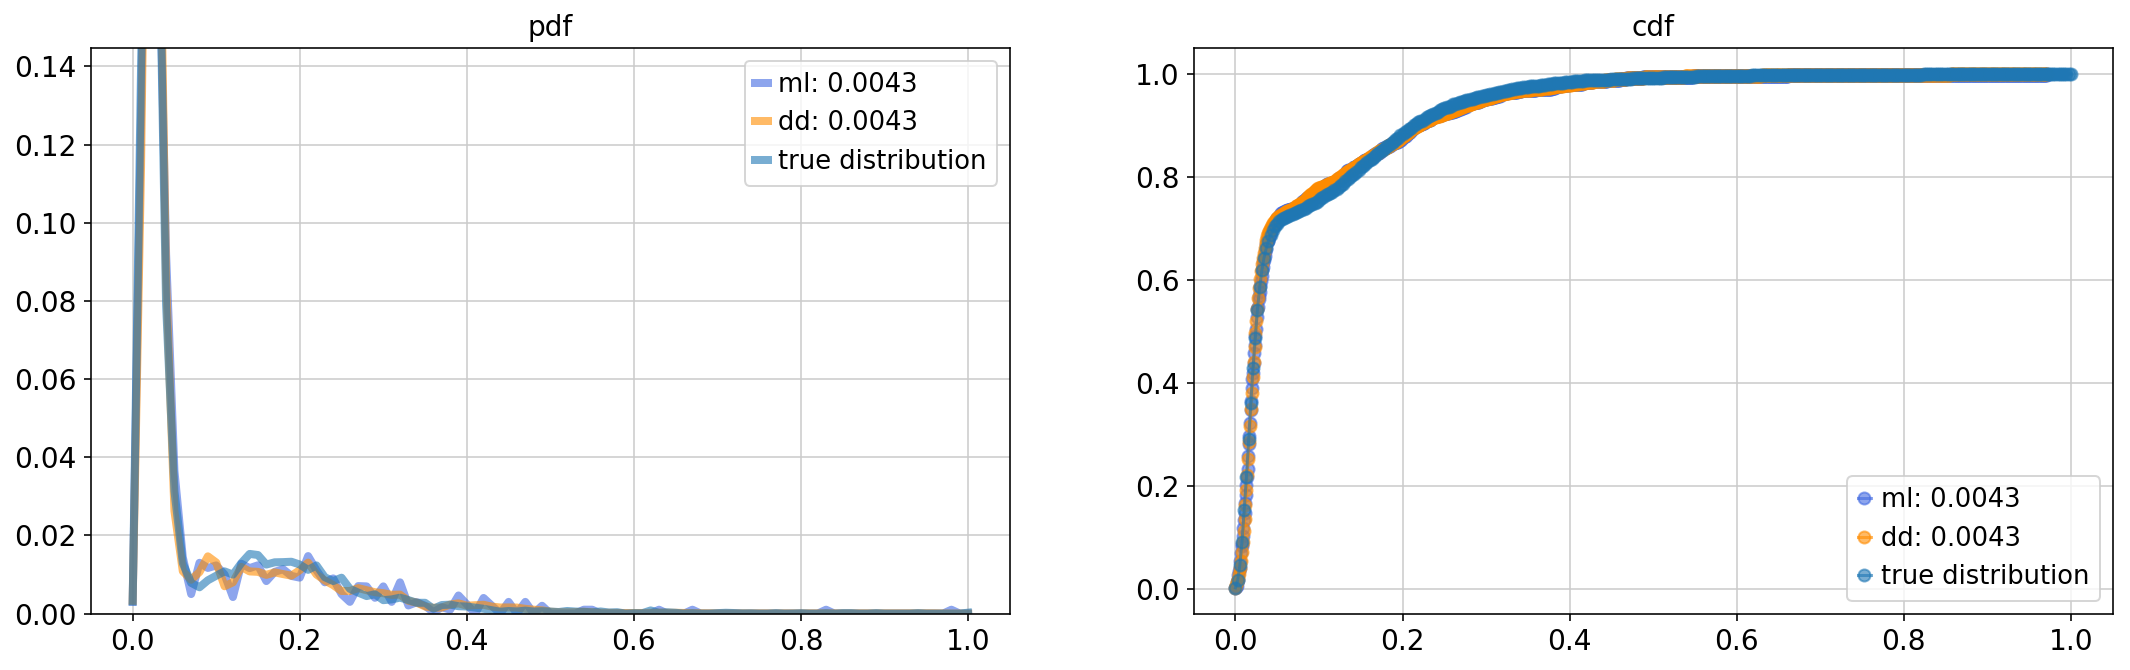

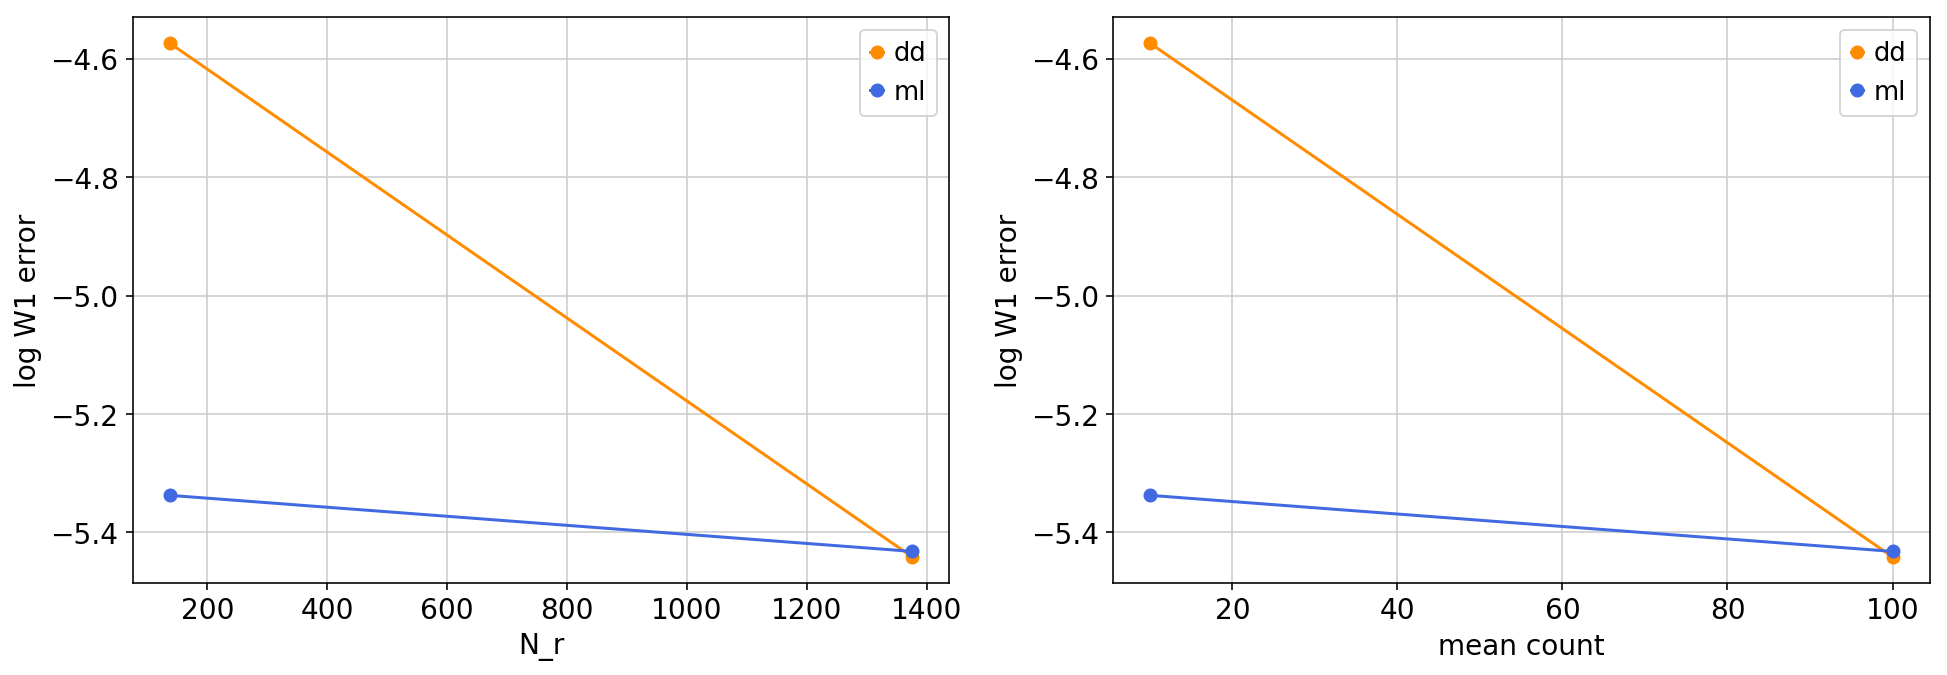

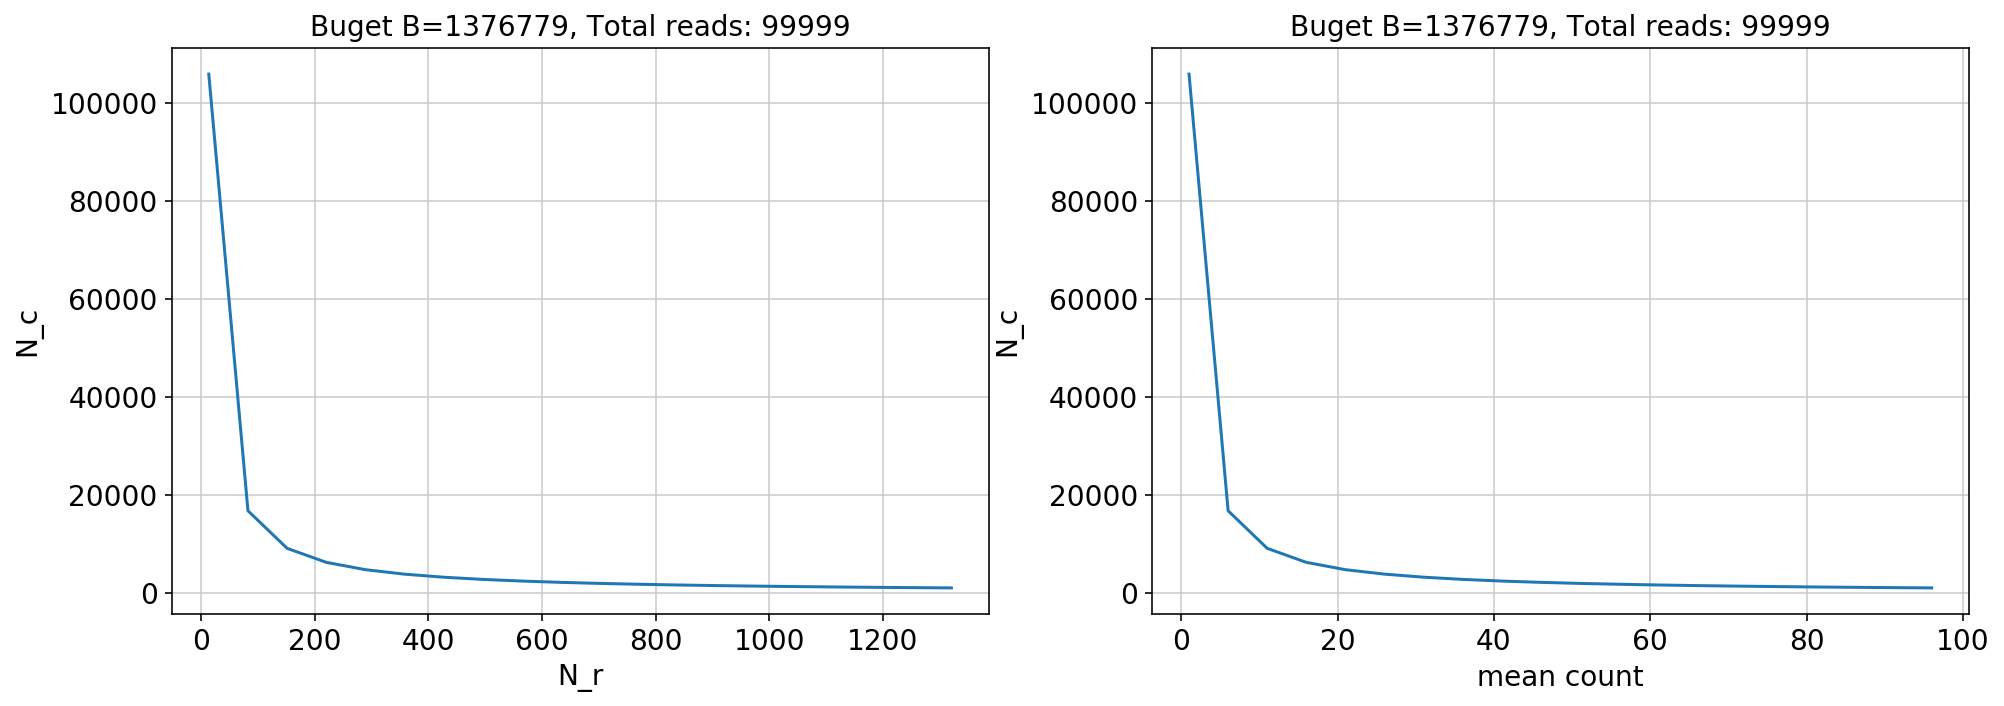

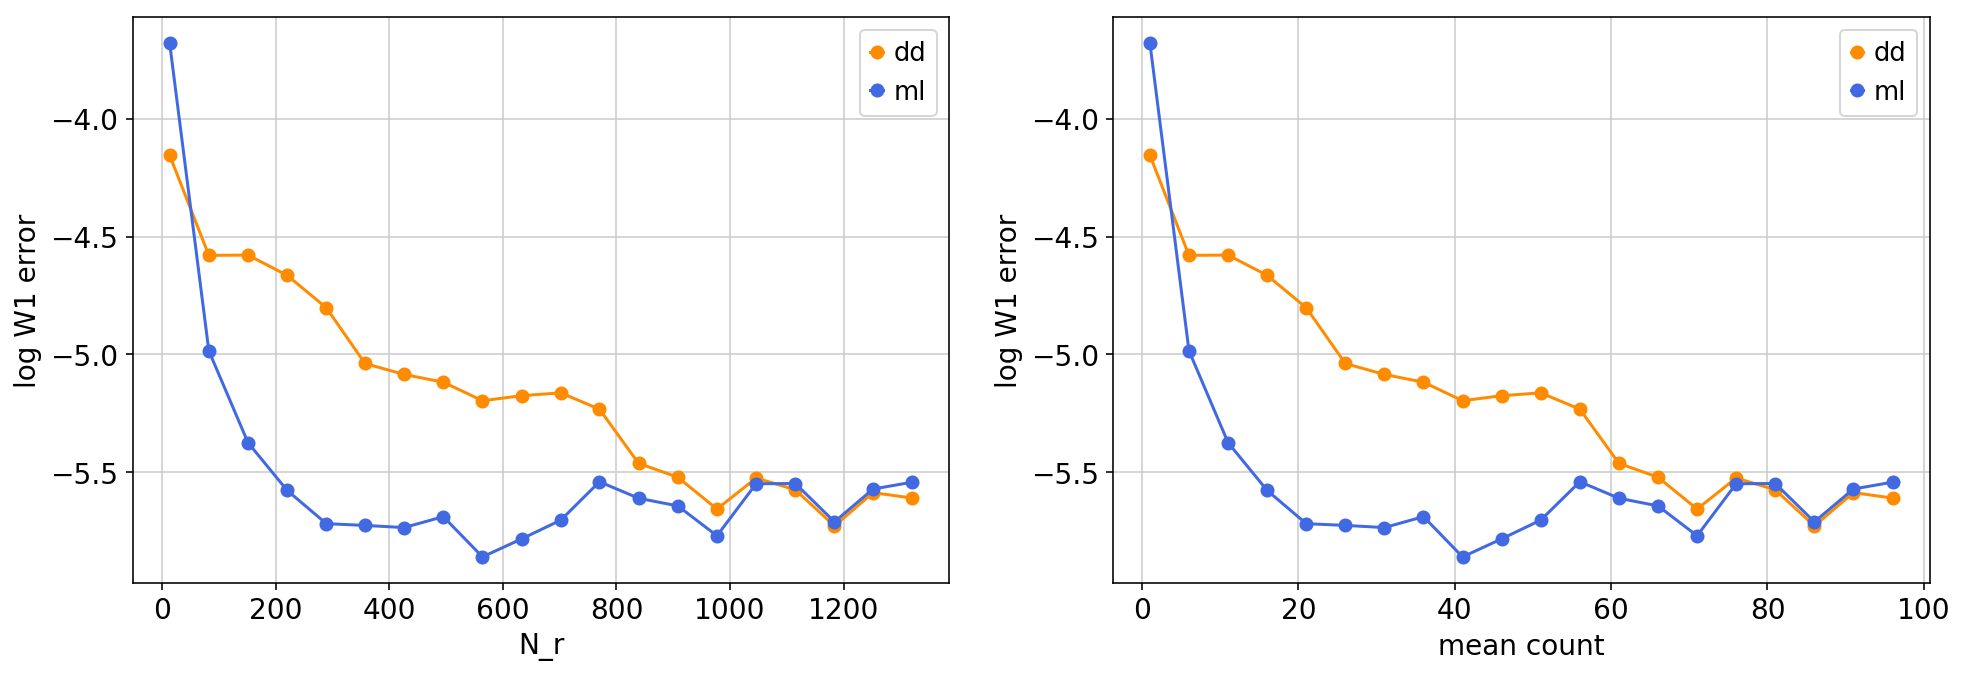

In [32]:
p_gene,x_gene = counts2pdf_1d(Y)
x_gene = x_gene/x_gene.max()
comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
tradeoff_1d(p_gene,x_gene,1e5)

In [ ]:
genes=["S100A9","S100A8","S100A4","LGALS2","FCN1","CD14","GZMB","IGFBP7","CD79A","CD3E","LYZ","MS4A1",
       "GNLY","FGFBP2","FCER1G","LDHB","IL7R","LST1","PF4","NKG7","CST3","CCR7"]

S100A9
Average counts per cell = 16.659587161436583


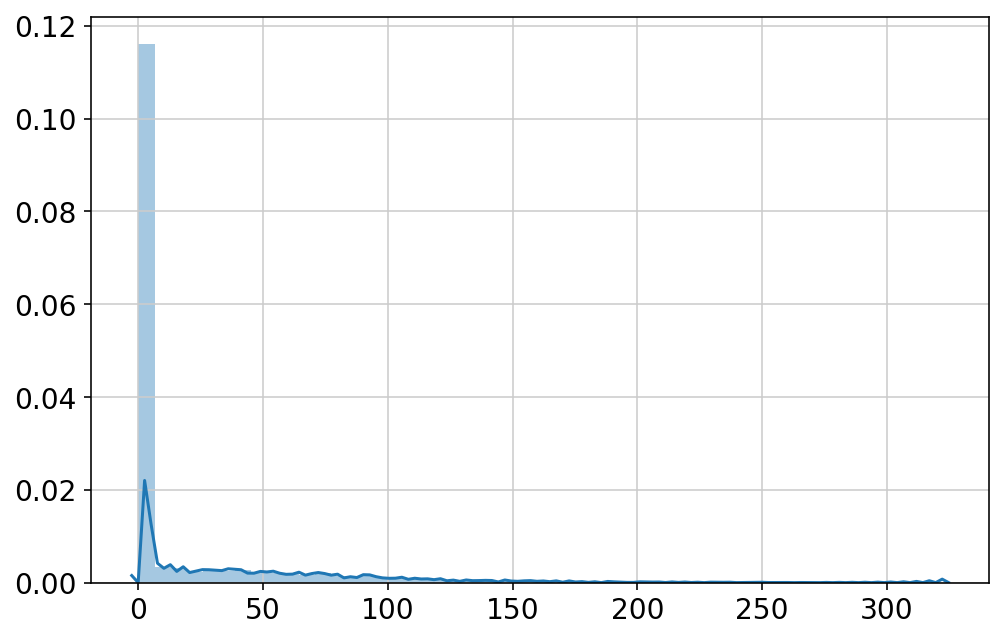

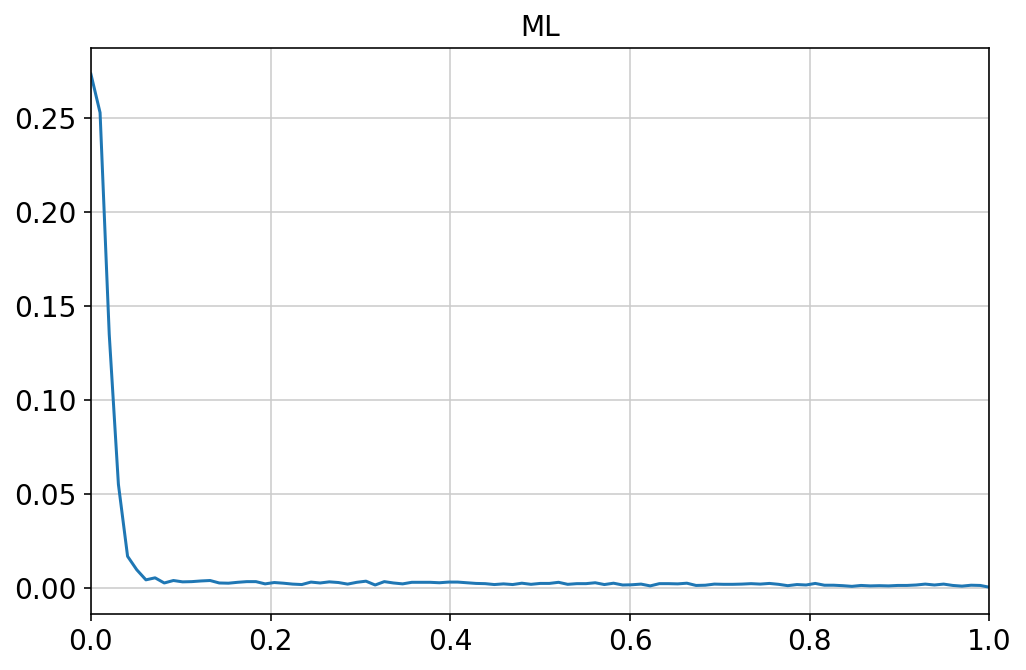

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 98

### debug: proportion separation ### start ###


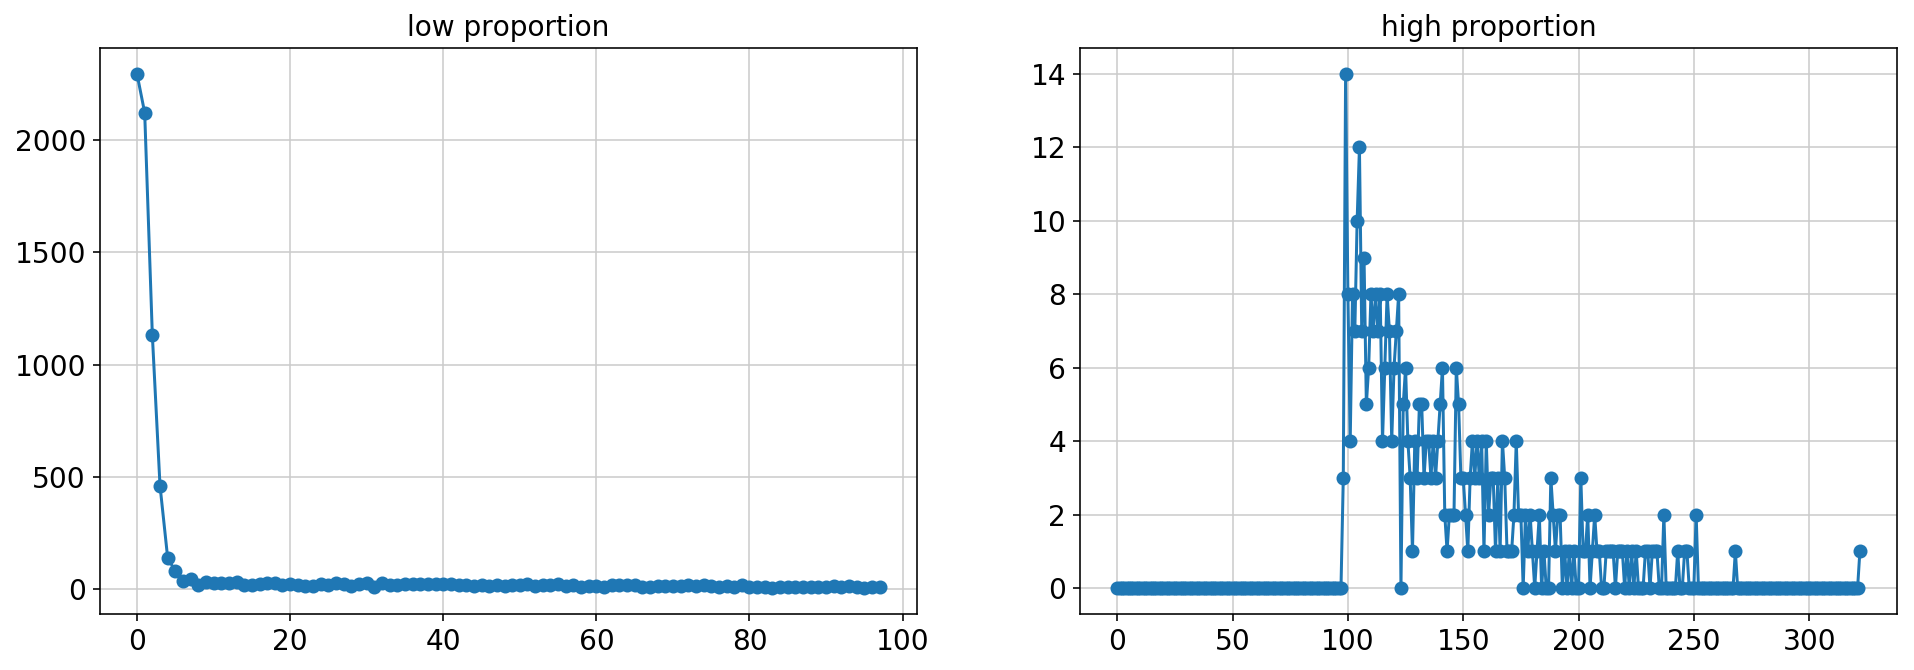

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.58955346915468
-0.09592720306983438
-0.18488511699388255
-0.19865461808876717
-0.11018665269091343
Close-form gradients
[ 0.5895535  -0.09592718 -0.1848851  -0.1986546  -0.11018662]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.7538727670558836, reg:0.000594749021999968
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 4.32055532 -4.31637076  3.53833184 -3.07166746 -0.47086531]
gamma:98


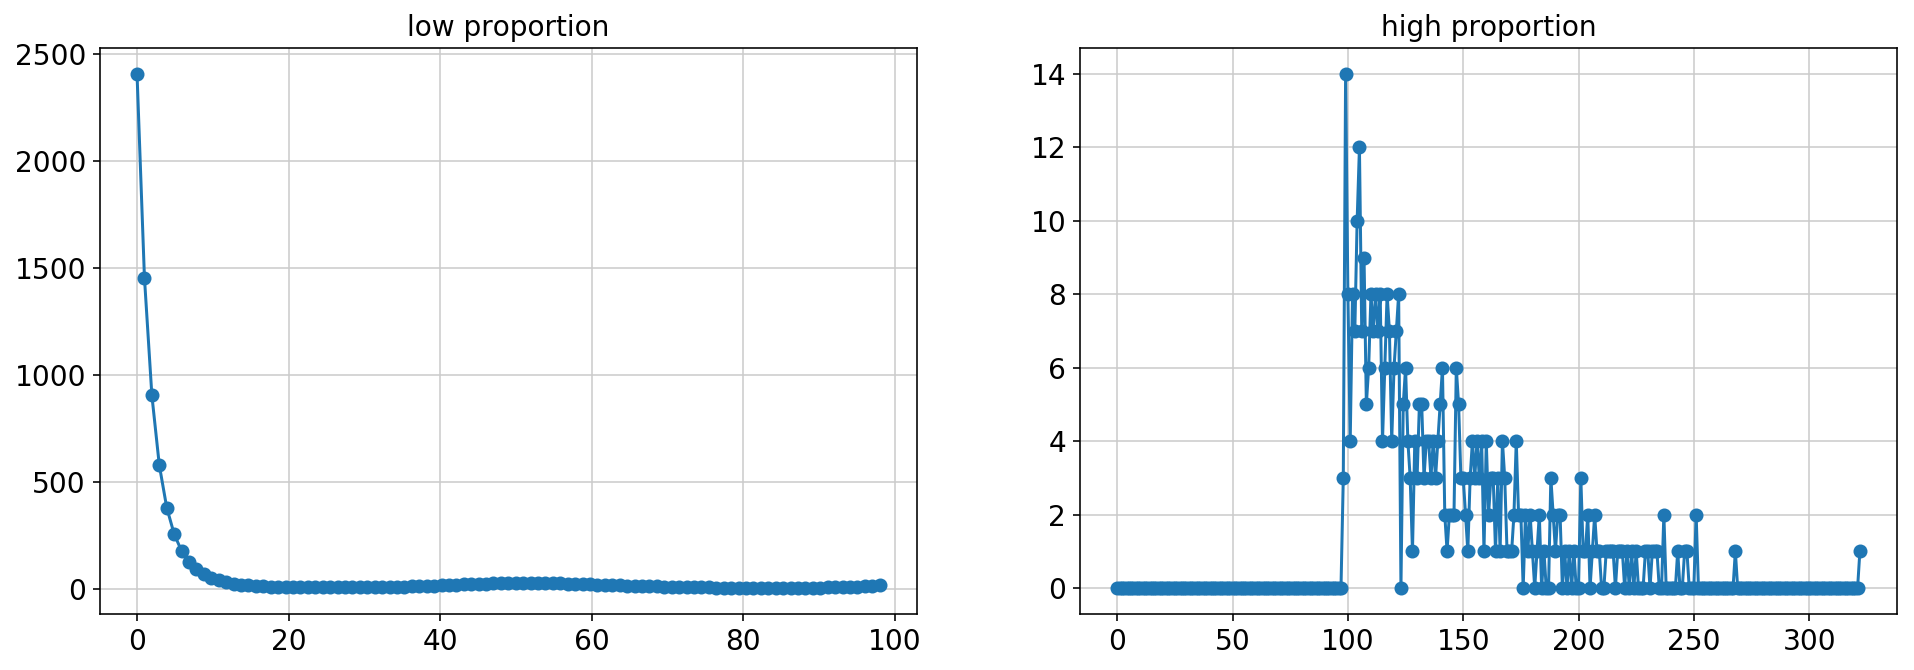

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:322.0


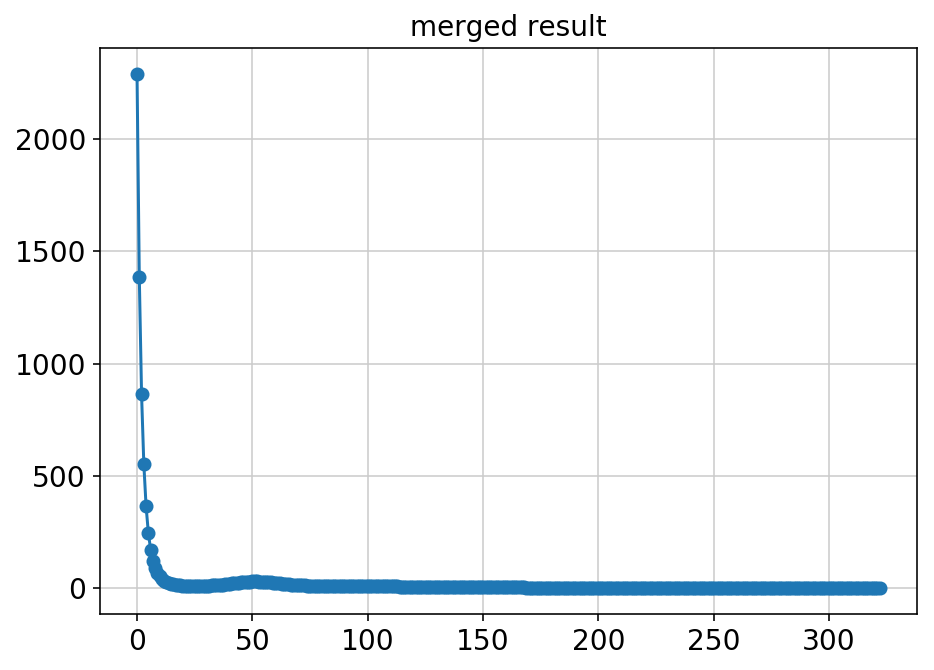

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 20.38%
>0.1: 18.35%
>0.15: 14.32%
>0.2: 9.303%
>0.25: 6.792%
>0.3: 4.999%
>0.35: 3.449%
>0.4: 2.391%


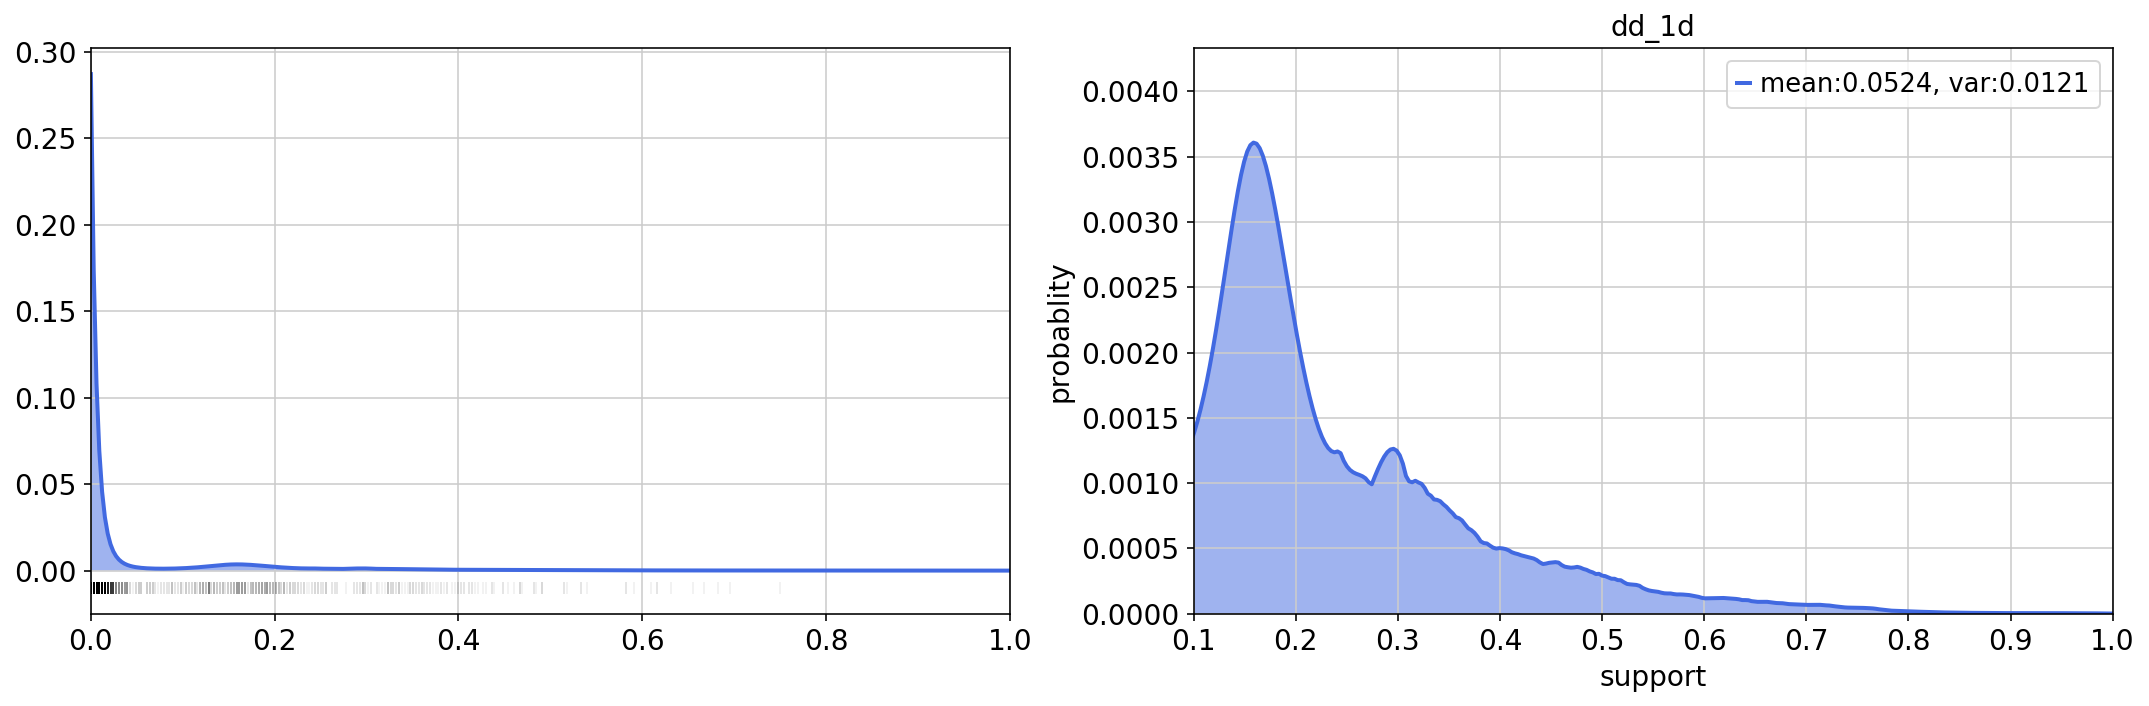

gamma: 322.0
### N_r=193, mean_cts=9, N_c=10000


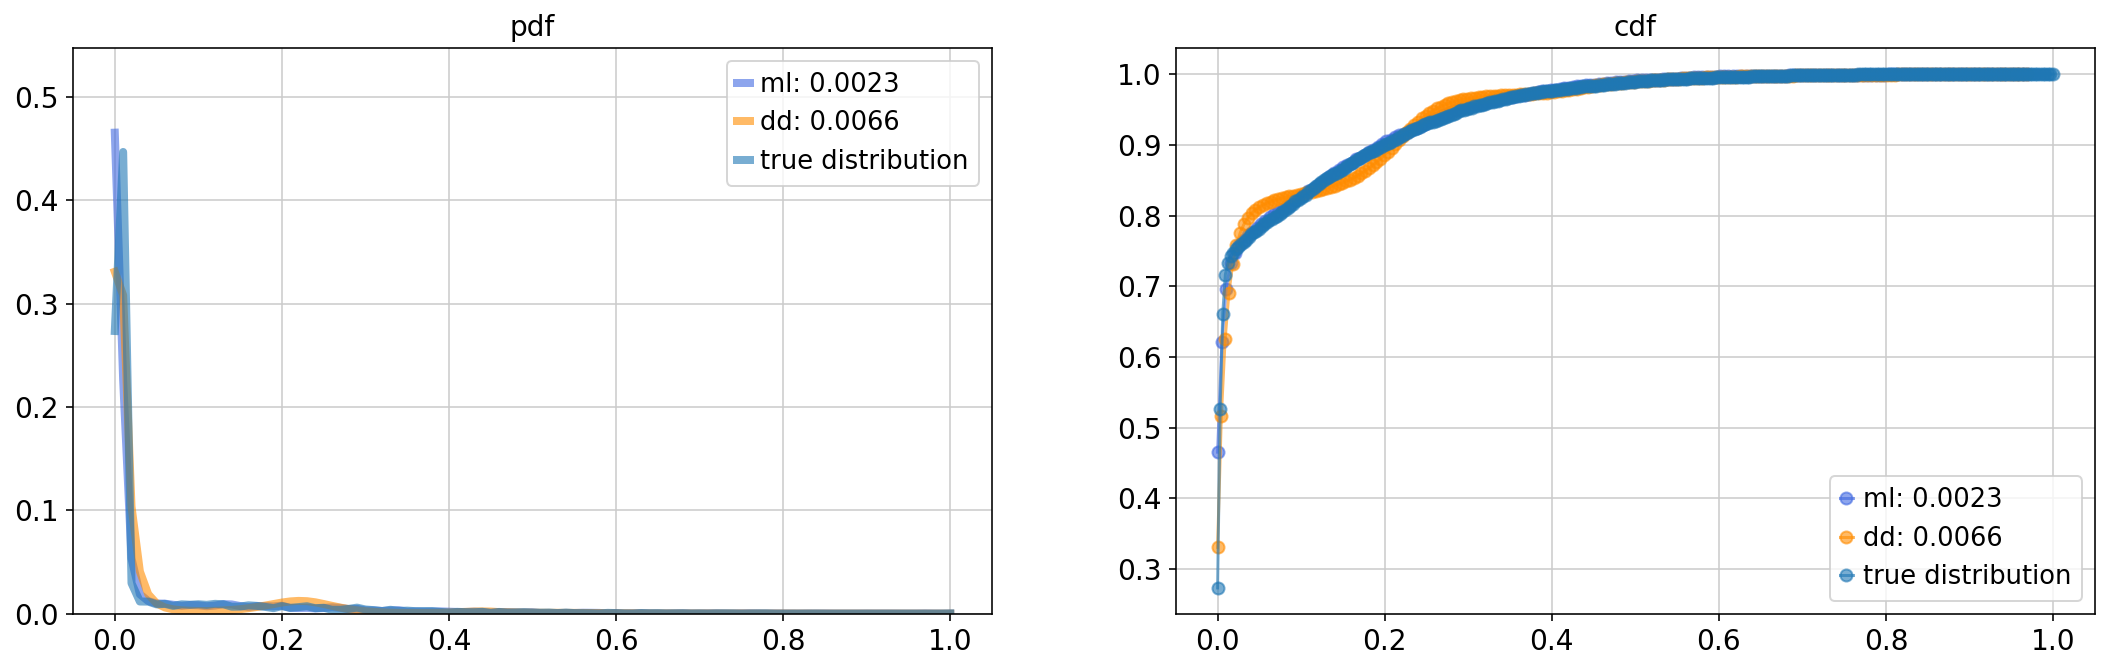



### N_r=1932, mean_cts=99, N_c=1000


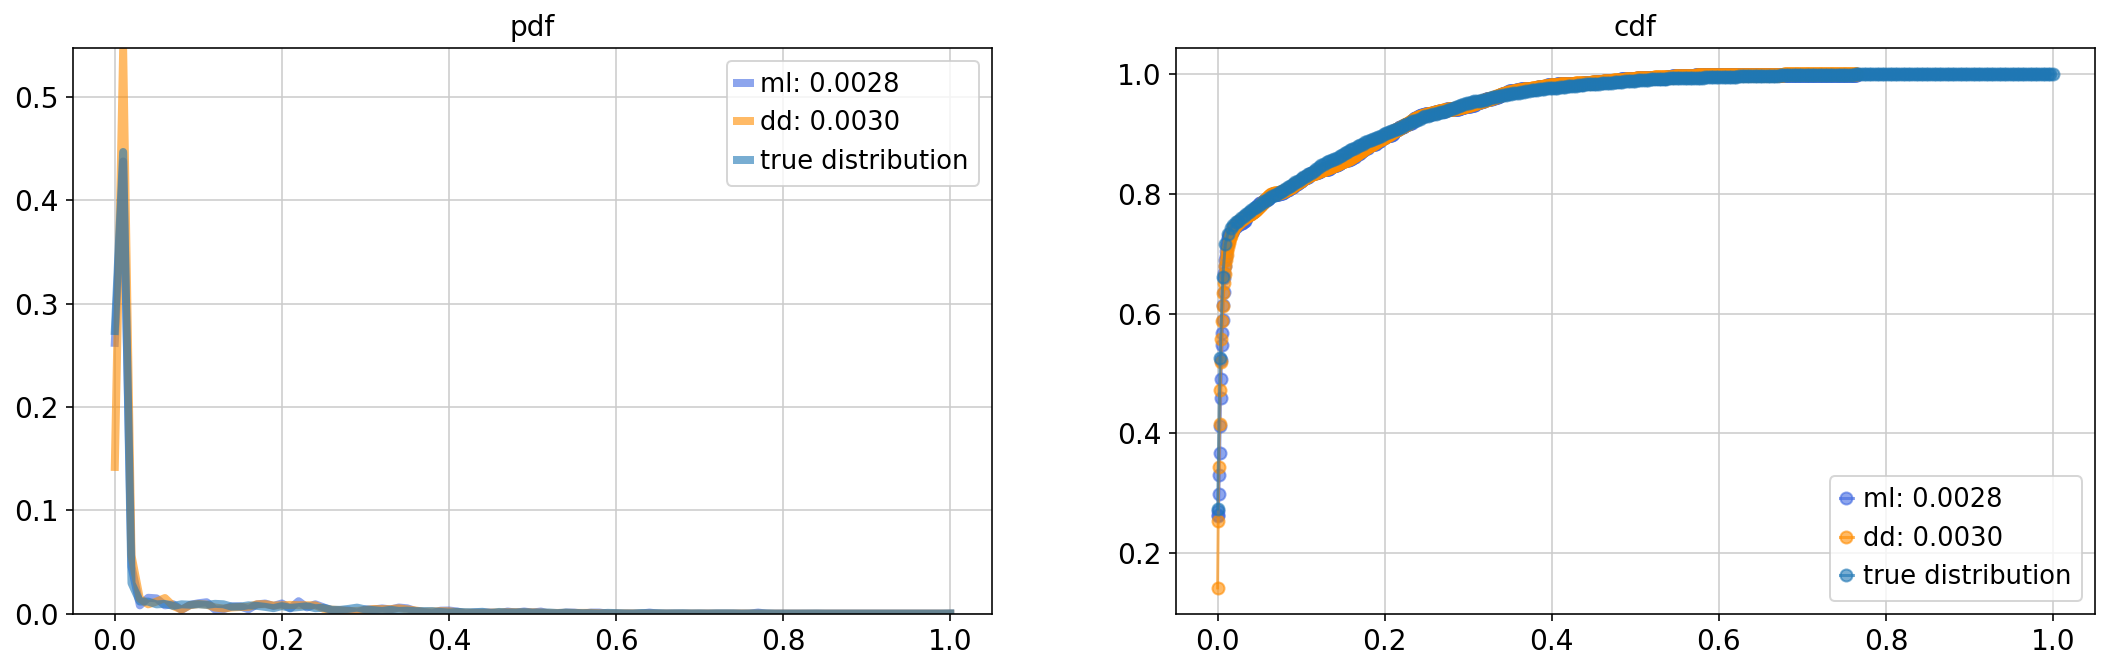

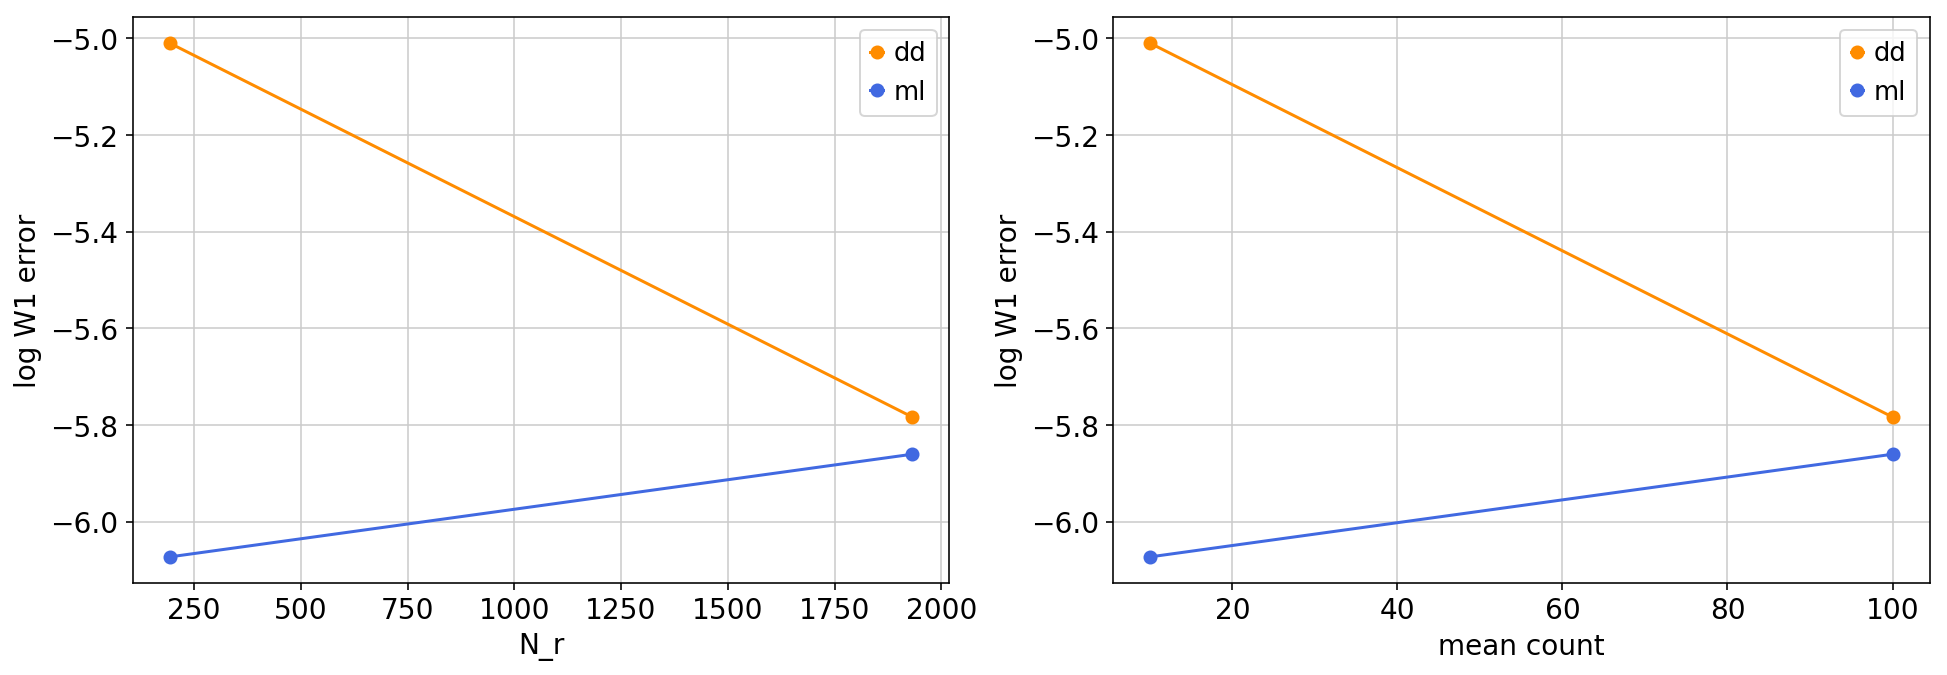

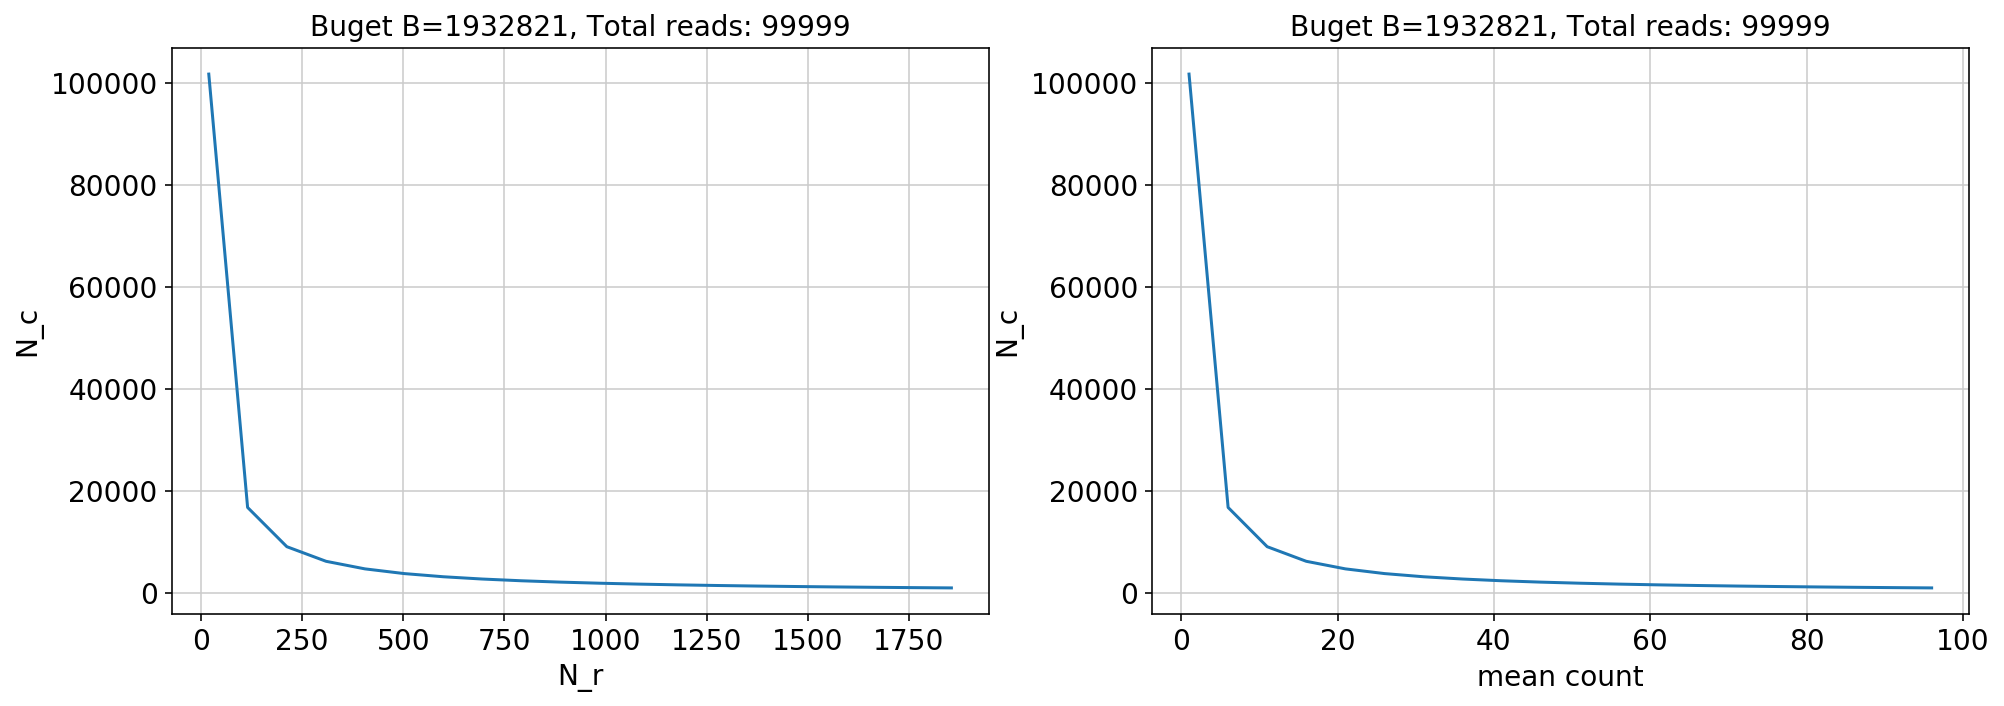

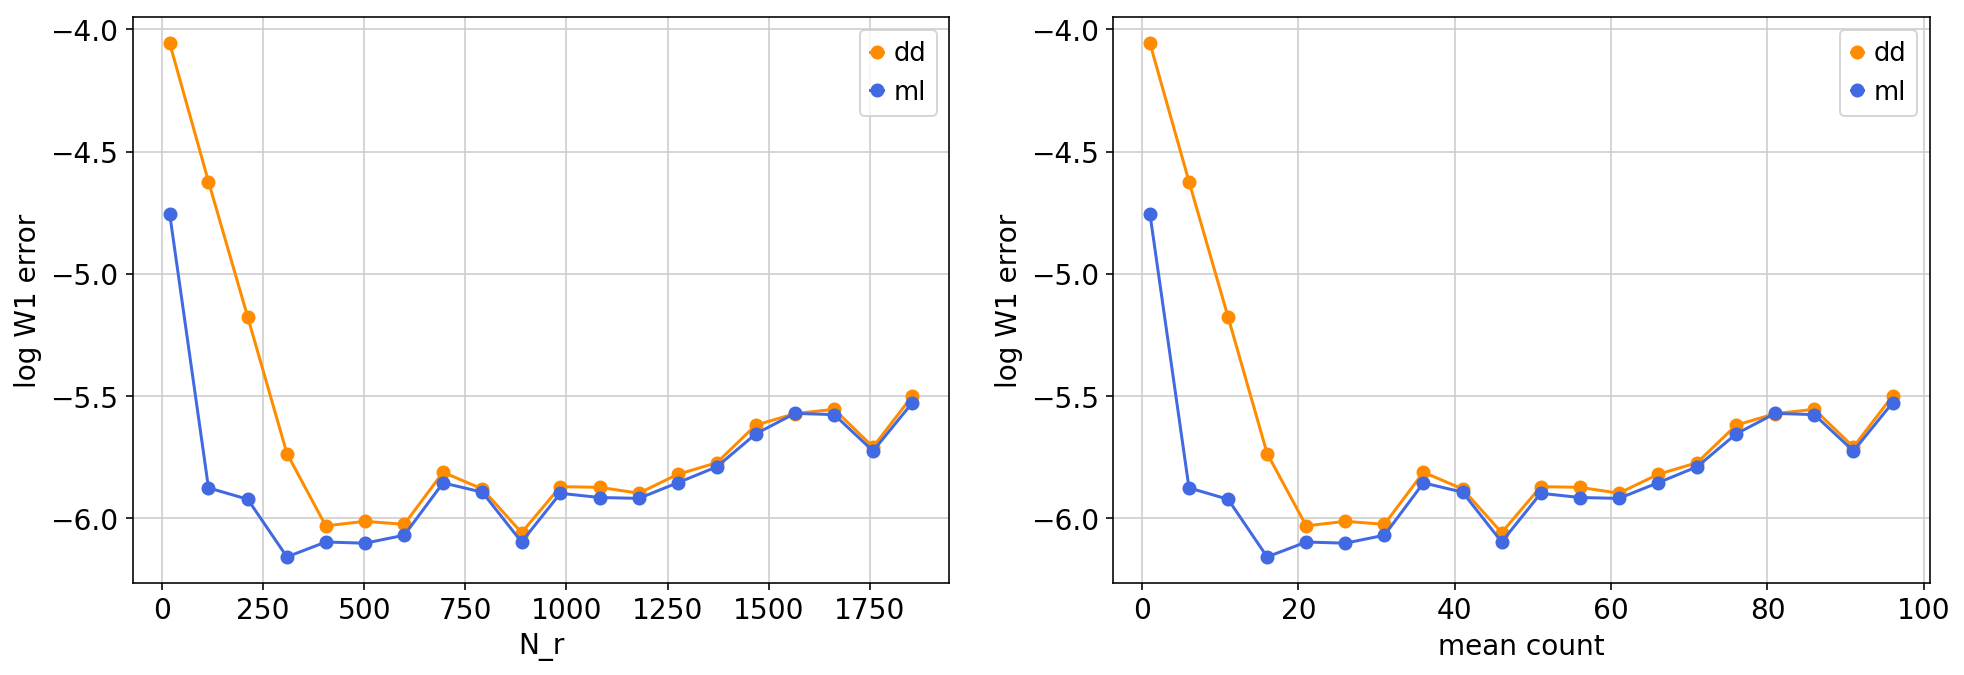

-------------------------------------------------------------------------
S100A8
Average counts per cell = 13.68273475718888


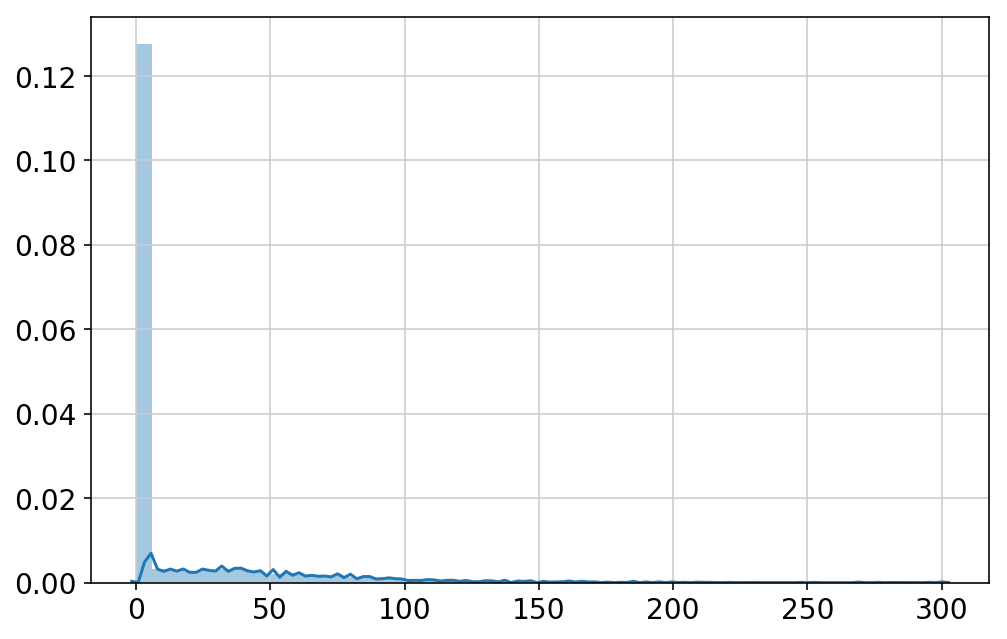

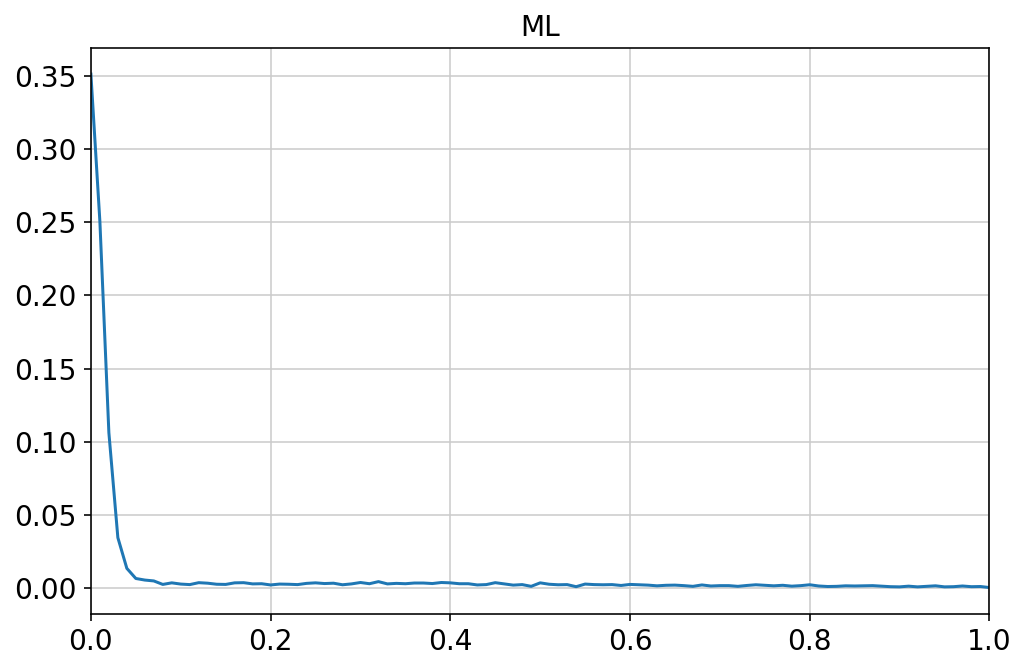

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 100

### debug: proportion separation ### start ###


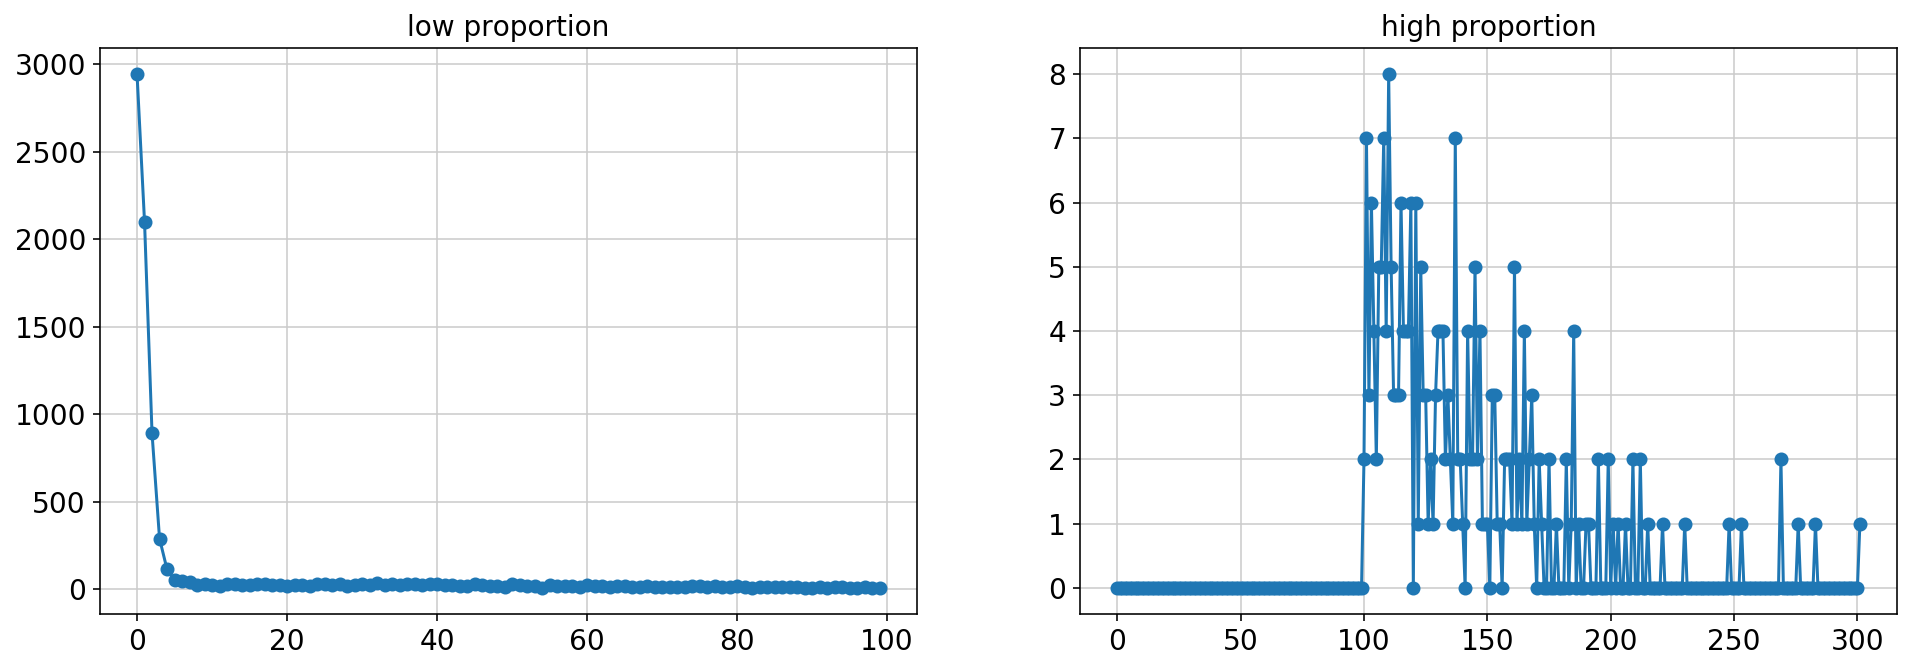

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.6063044439841292
-0.10526673932531594
-0.1846469270816442
-0.20269204803469165
-0.11379884146123231
Close-form gradients
[ 0.60630447 -0.10526672 -0.18464692 -0.20269203 -0.11379881]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:2.616049547792088, reg:0.0009620986451883573
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 4.51950354 -5.13488163  5.33388544 -4.57673498 -0.14179592]
gamma:100


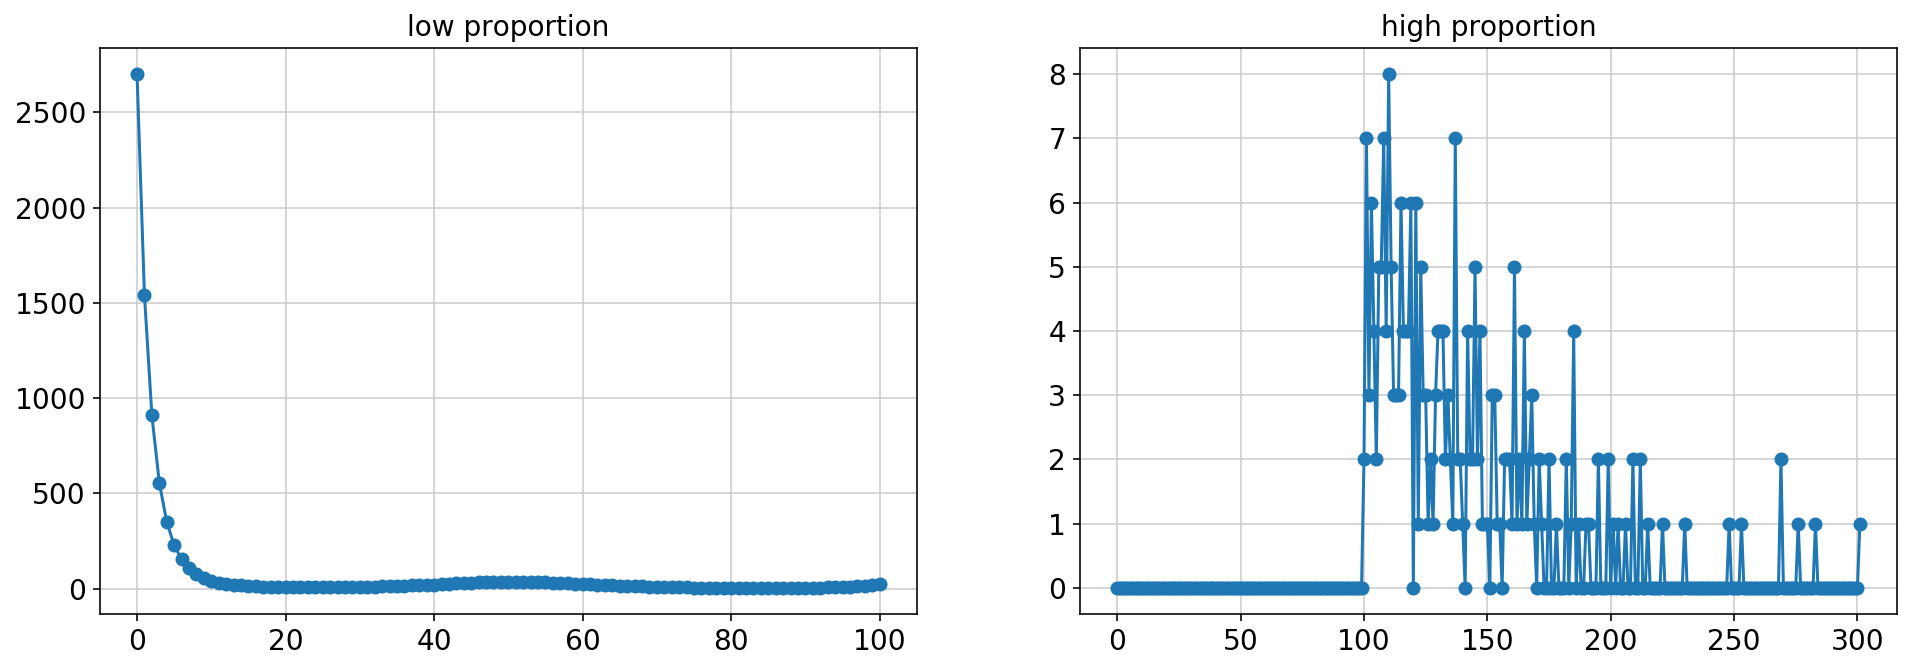

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:301.0


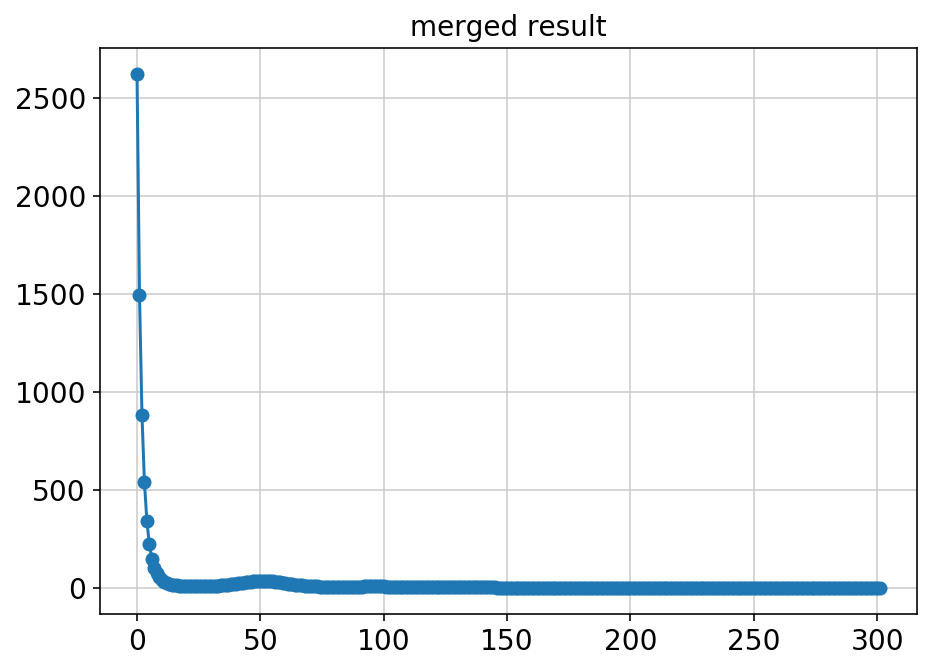

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 18.52%
>0.1: 16.86%
>0.15: 13.38%
>0.2: 7.406%
>0.25: 5.095%
>0.3: 4.041%
>0.35: 2.678%
>0.4: 1.844%


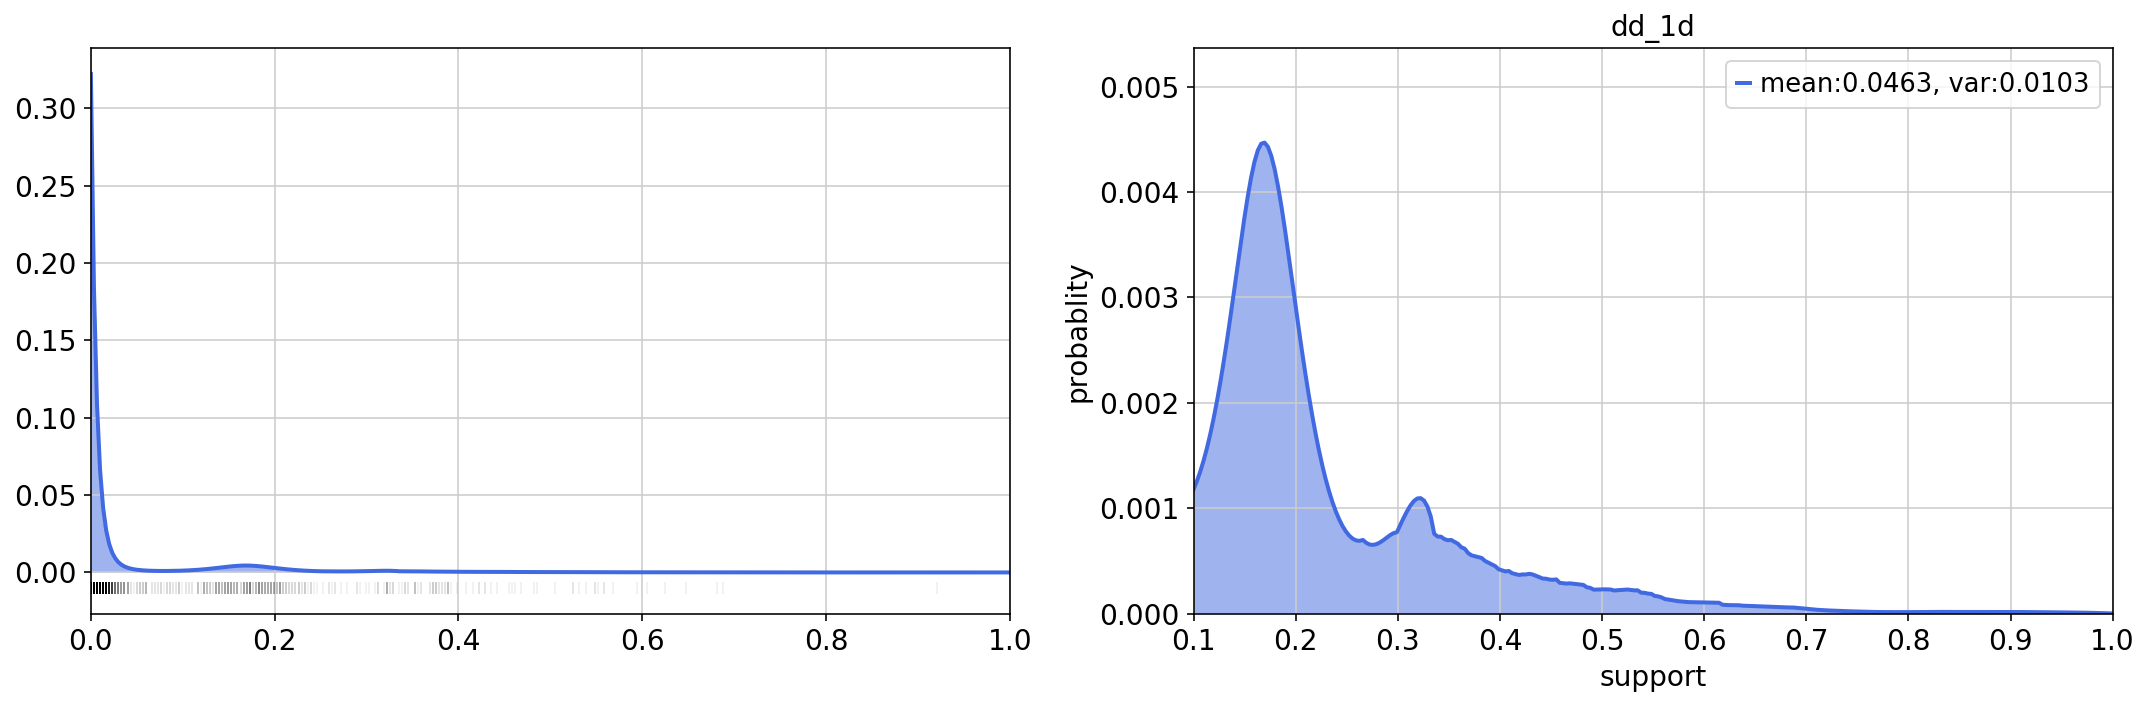

gamma: 301.0
### N_r=219, mean_cts=9, N_c=10000


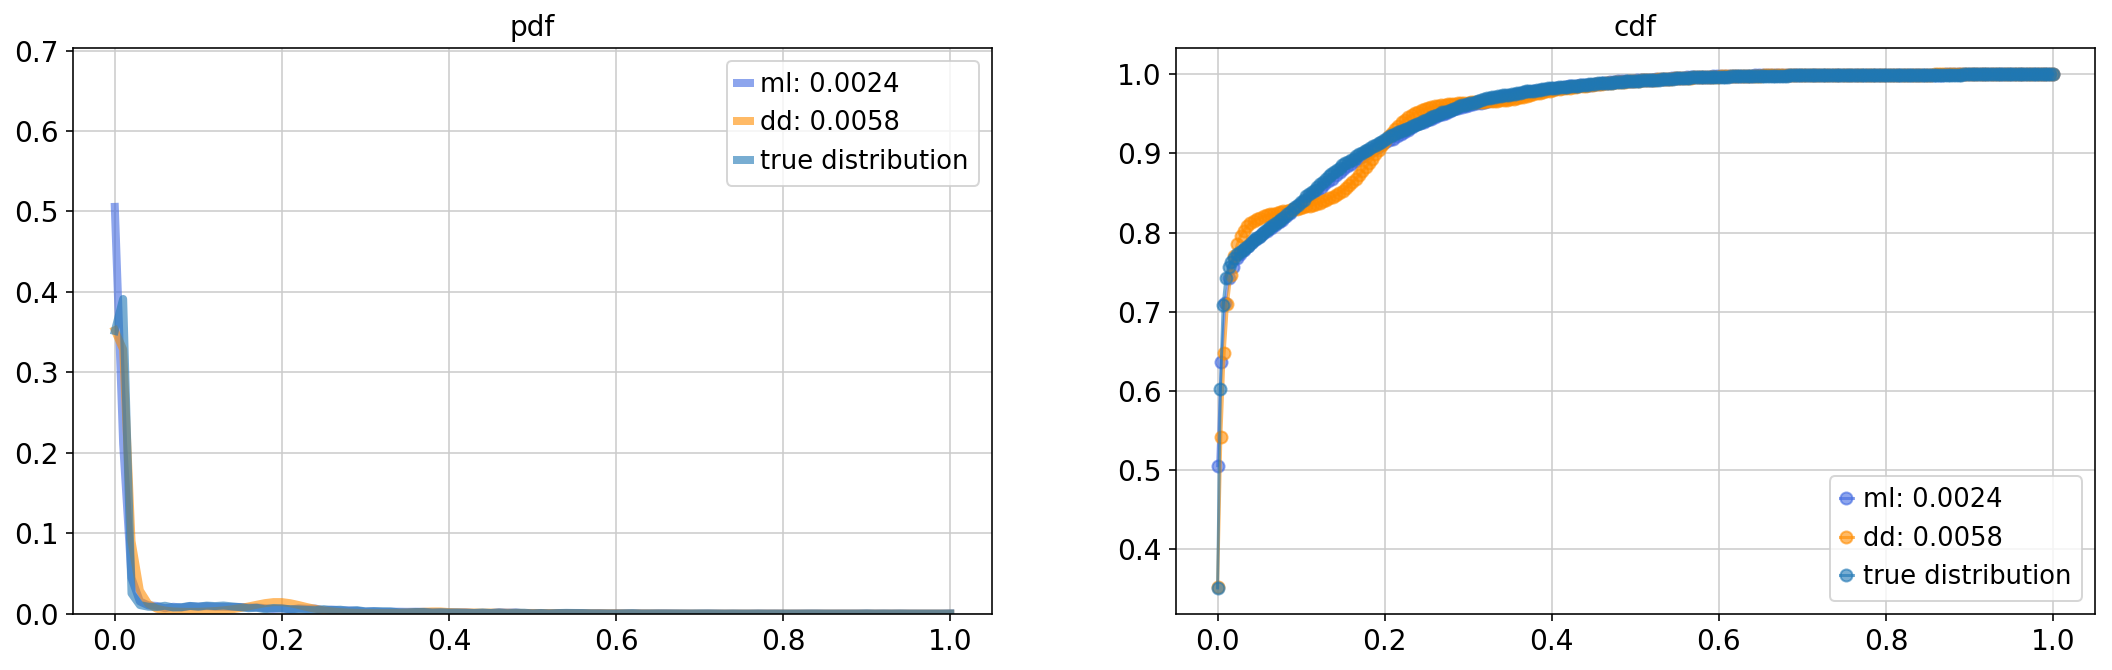



### N_r=2199, mean_cts=99, N_c=1000


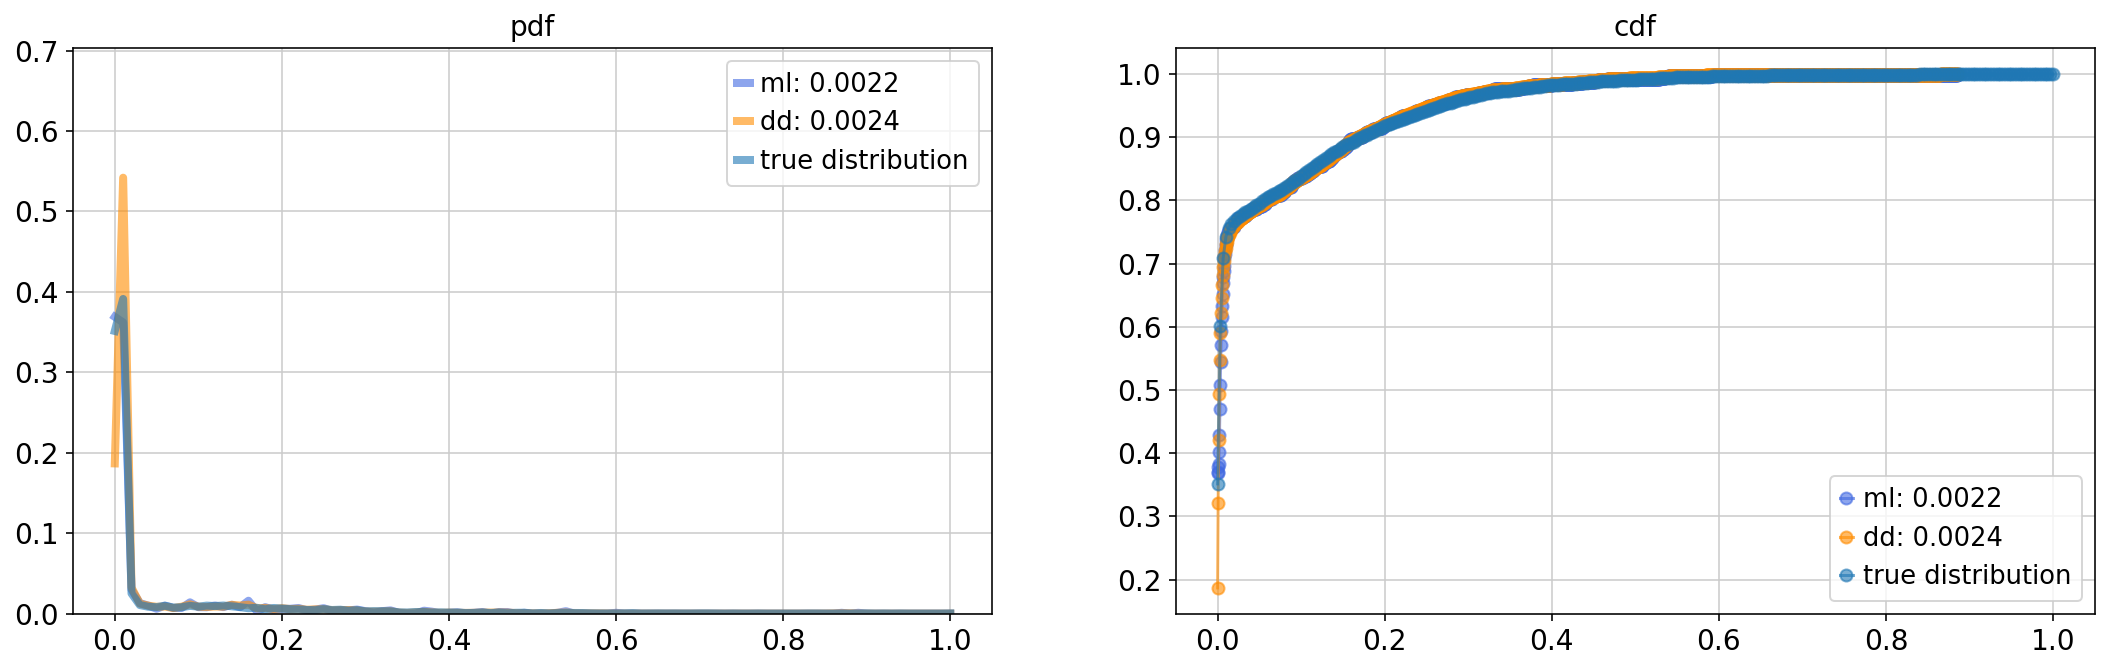

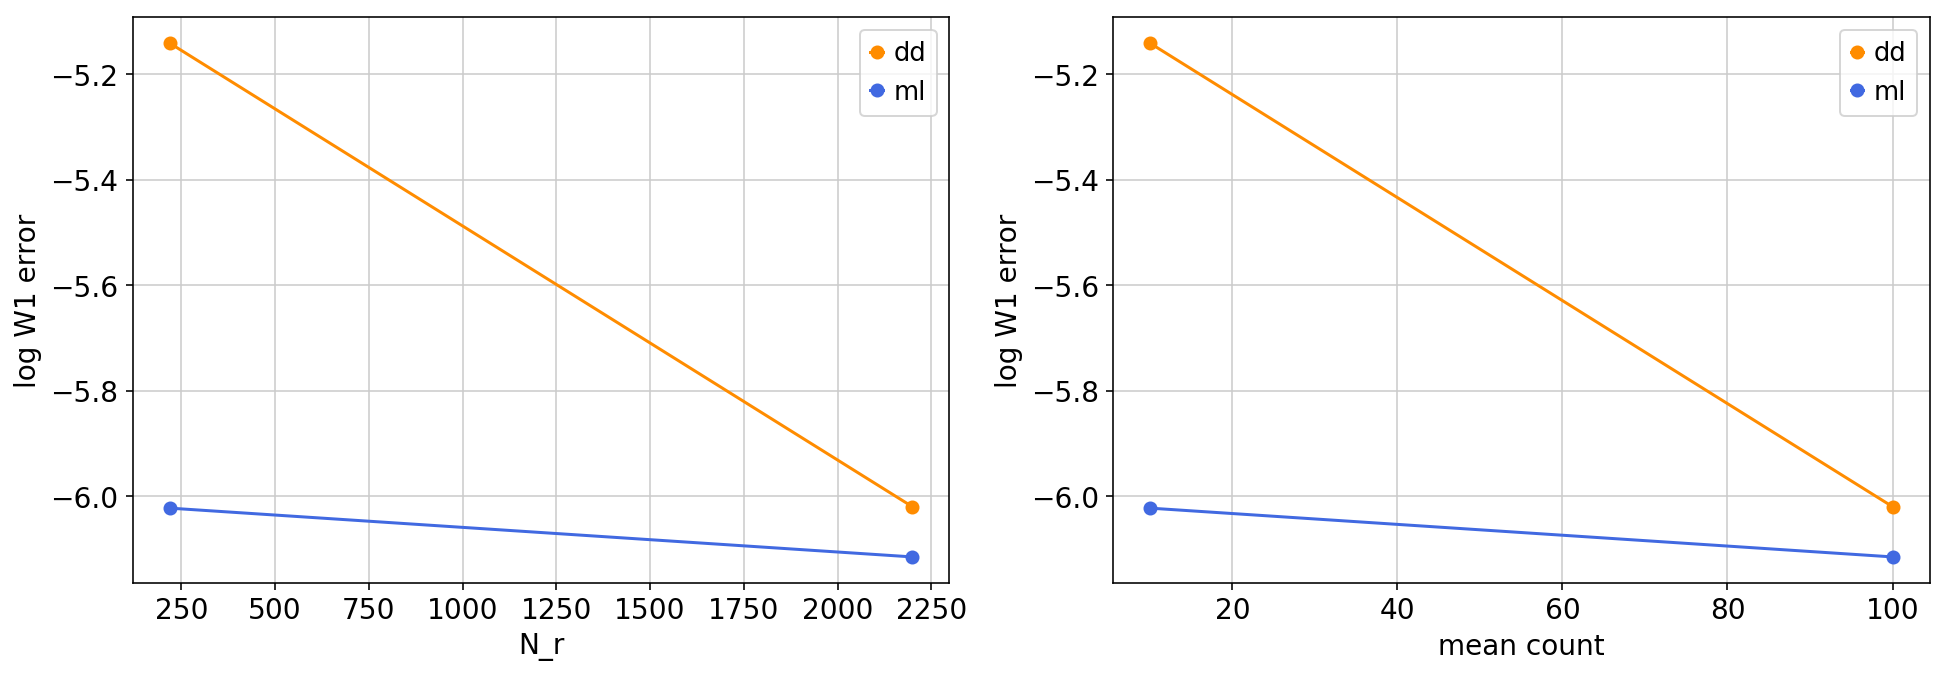

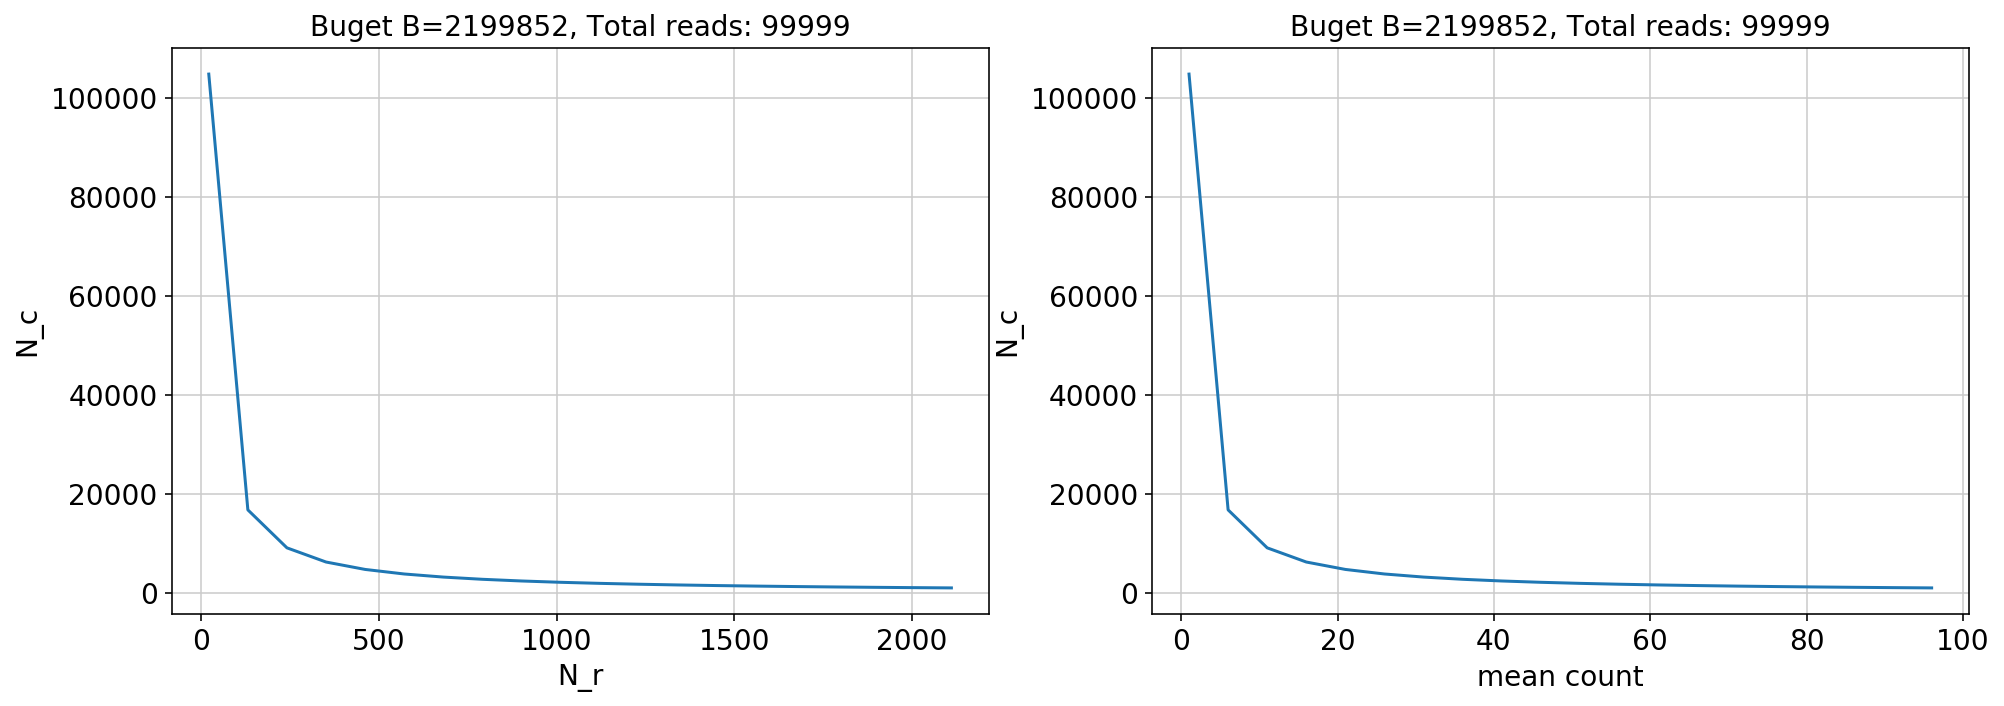

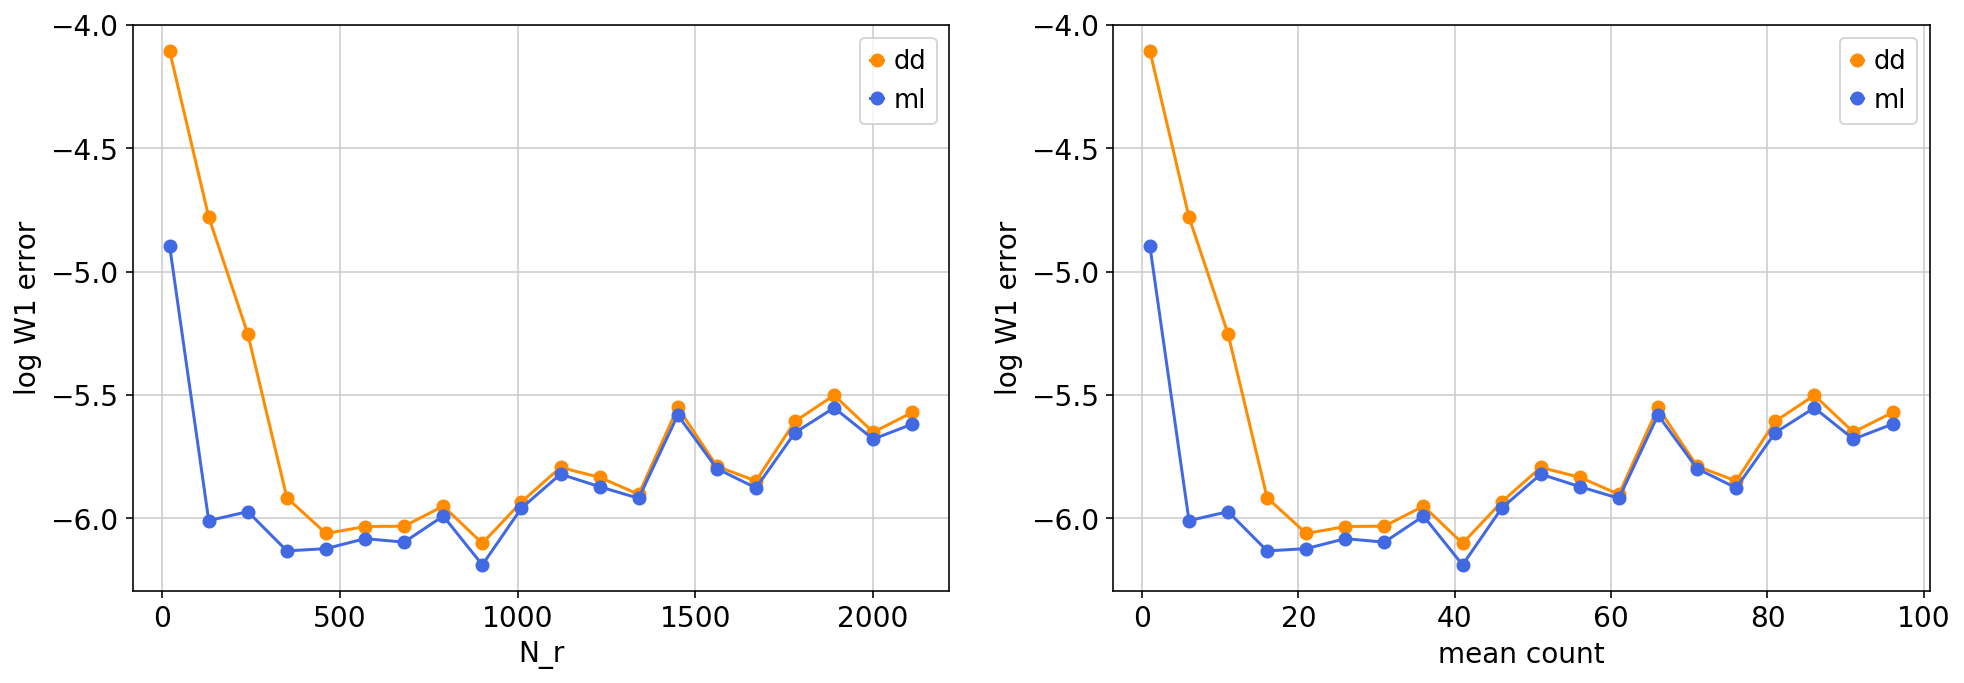

-------------------------------------------------------------------------
S100A4
Average counts per cell = 10.855745137811716


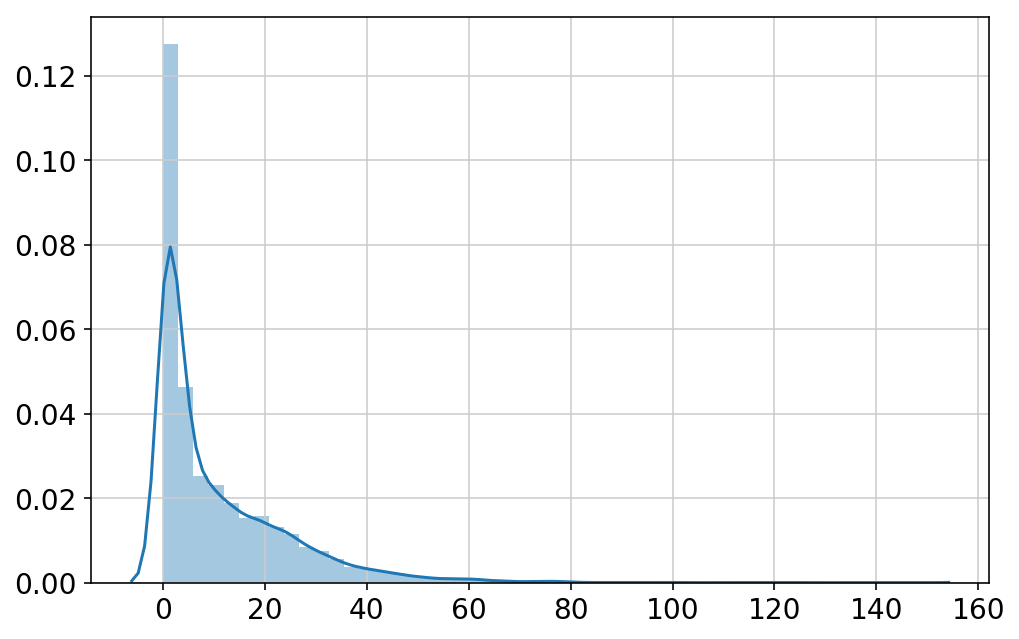

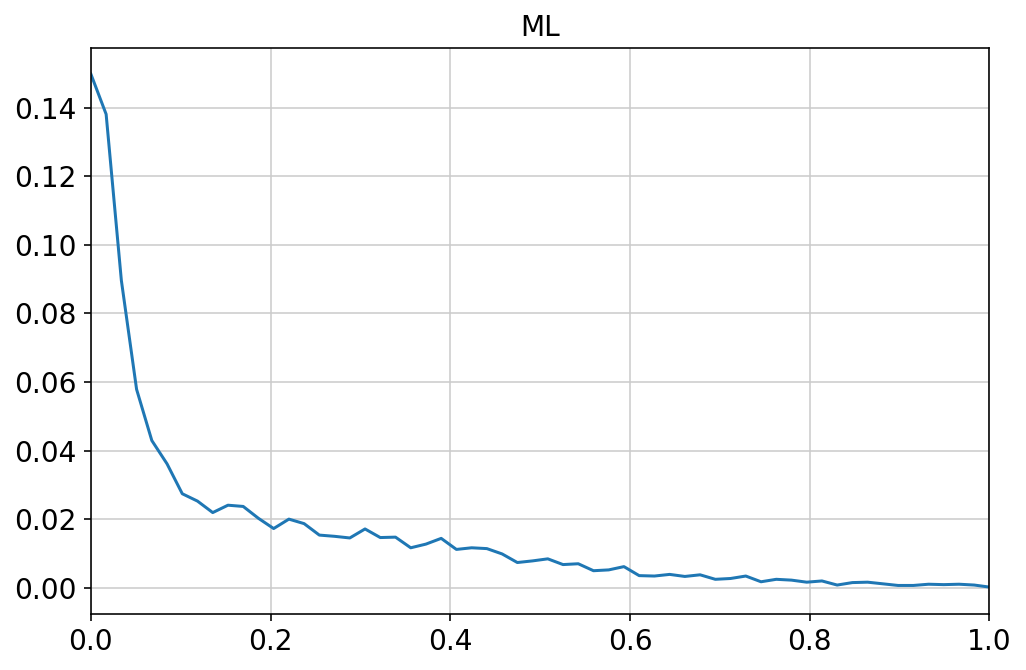

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 59

### debug: proportion separation ### start ###


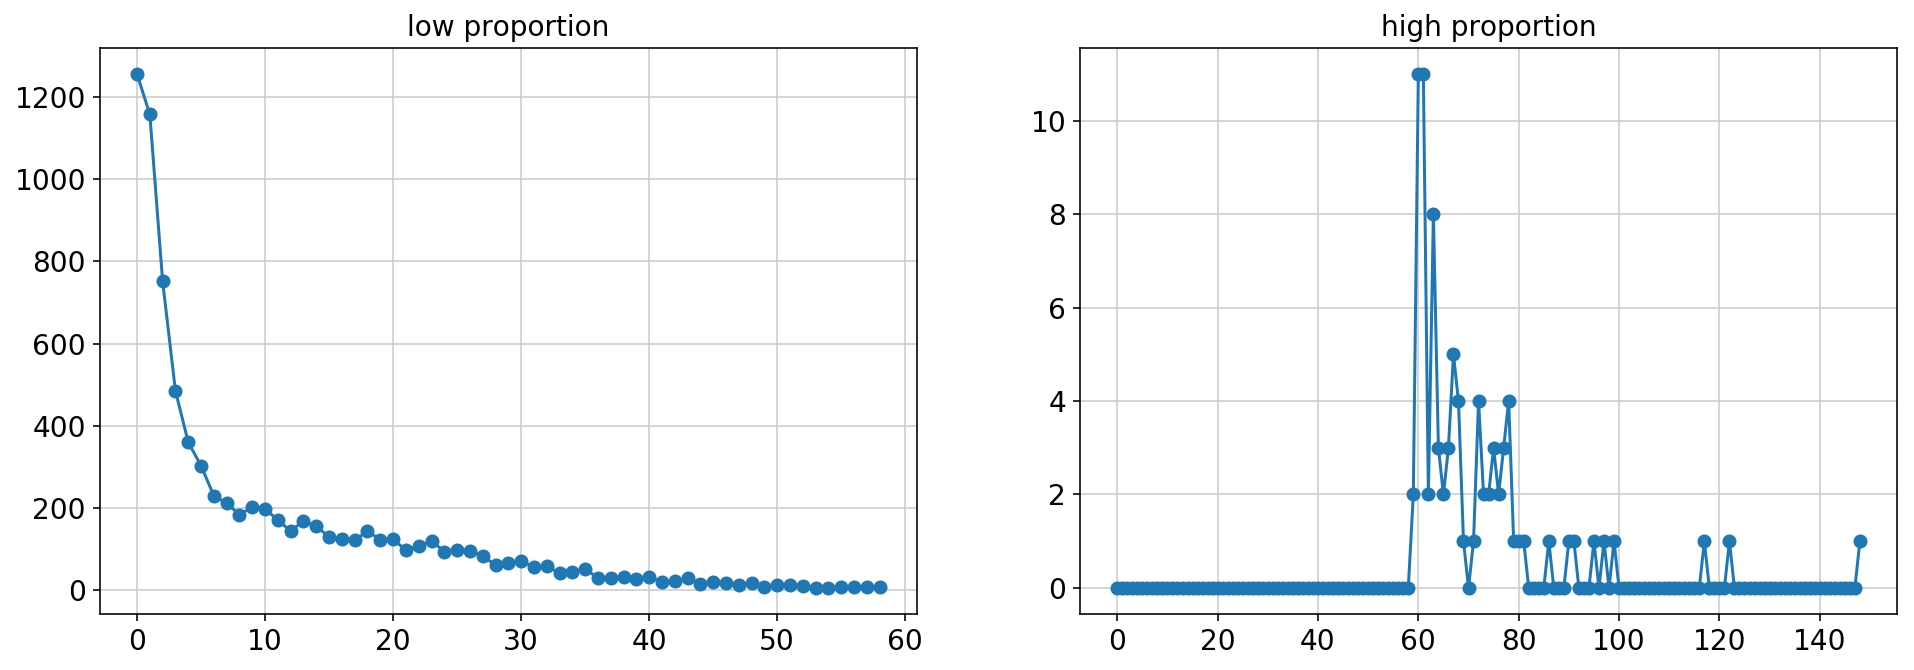

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.34280008964771014
0.06003164632062408
-0.10343761758235814
-0.18211678032287182
-0.11737744820550233
Close-form gradients
[ 0.34280011  0.06003167 -0.1034376  -0.18211676 -0.11737742]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:3.30590505775405, reg:0.0002850164940789132
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 3.16593737 -0.1150561   2.16986396 -2.86413192 -2.35662699]
gamma:59


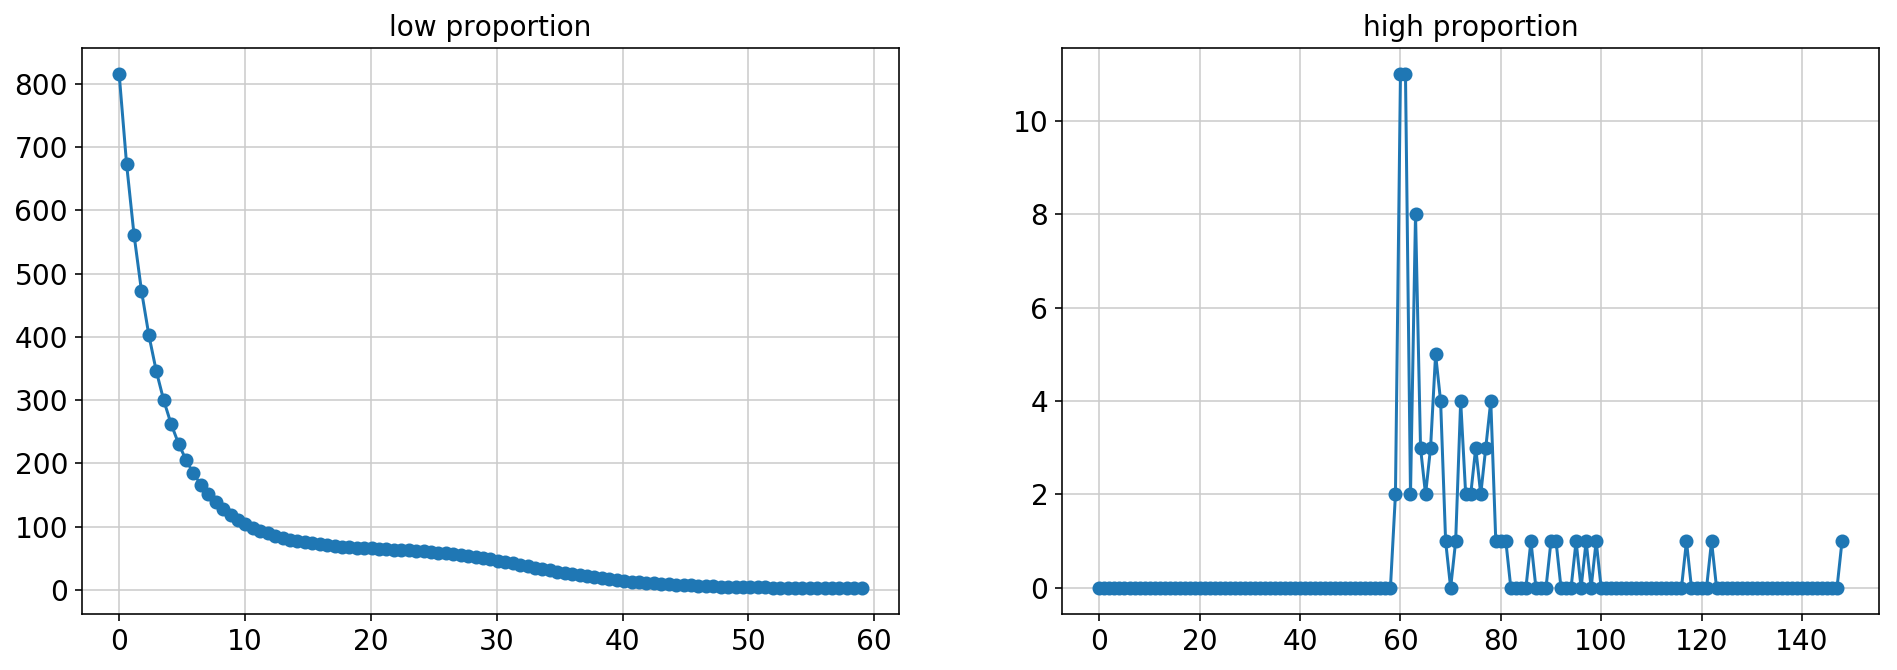

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:148.0


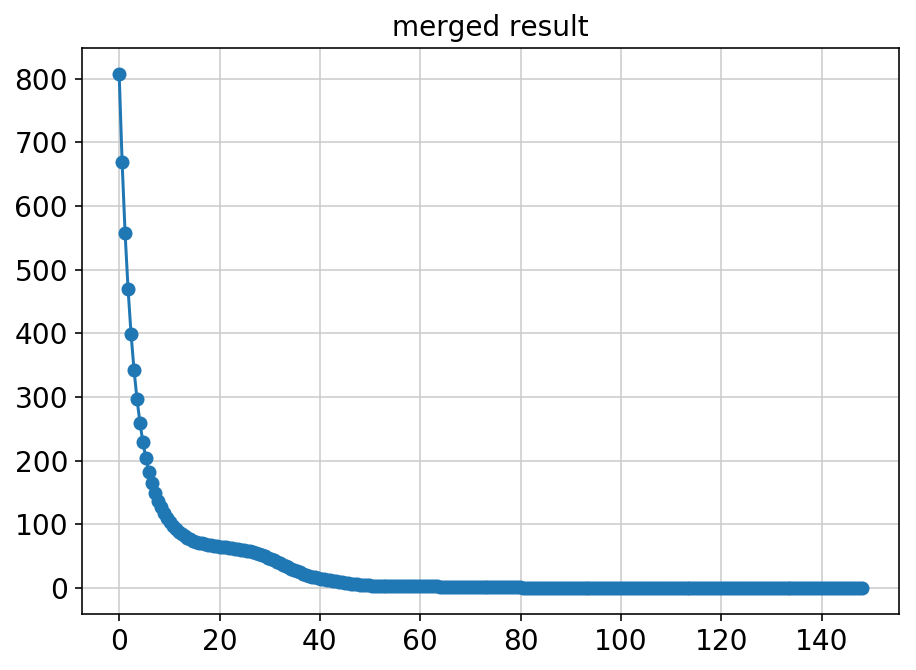

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 43.00%
>0.1: 27.72%
>0.15: 18.02%
>0.2: 9.193%
>0.25: 4.321%
>0.3: 2.133%
>0.35: 1.414%
>0.4: 0.903%


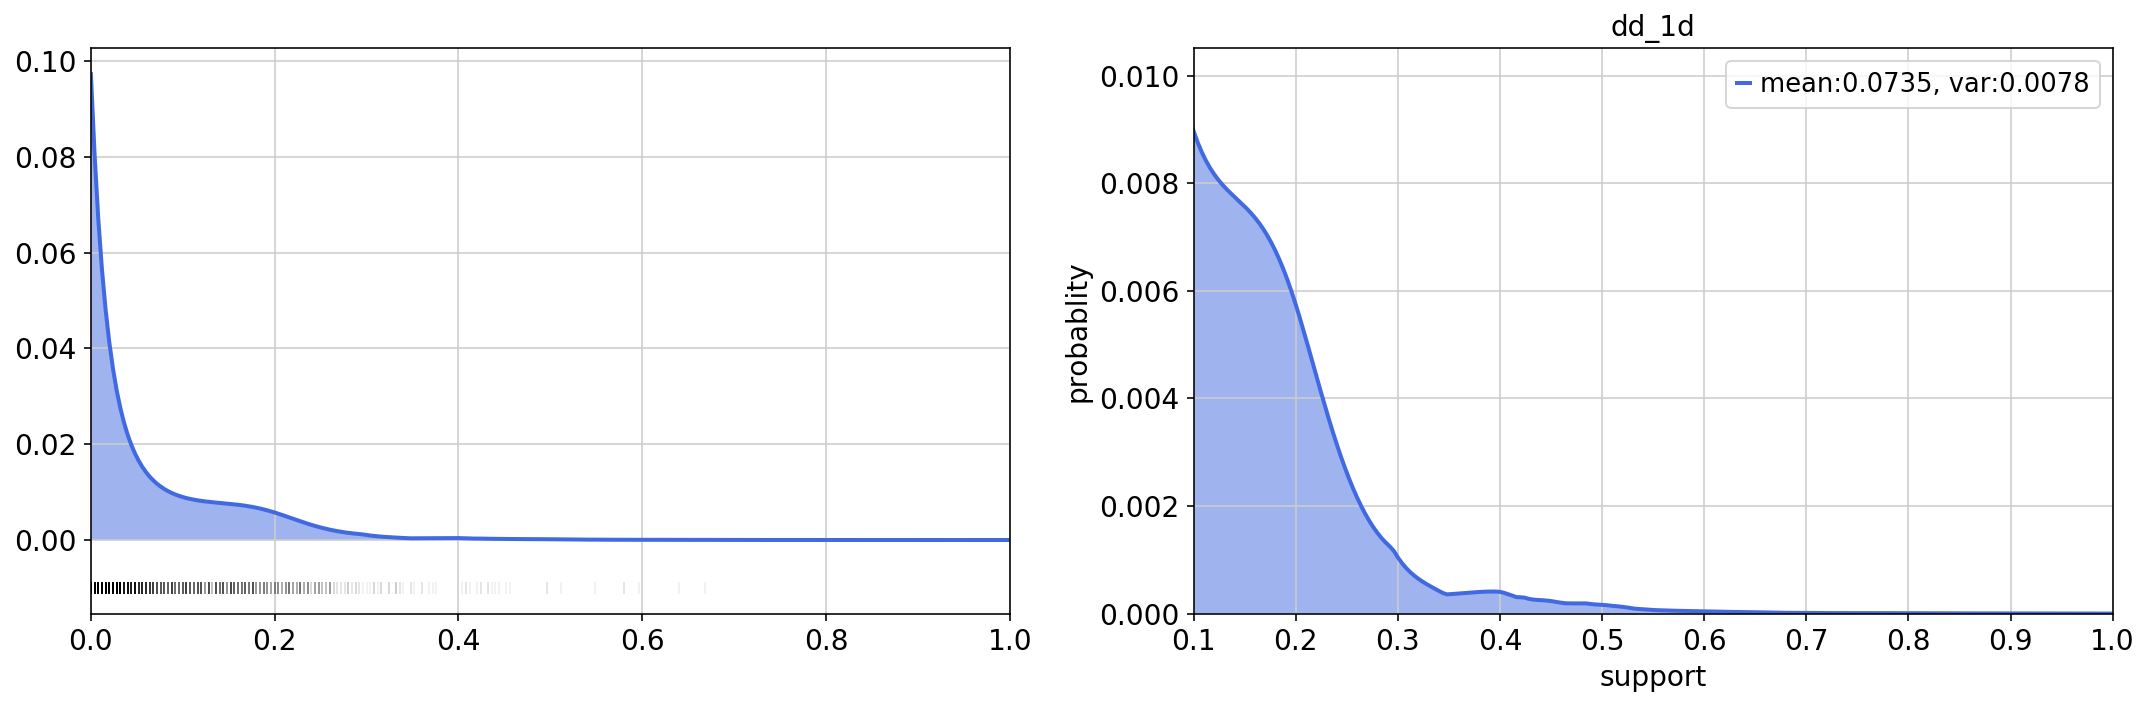

gamma: 148.0
### N_r=136, mean_cts=9, N_c=10000


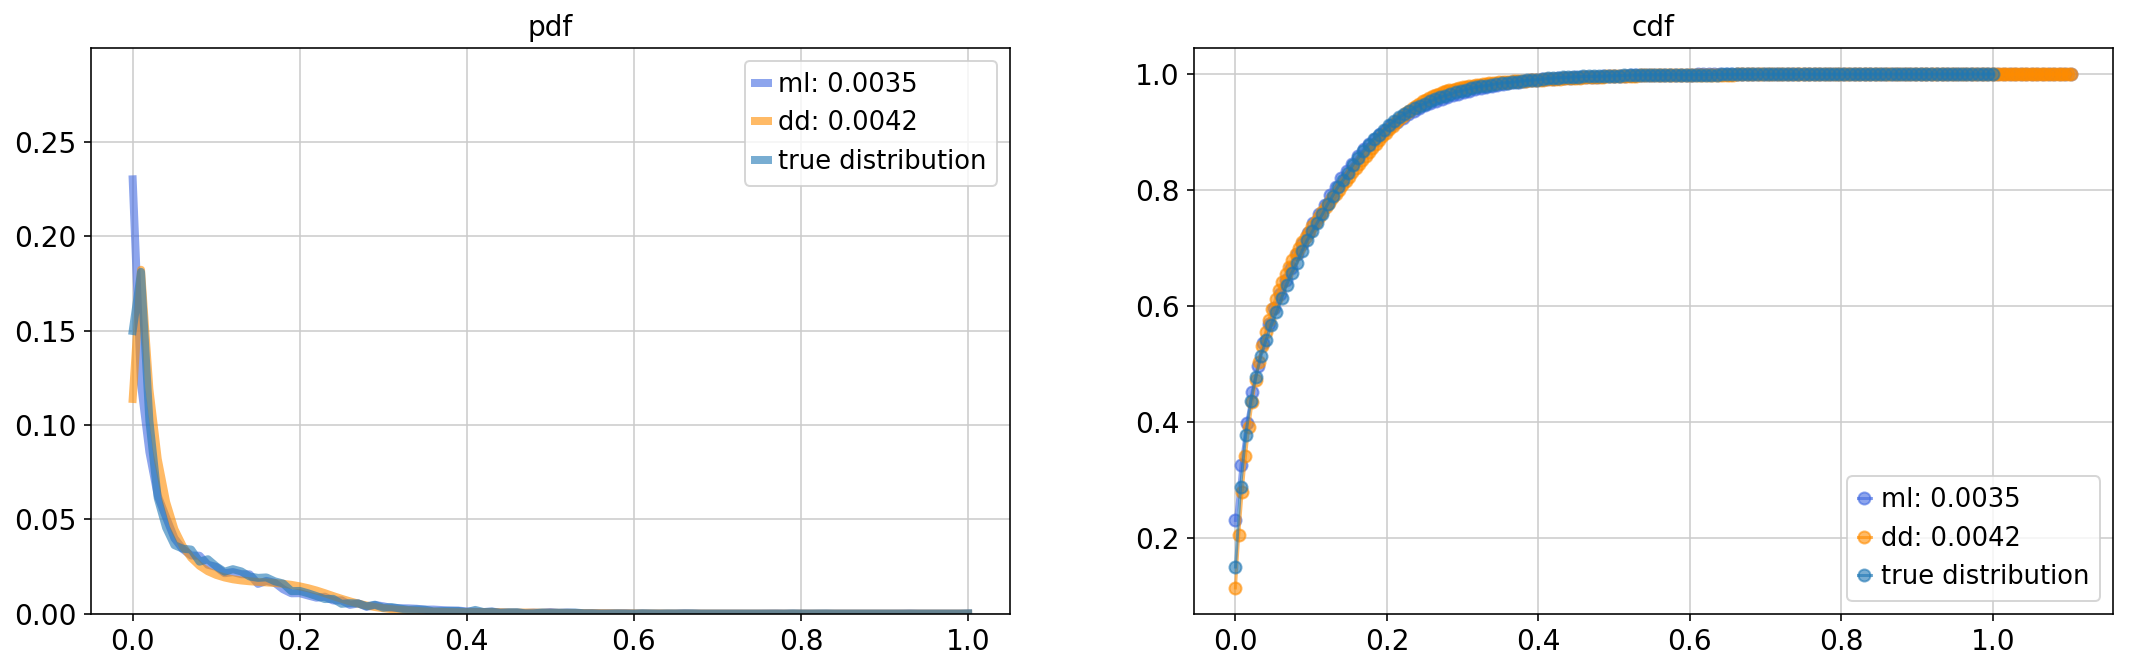



### N_r=1363, mean_cts=99, N_c=1000


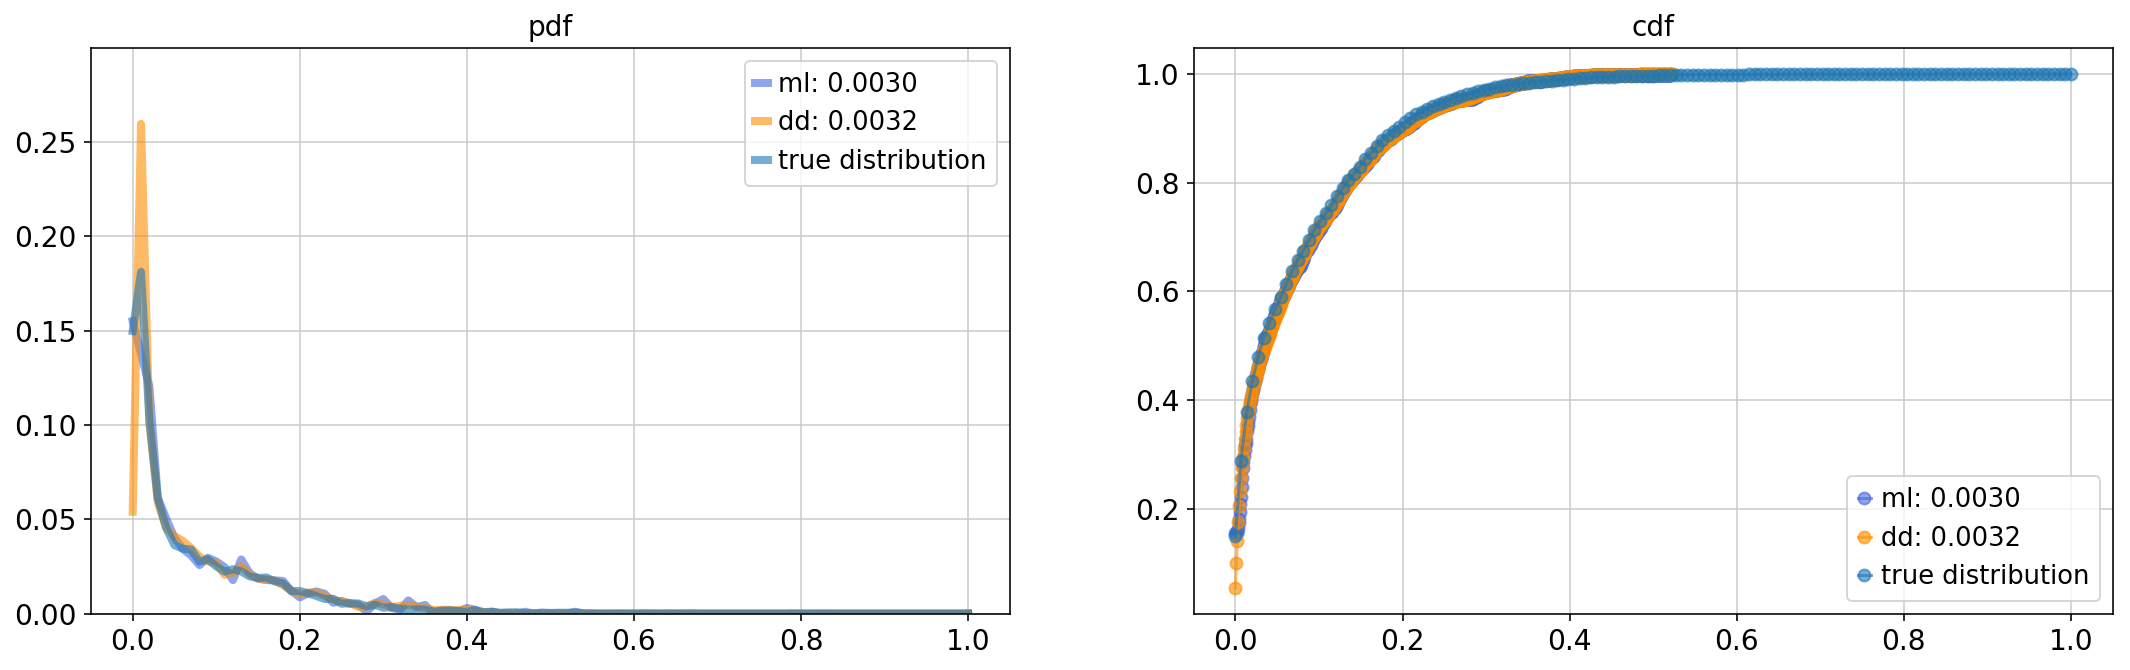

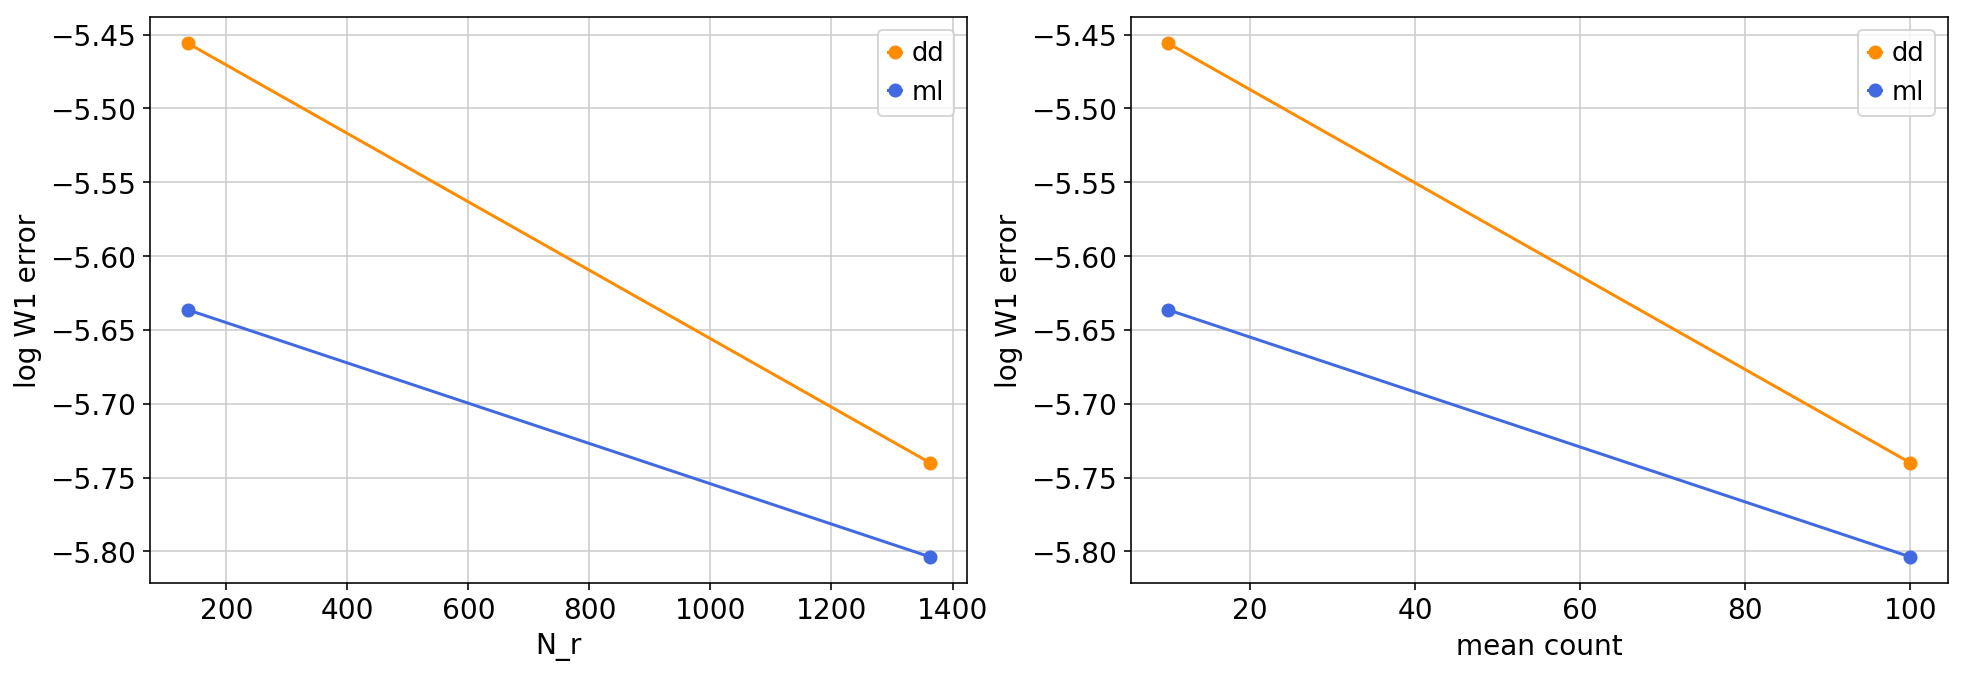

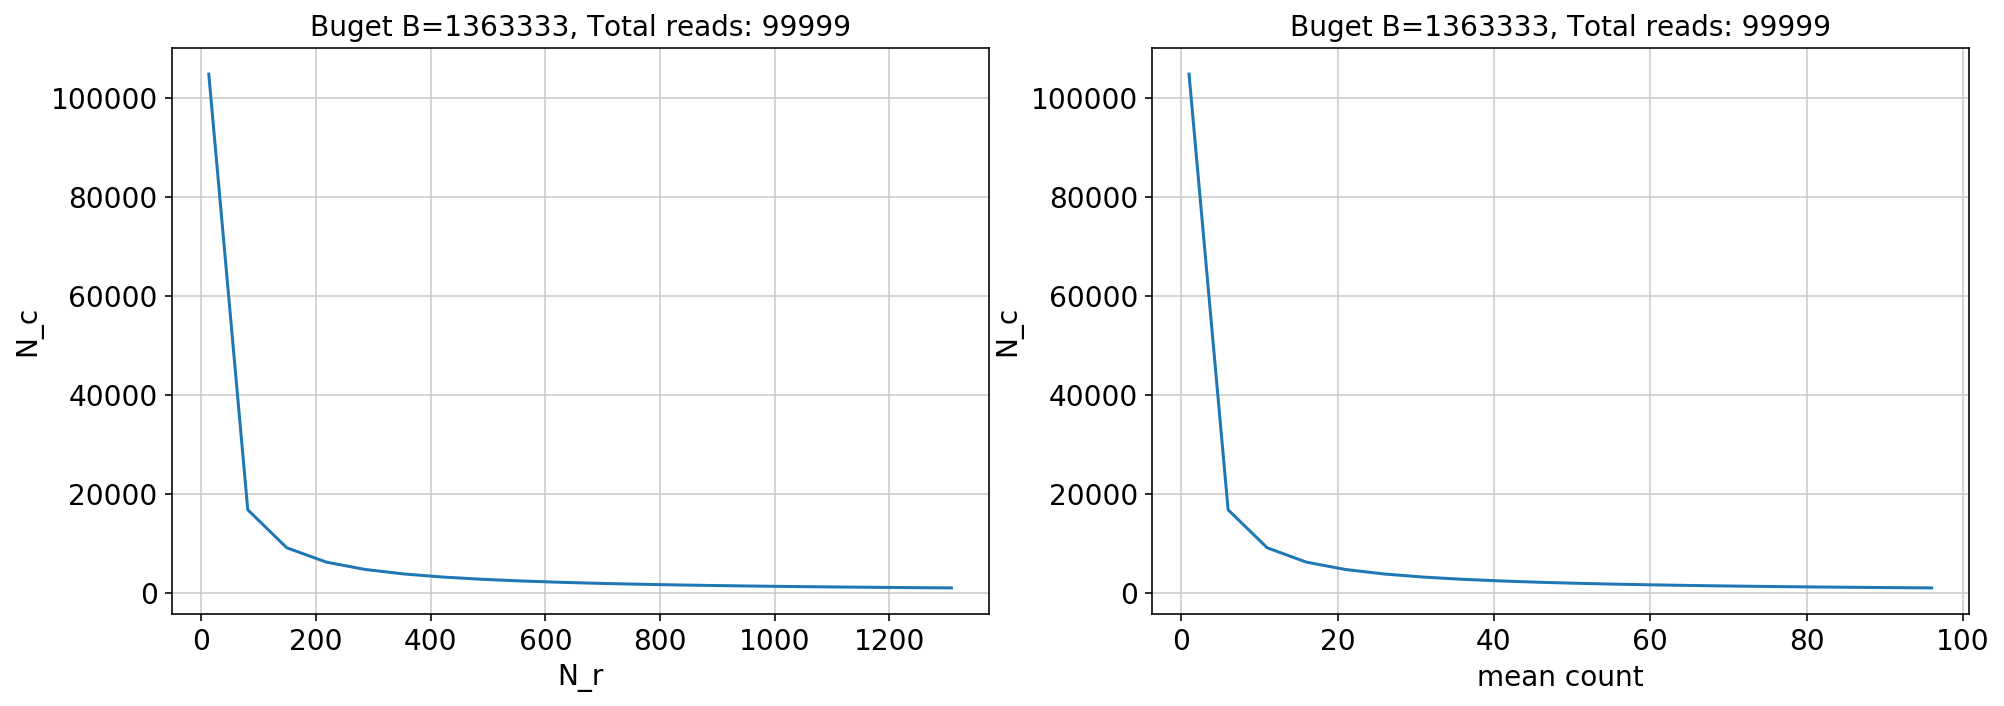

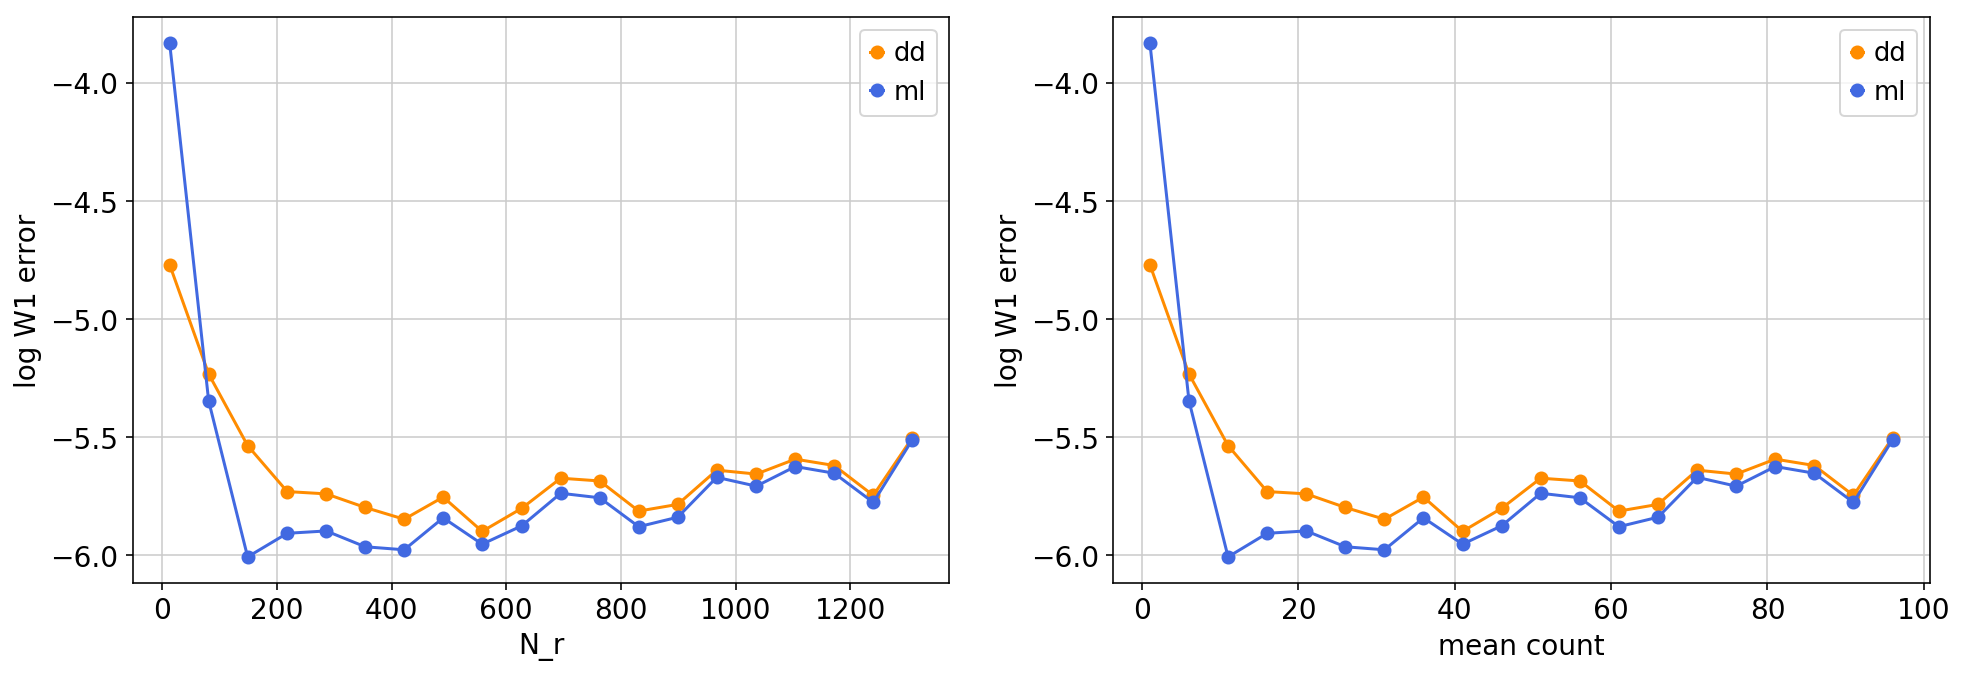

-------------------------------------------------------------------------
LGALS2
Average counts per cell = 1.2554587758024103


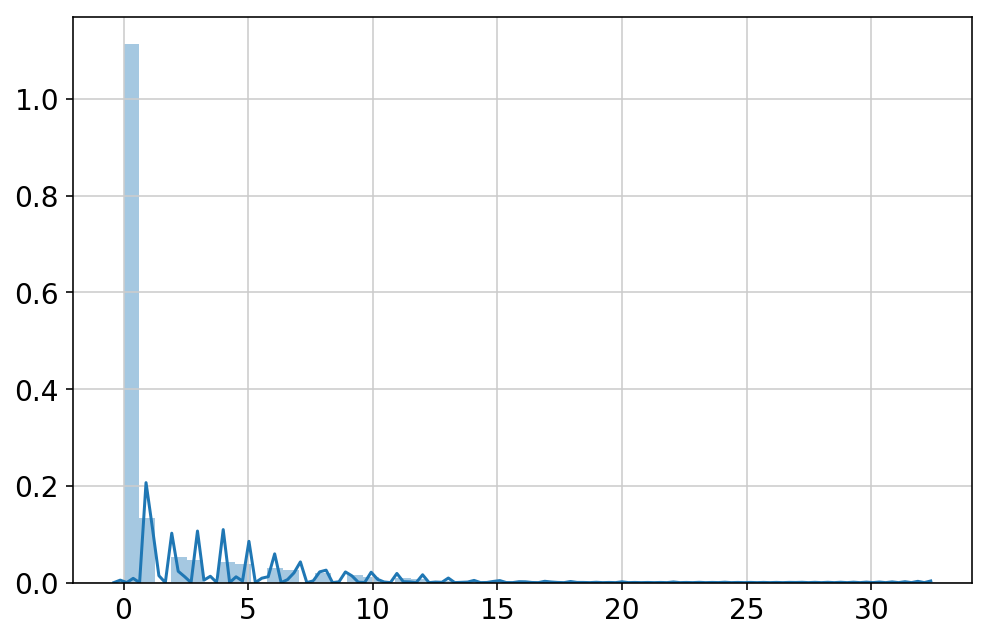

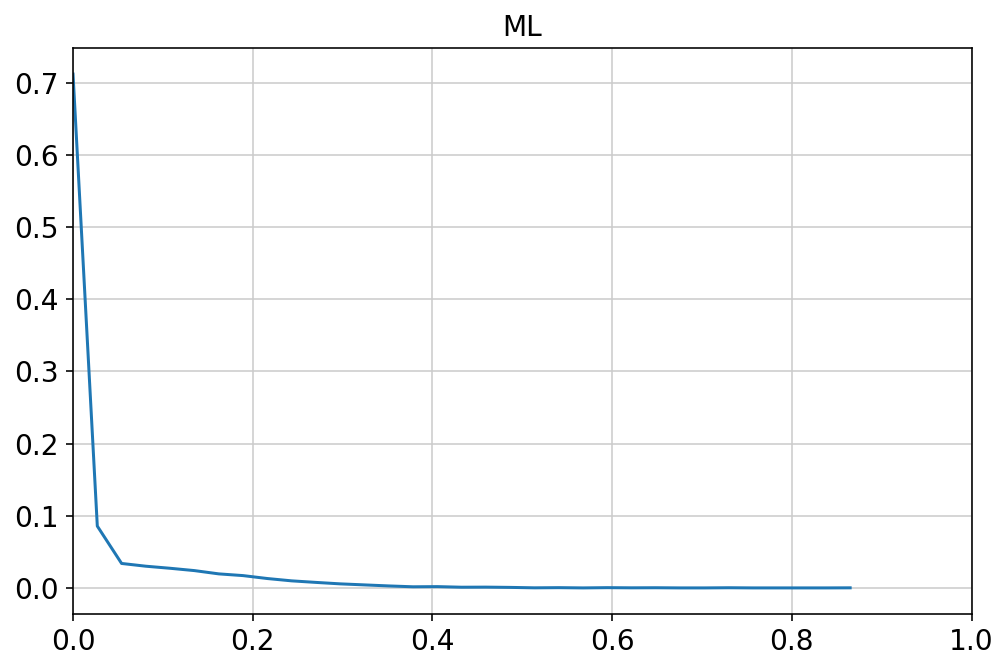

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 37

### debug: proportion separation ### start ###


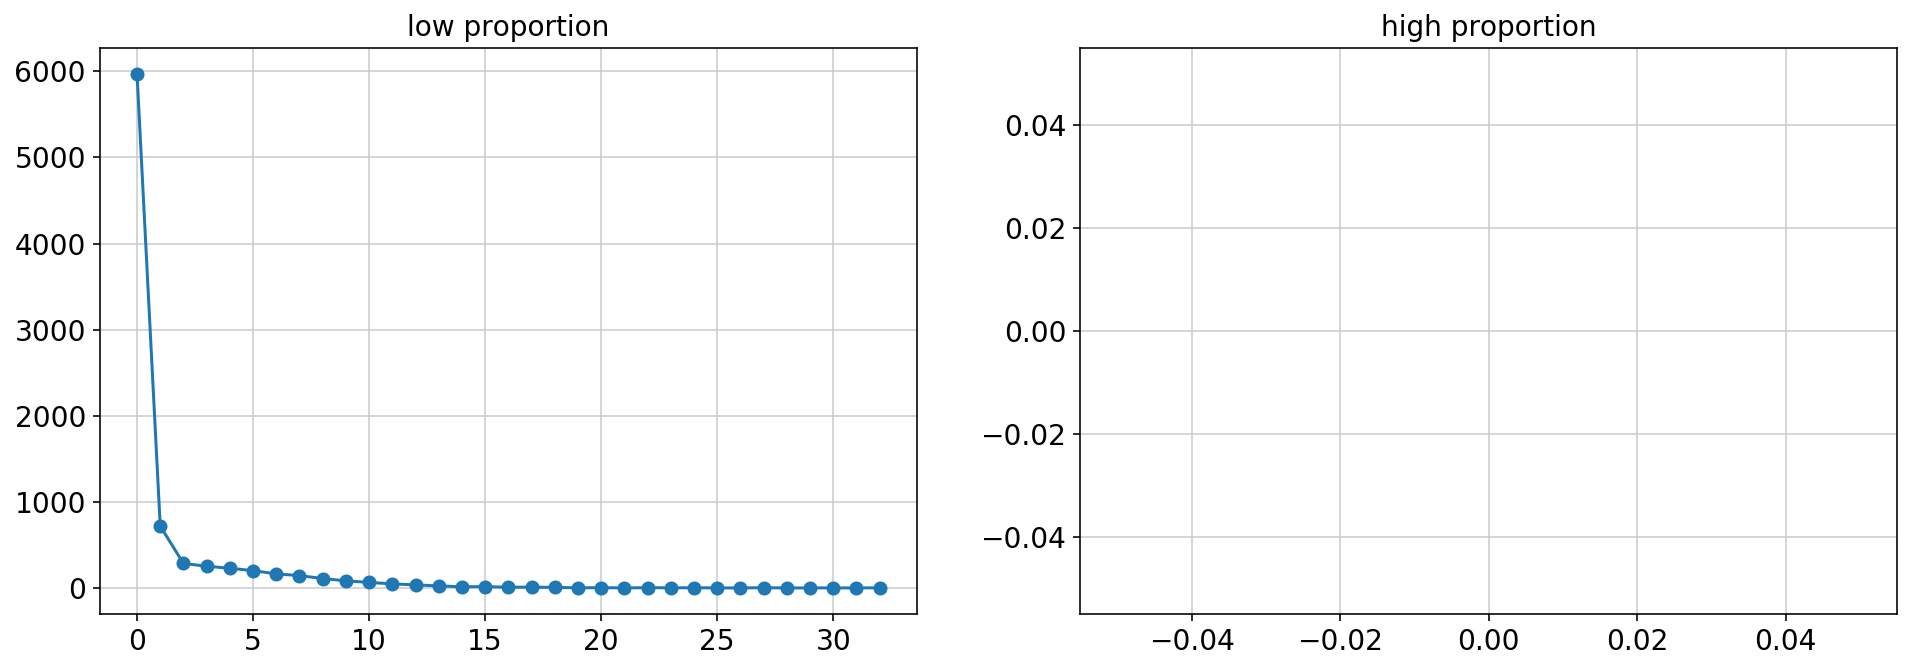

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.629420497944011
-0.05087990251340102
-0.20914113862957606
-0.2409305484007973
-0.1285690145458318
Close-form gradients
[ 0.62942052 -0.05087989 -0.20914112 -0.24093053 -0.12856899]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.330905492134471, reg:0.013085984320843657
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  9.96375149  -0.45377887  18.92278878 -29.1635156    0.73047649]
gamma:37


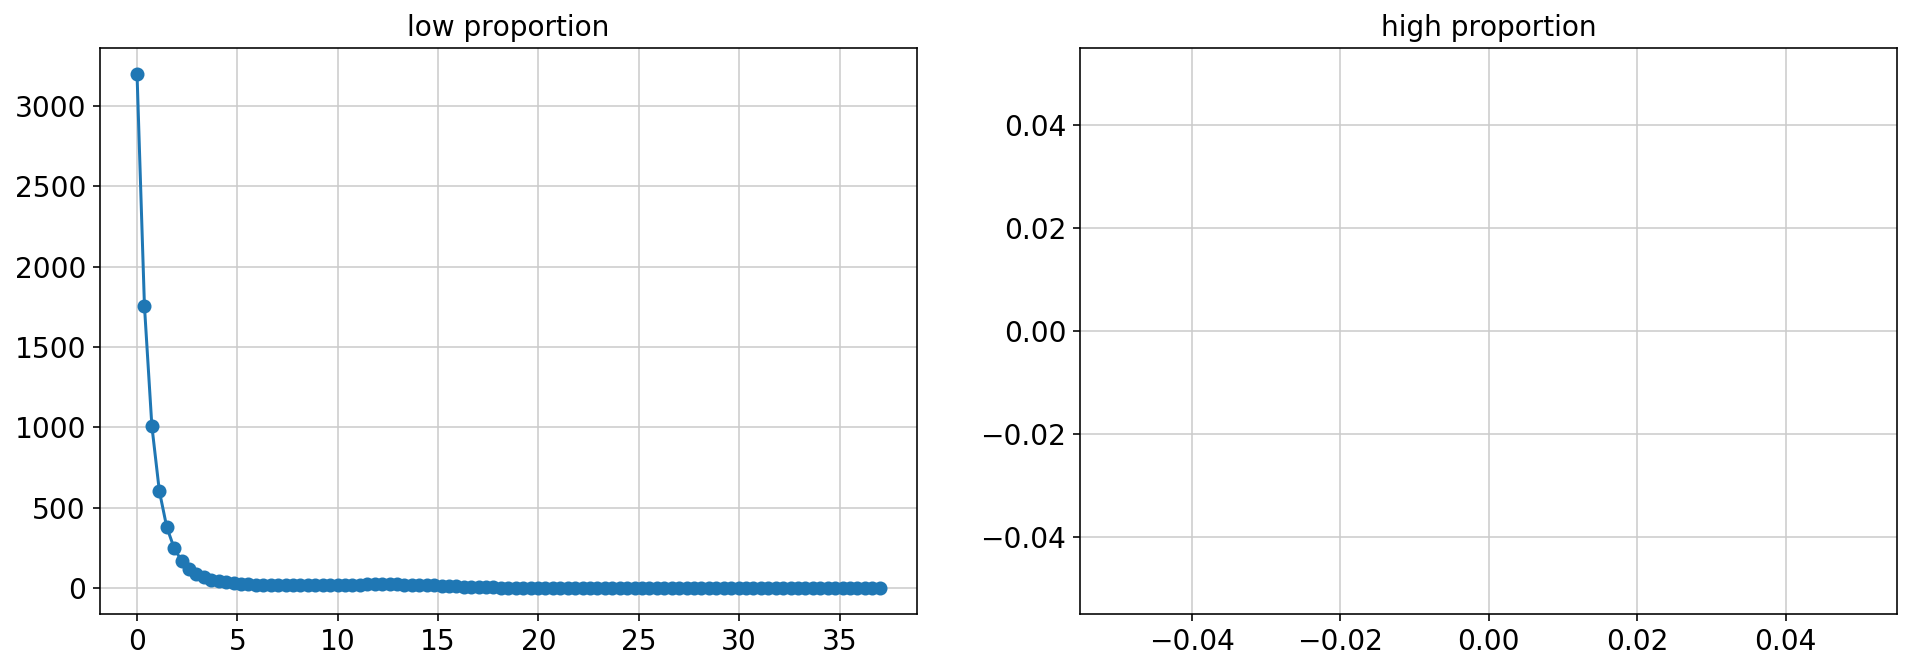

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:37.0


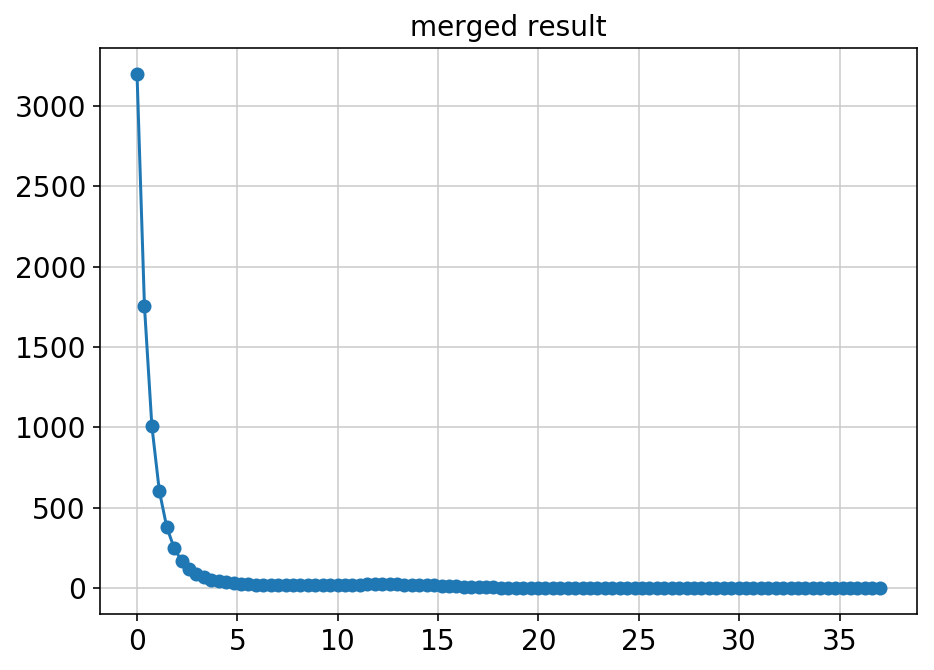

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 14.21%
>0.1: 8.360%
>0.15: 6.536%
>0.2: 5.419%
>0.25: 4.370%
>0.3: 3.182%
>0.35: 1.886%
>0.4: 0.786%


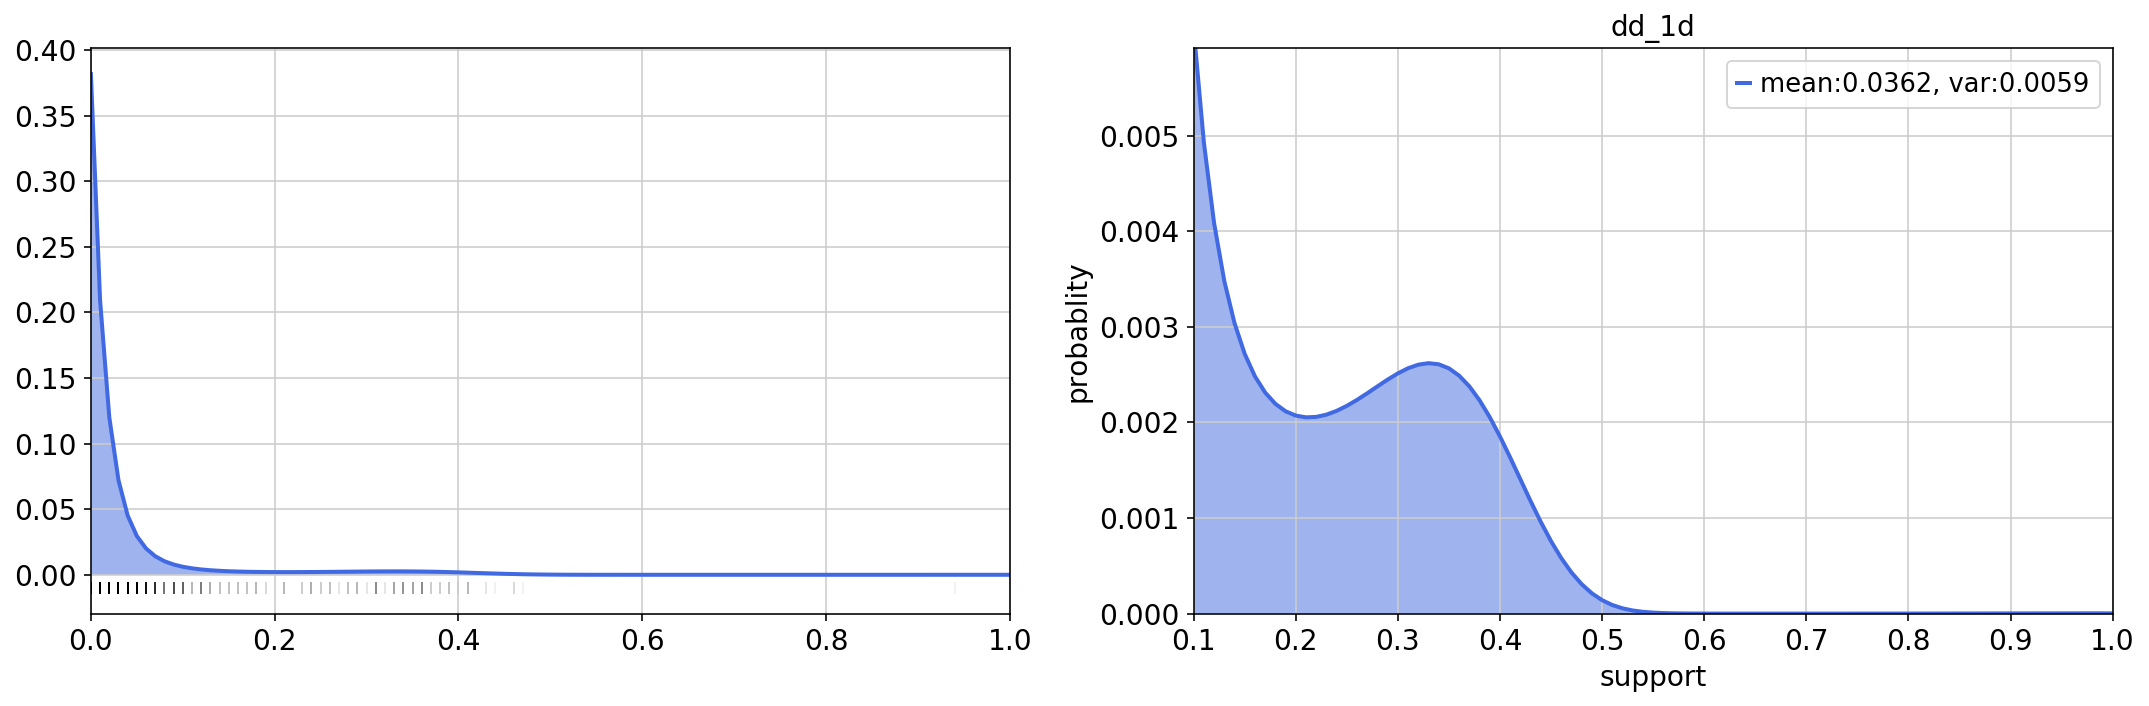

gamma: 37.0
### N_r=254, mean_cts=9, N_c=10000


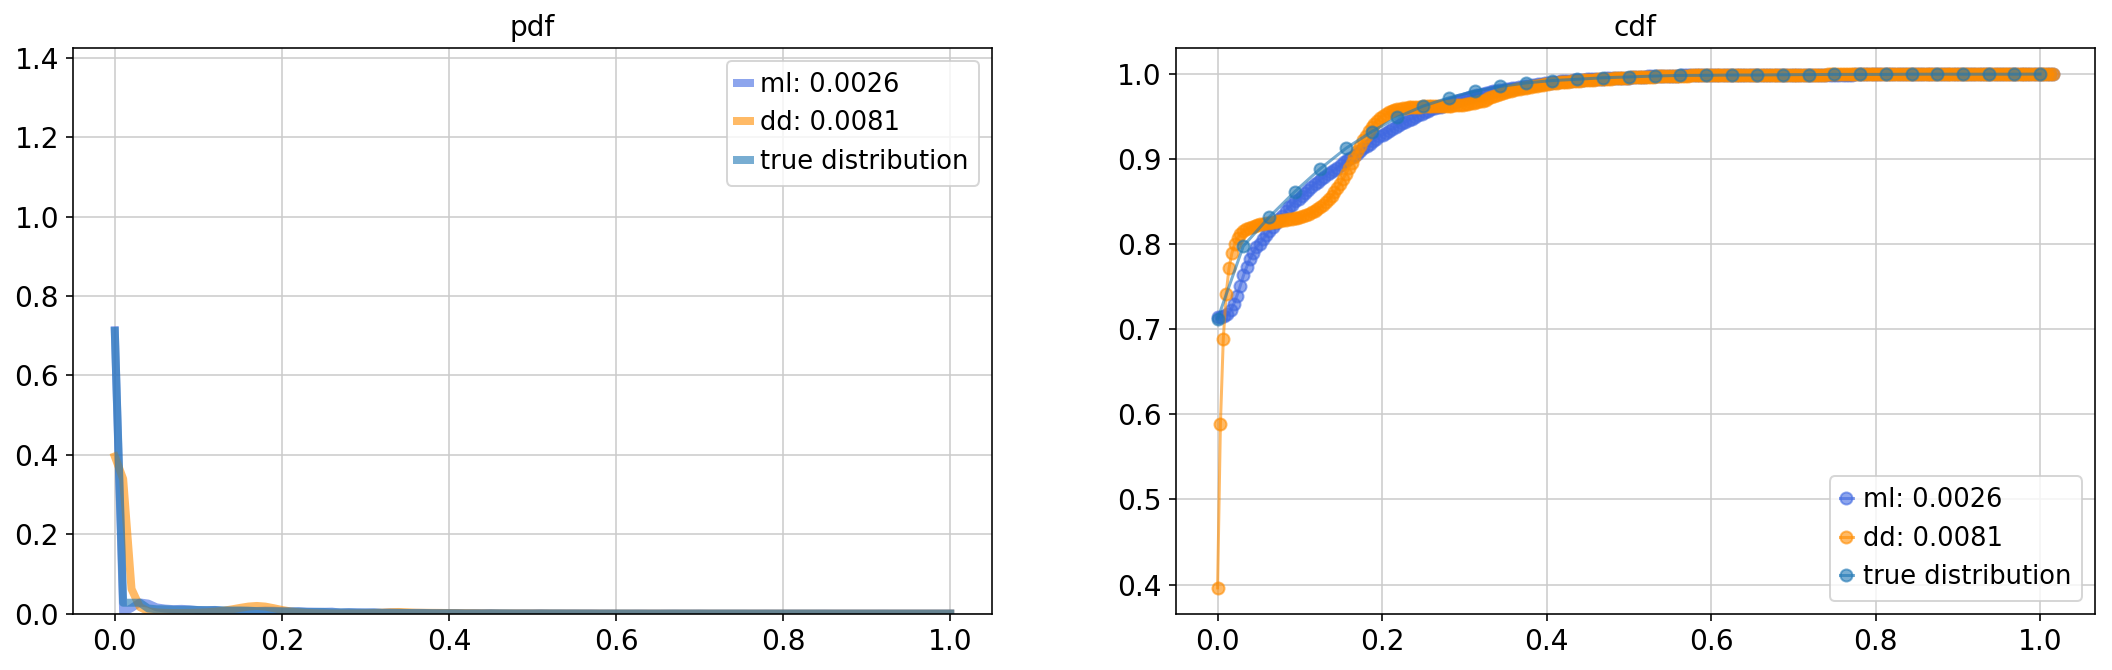



### N_r=2548, mean_cts=99, N_c=1000


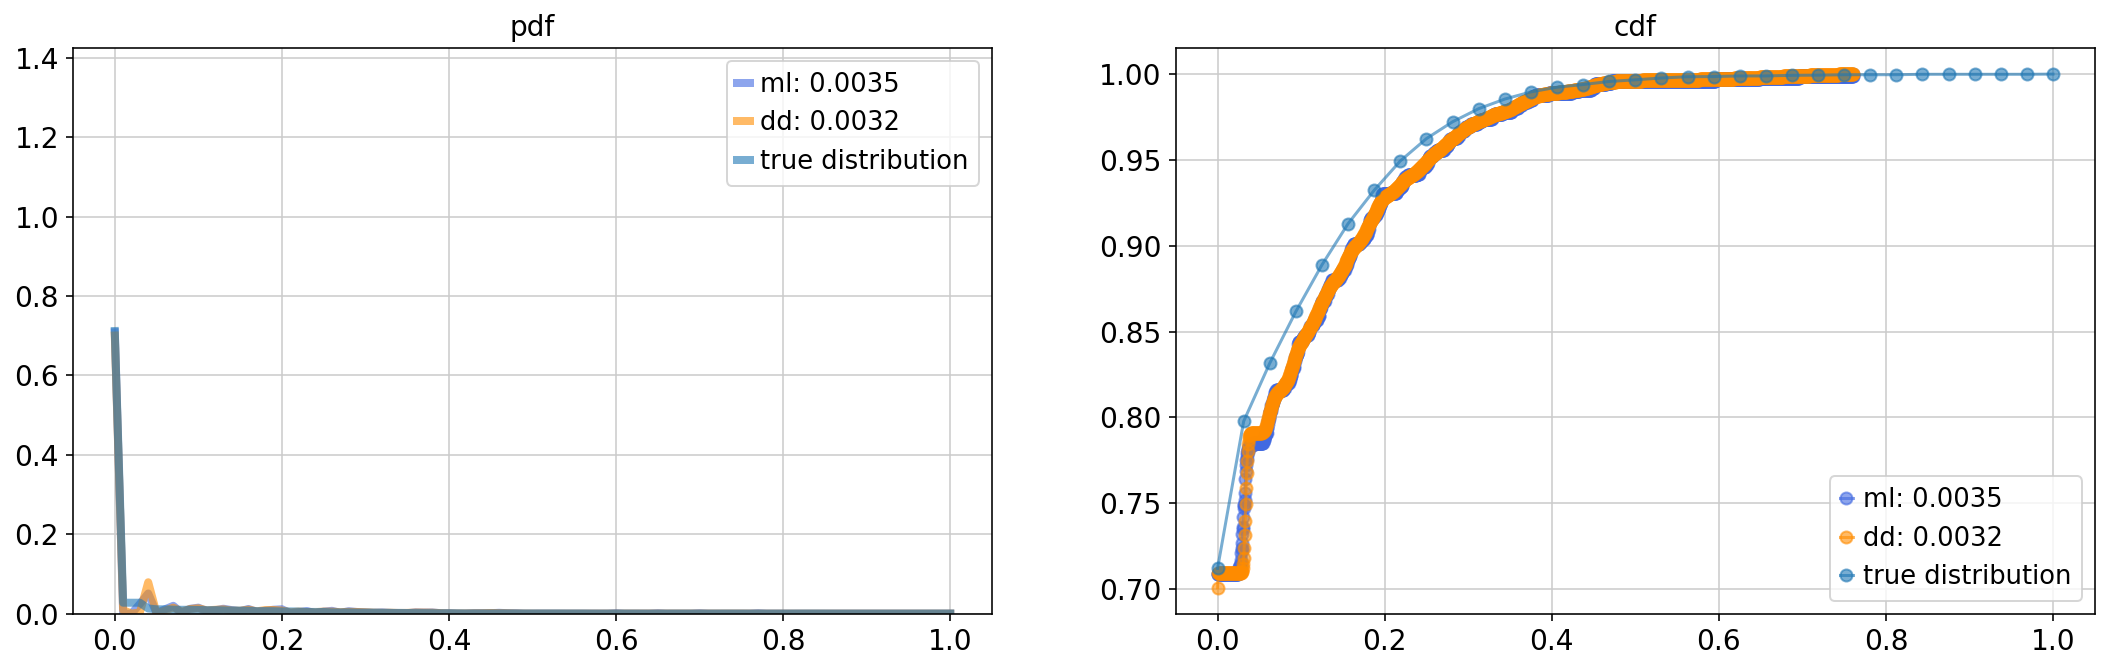

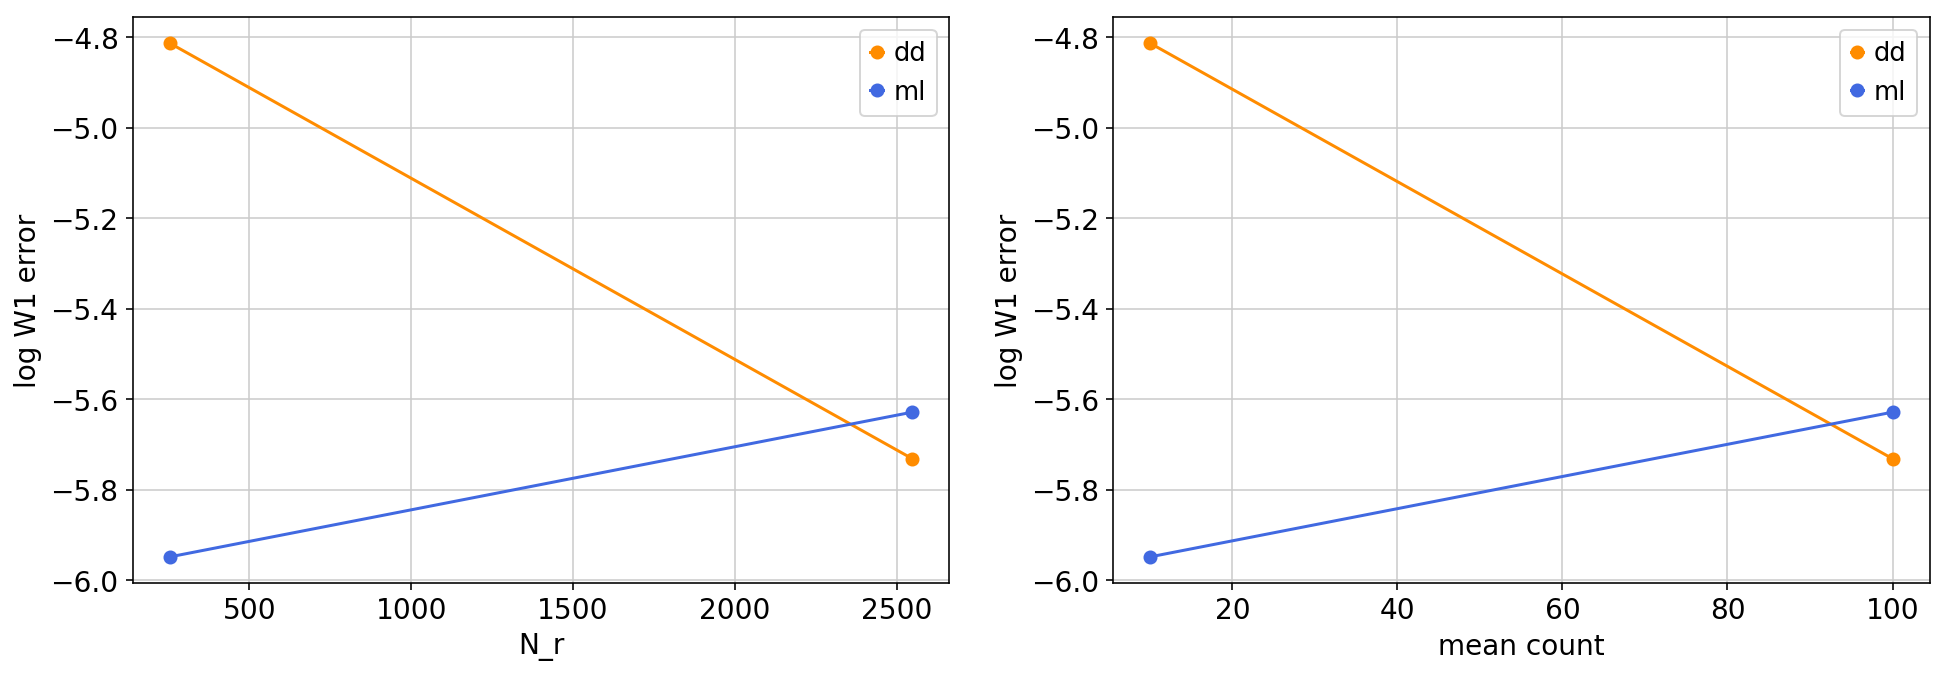

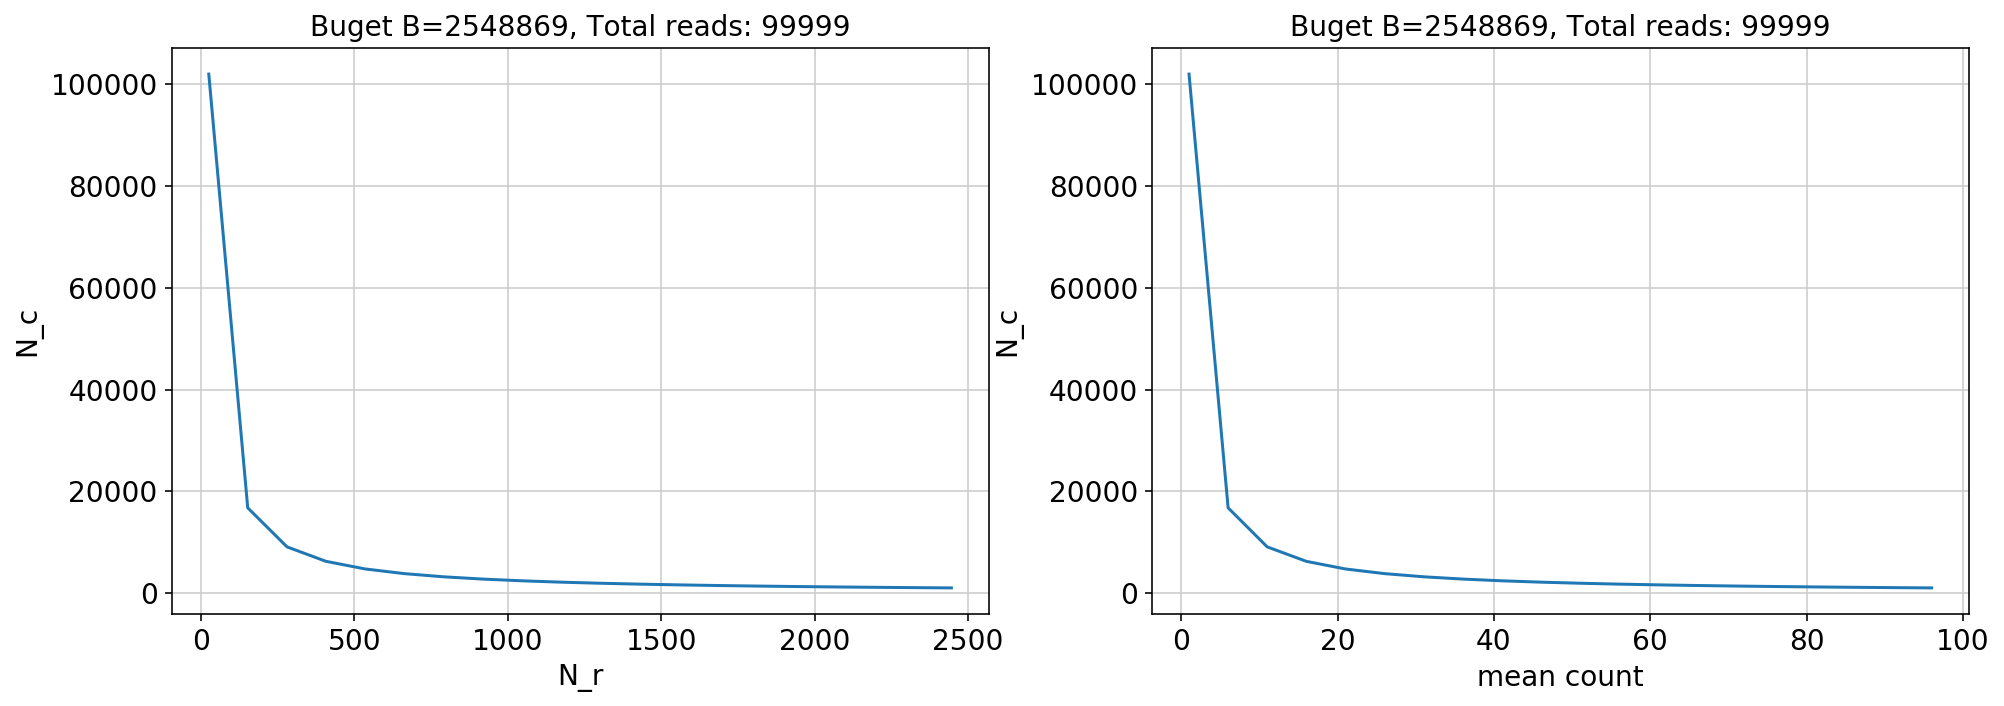

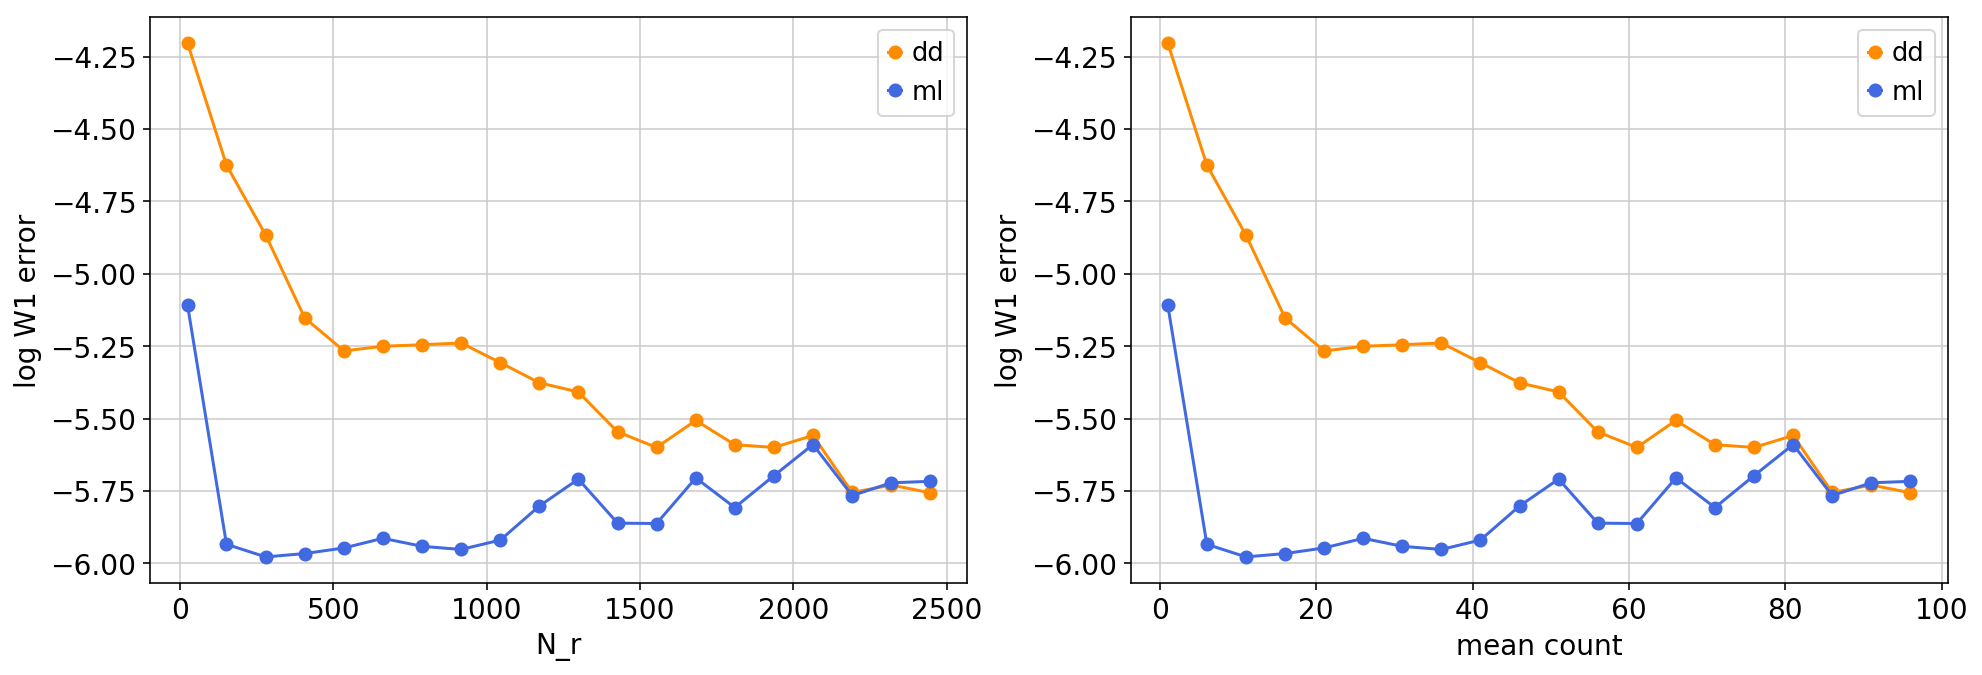

-------------------------------------------------------------------------
FCN1
Average counts per cell = 2.1746808256771266


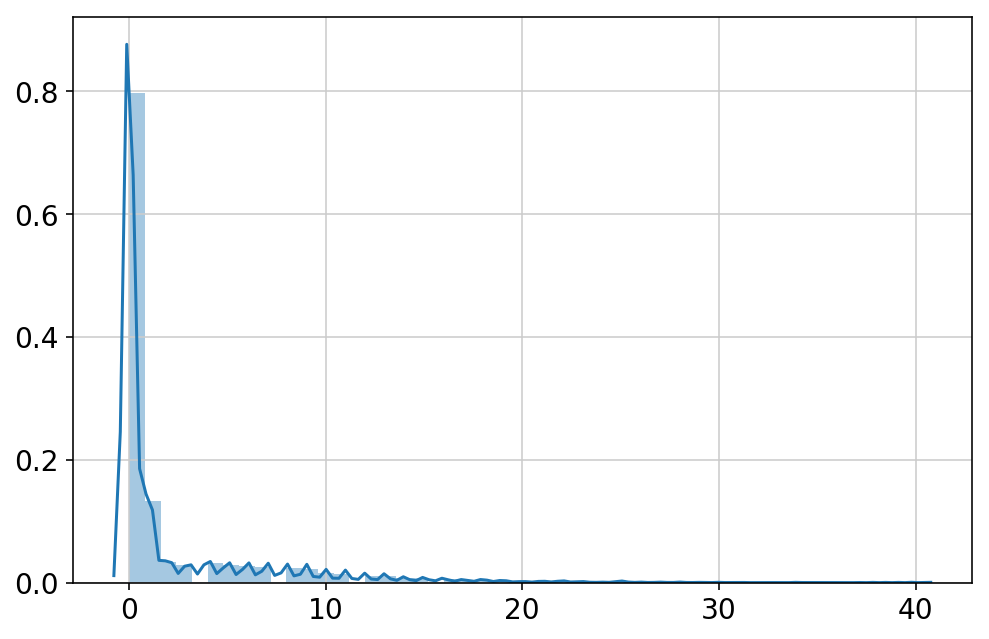

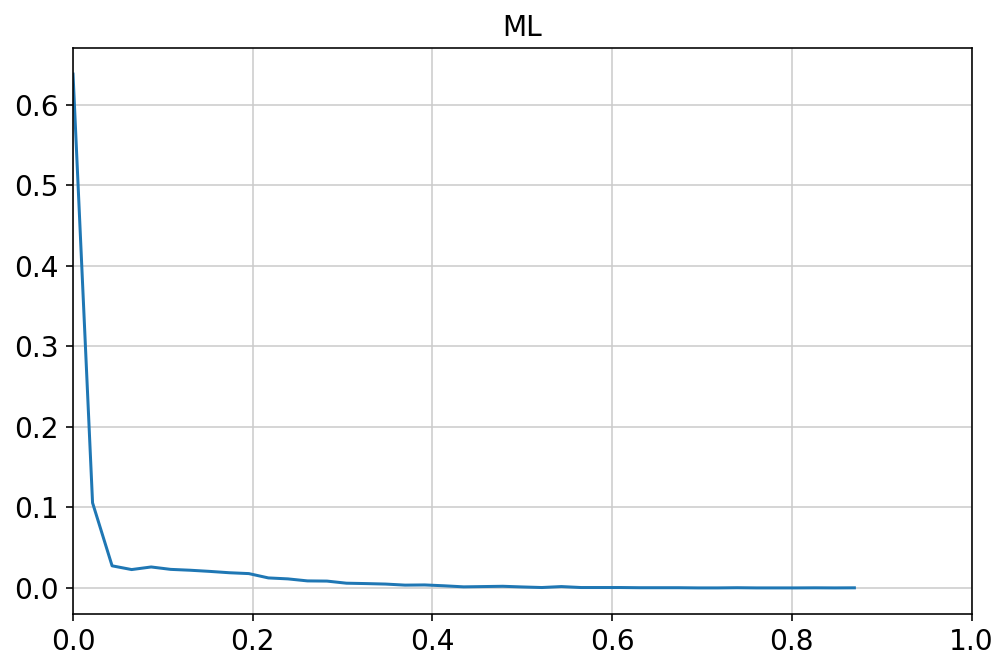

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 46

### debug: proportion separation ### start ###


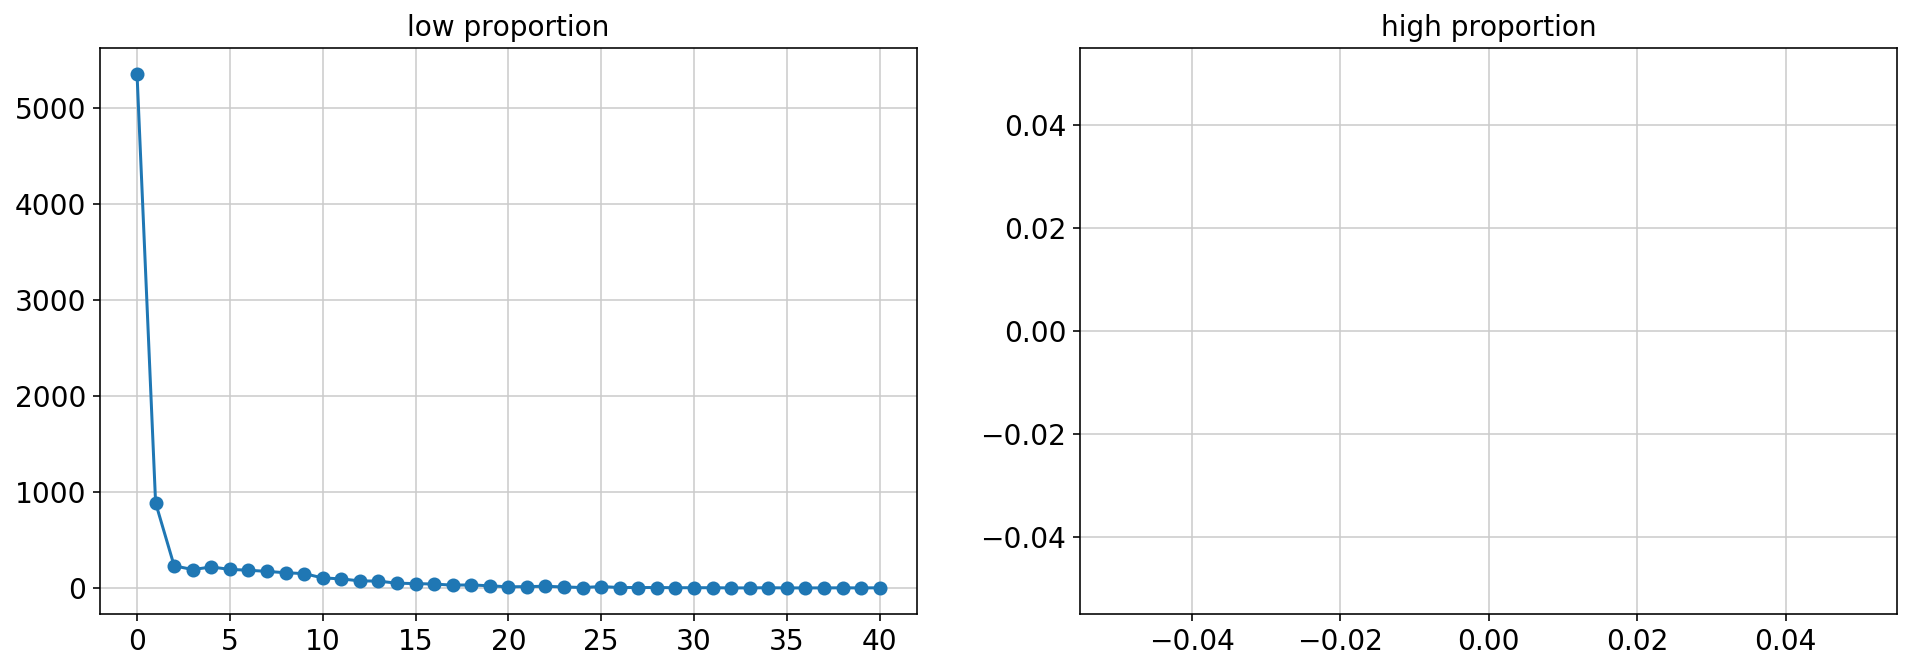

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.6146286635200227
-0.04993567070954441
-0.1993855049953197
-0.23702433171735038
-0.1283832684606523
Close-form gradients
[ 0.61462869 -0.04993565 -0.19938549 -0.23702431 -0.12838324]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.6733090470738372, reg:0.015399086393417883
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  9.76926625  -0.30661659  20.50685764 -31.93707317   1.96677635]
gamma:46


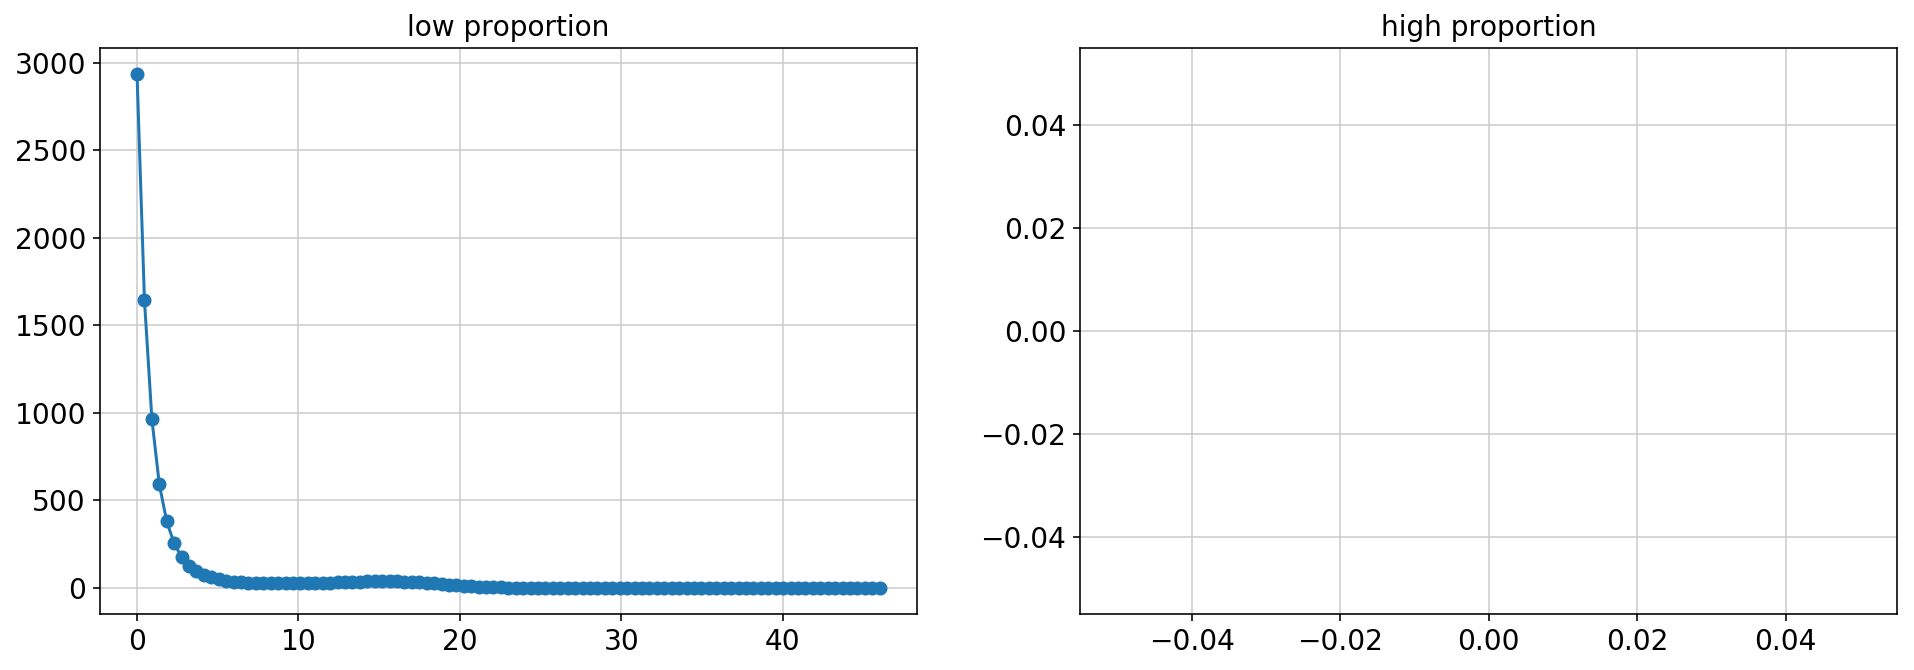

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:46.0


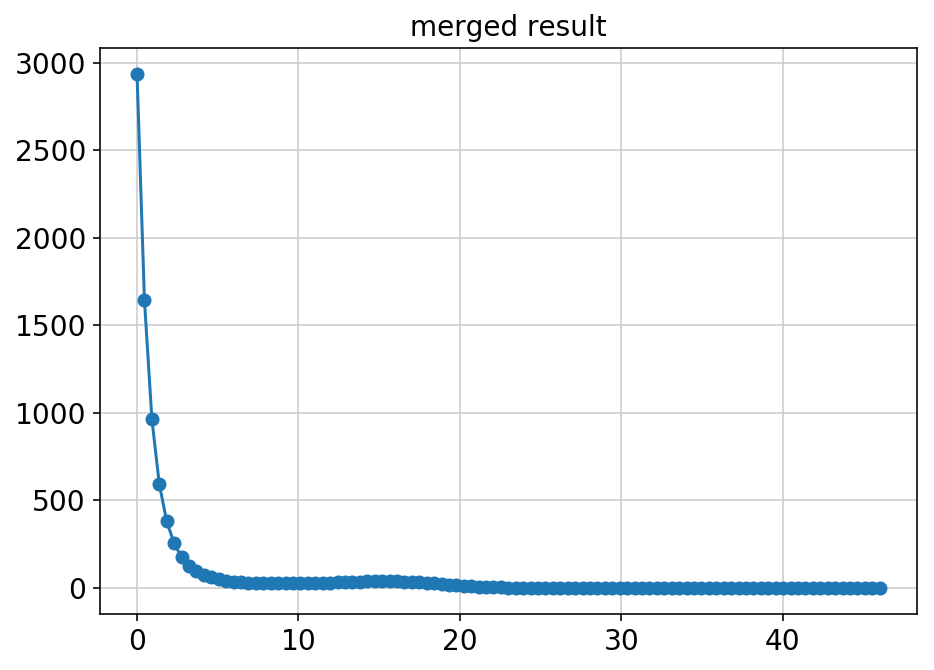

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 19.24%
>0.1: 12.86%
>0.15: 10.59%
>0.2: 9.026%
>0.25: 7.387%
>0.3: 5.387%
>0.35: 3.575%
>0.4: 1.232%


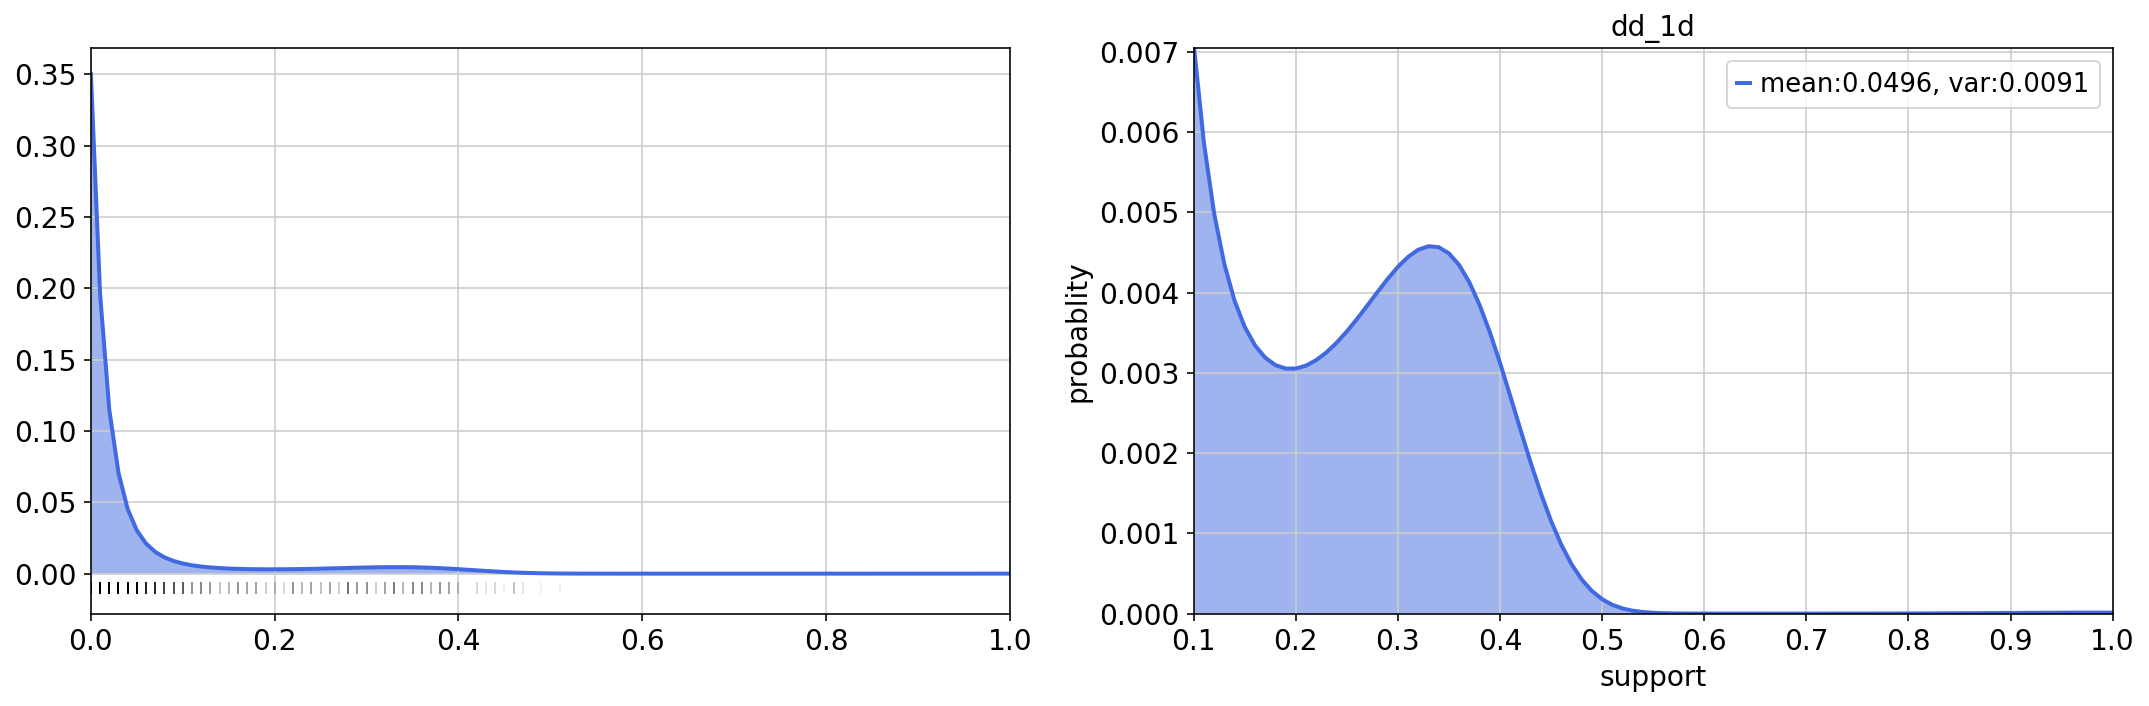

gamma: 46.0
### N_r=183, mean_cts=9, N_c=10000


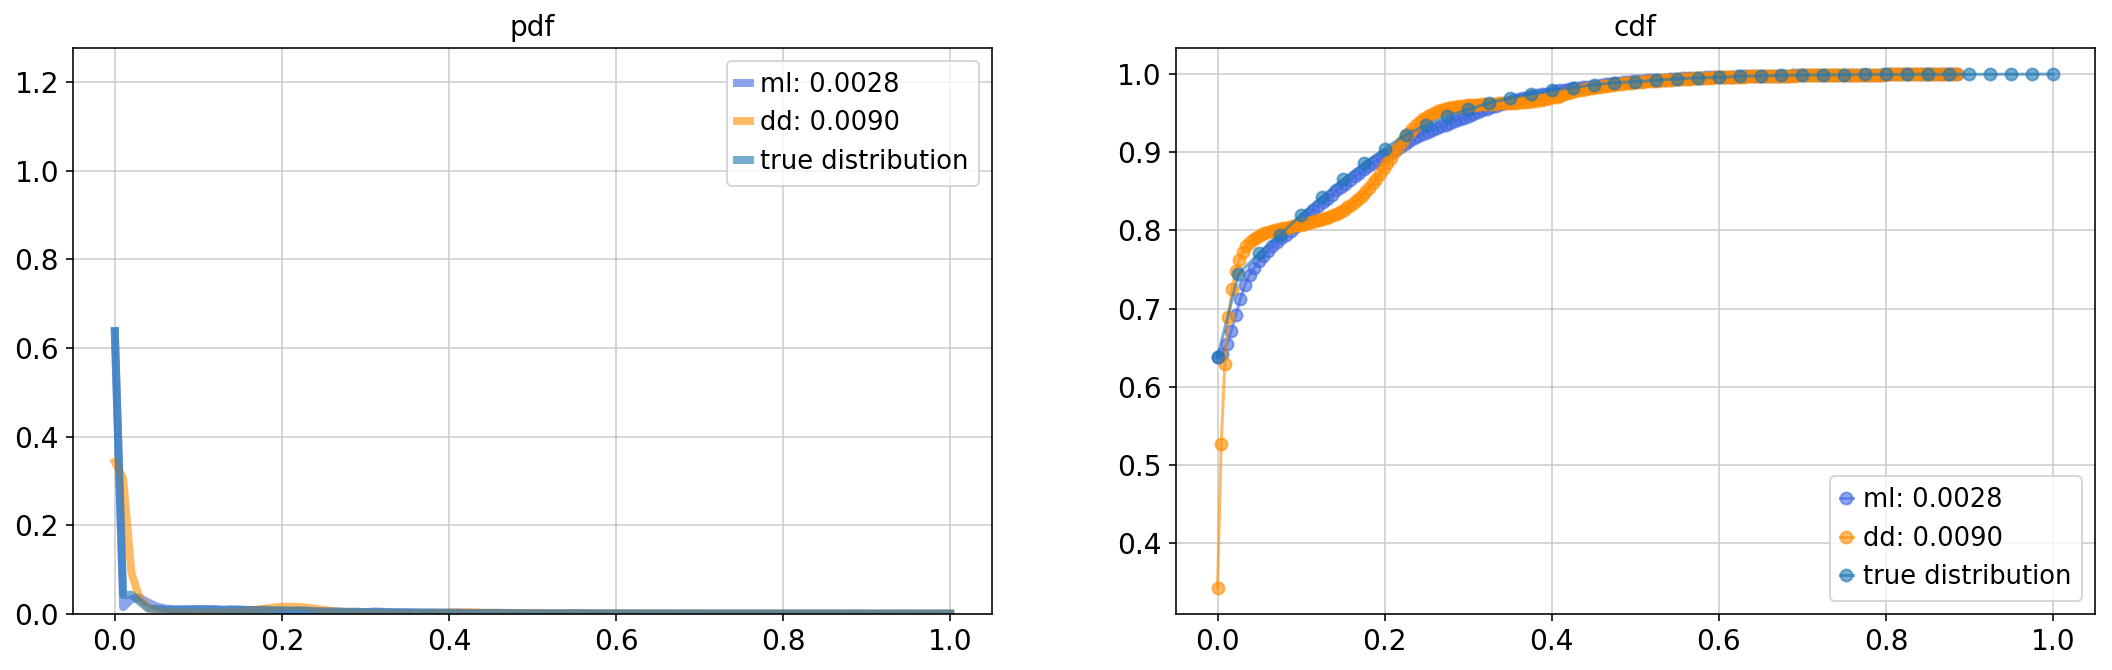



### N_r=1839, mean_cts=99, N_c=1000


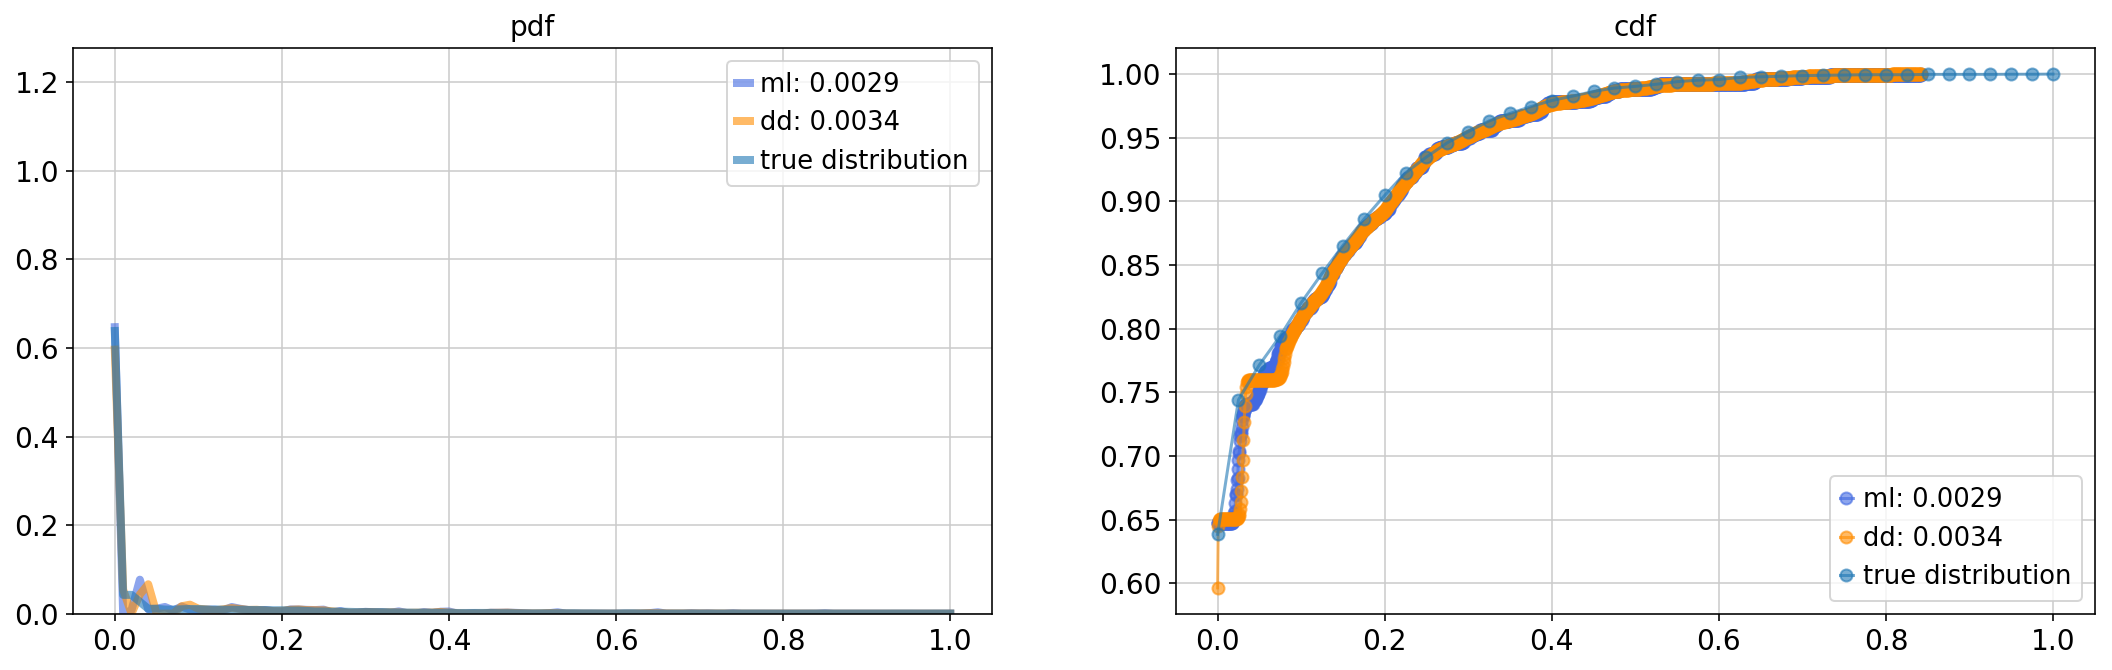

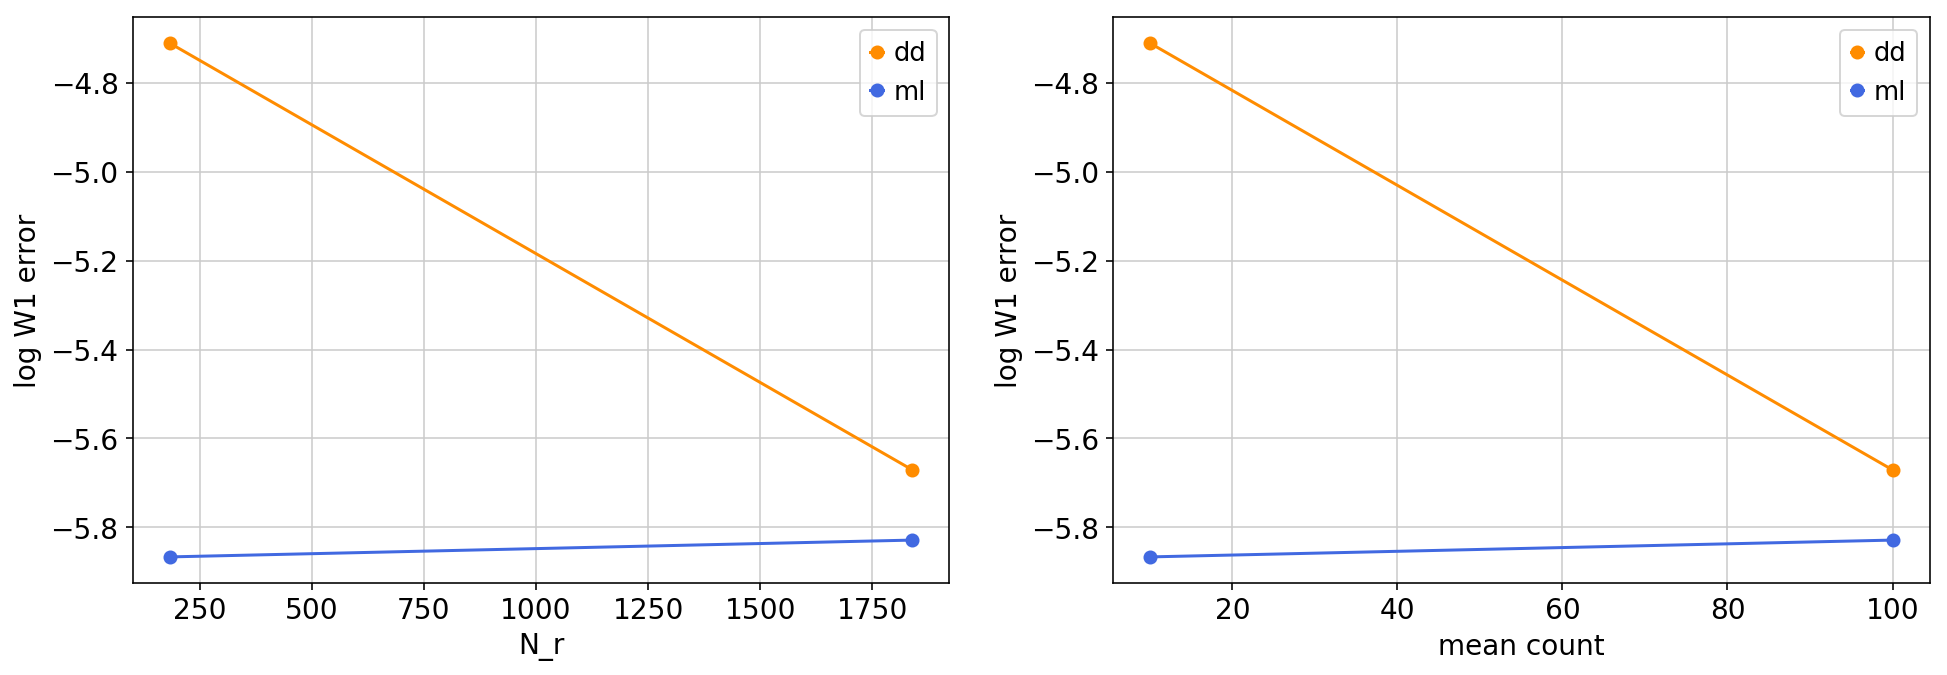

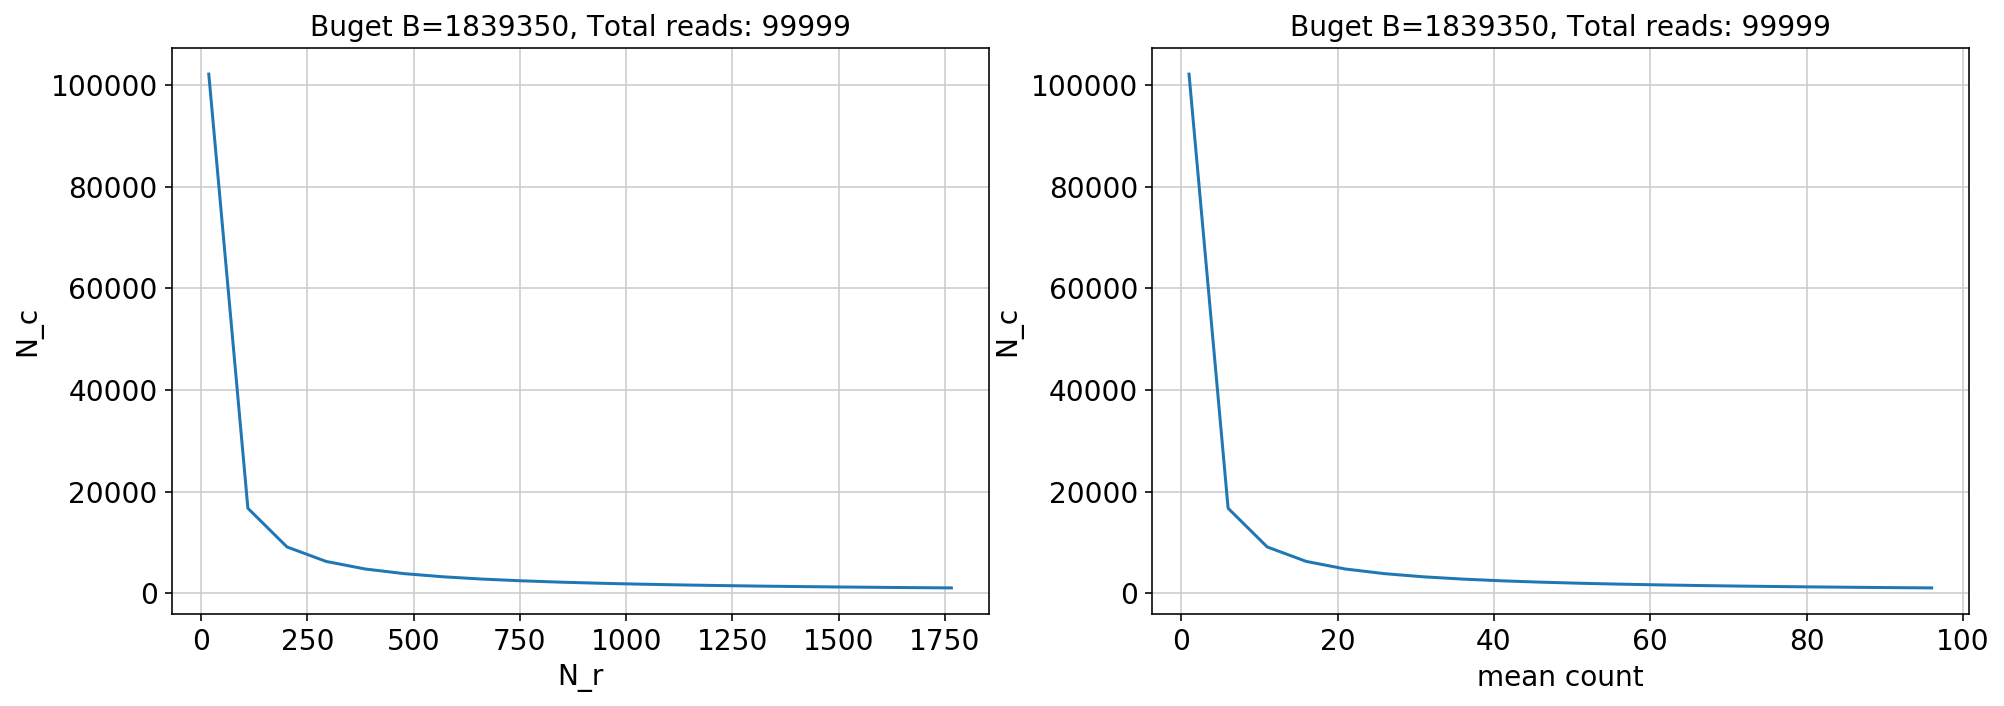

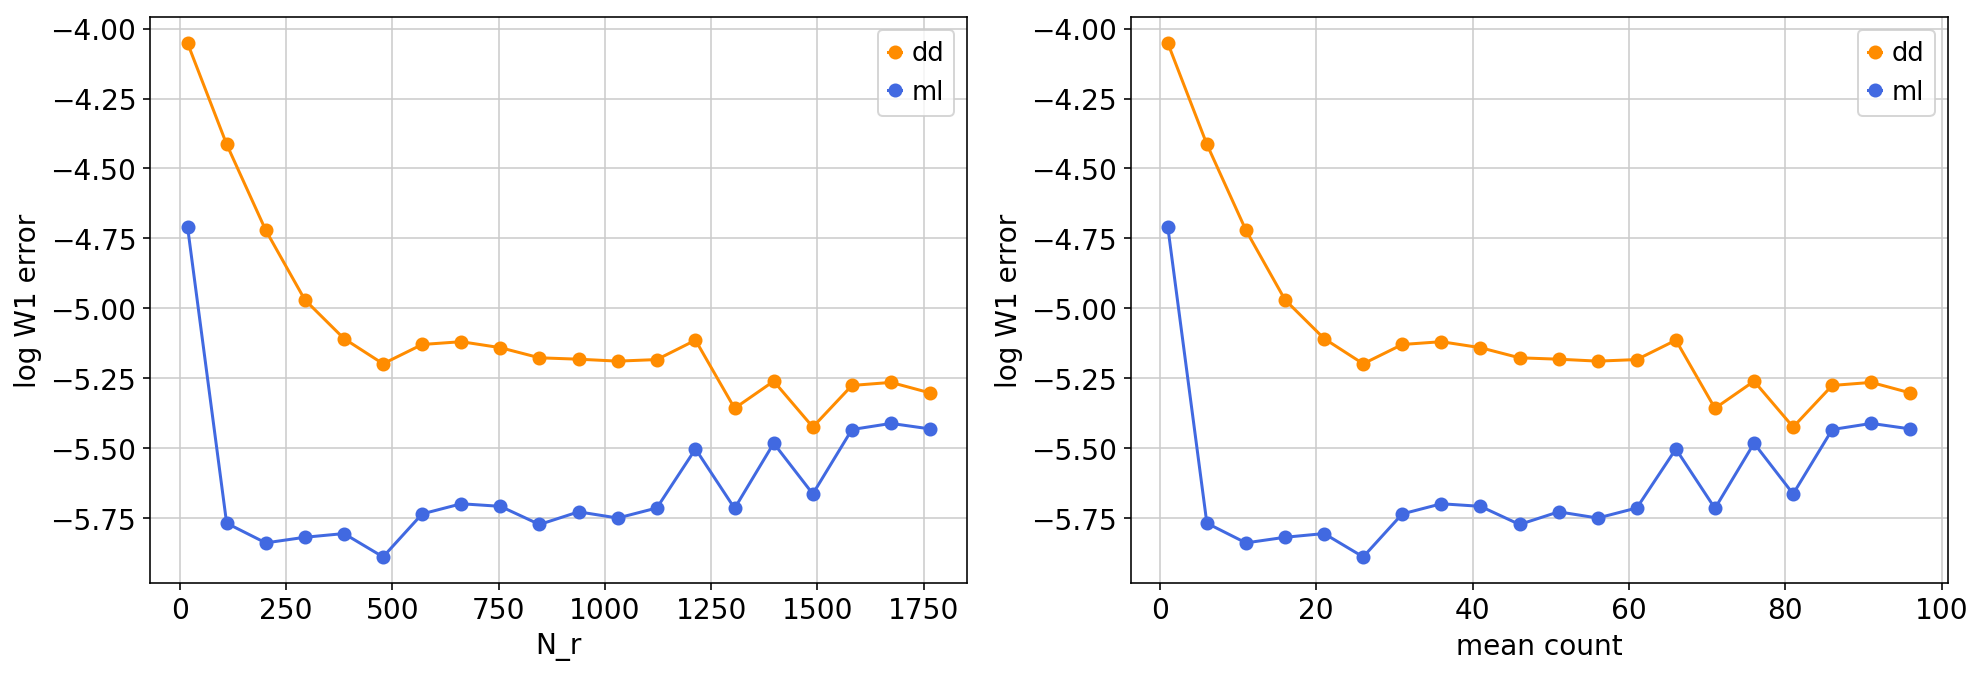

-------------------------------------------------------------------------
CD14
Average counts per cell = 0.6564849063357595


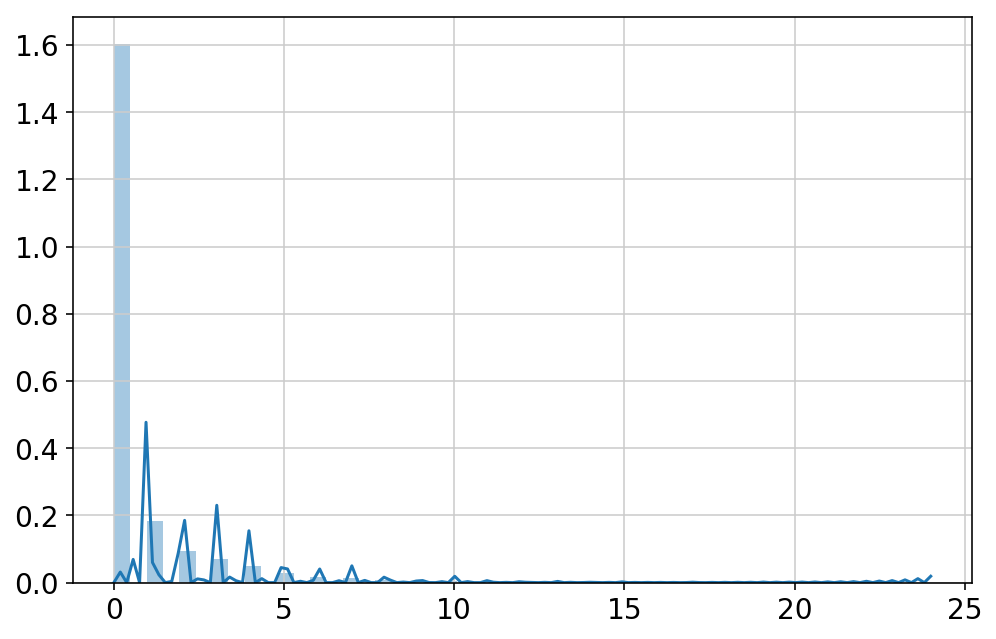

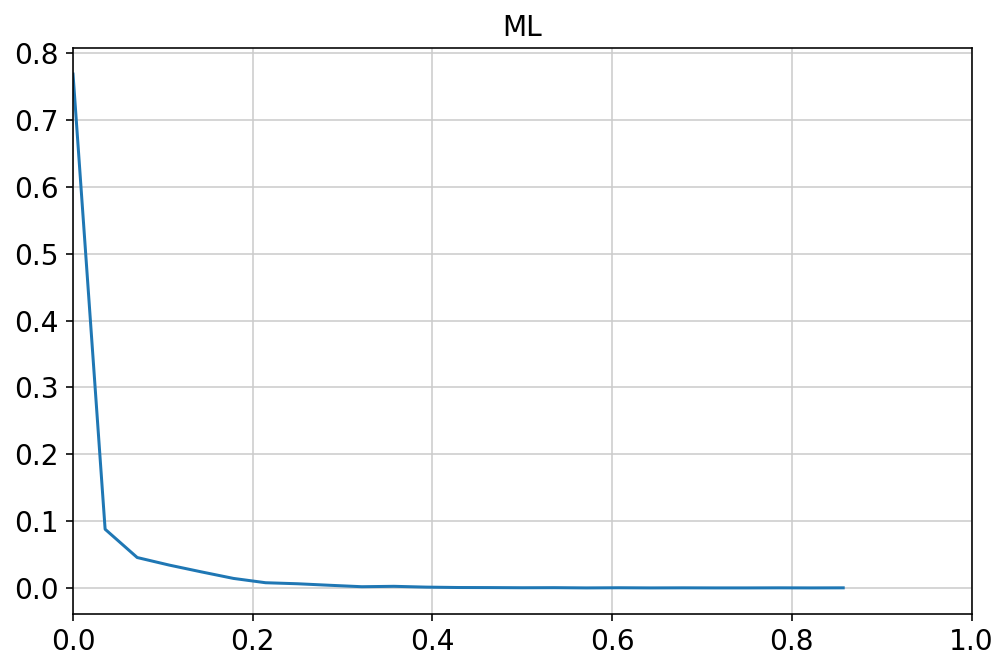

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 28

### debug: proportion separation ### start ###


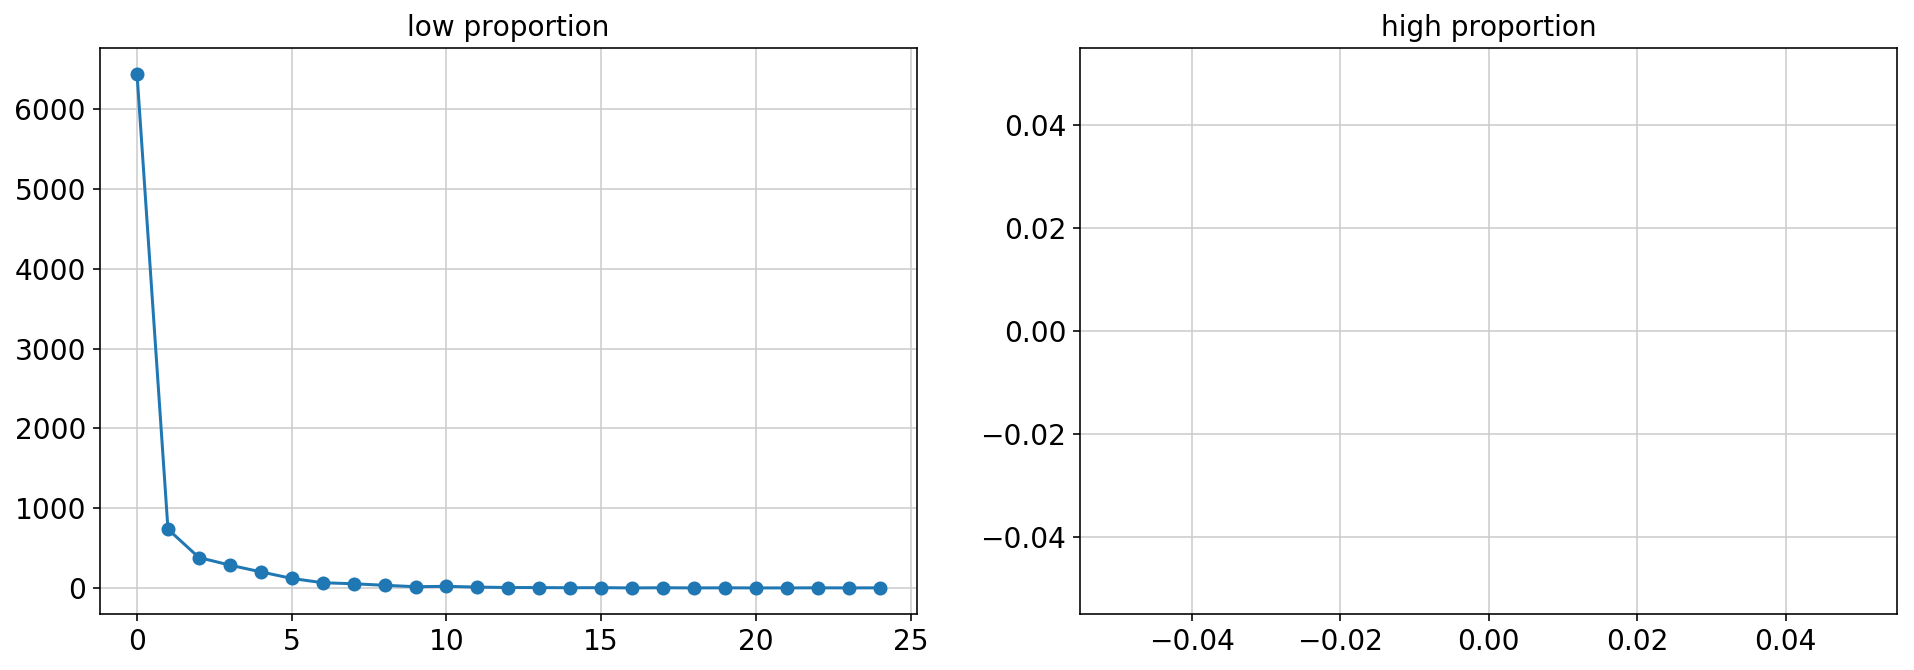

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.6246264008247238
-0.03920077862318294
-0.21411146455818653
-0.24280908661467038
-0.12860517006885175
Close-form gradients
[ 0.62462642 -0.03920076 -0.21411145 -0.24280906 -0.12860514]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:1.0002654757861635, reg:0.005210994935558406
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [  8.56935838  -1.93382834  11.79889044 -17.4268979   -1.00762703]
gamma:28


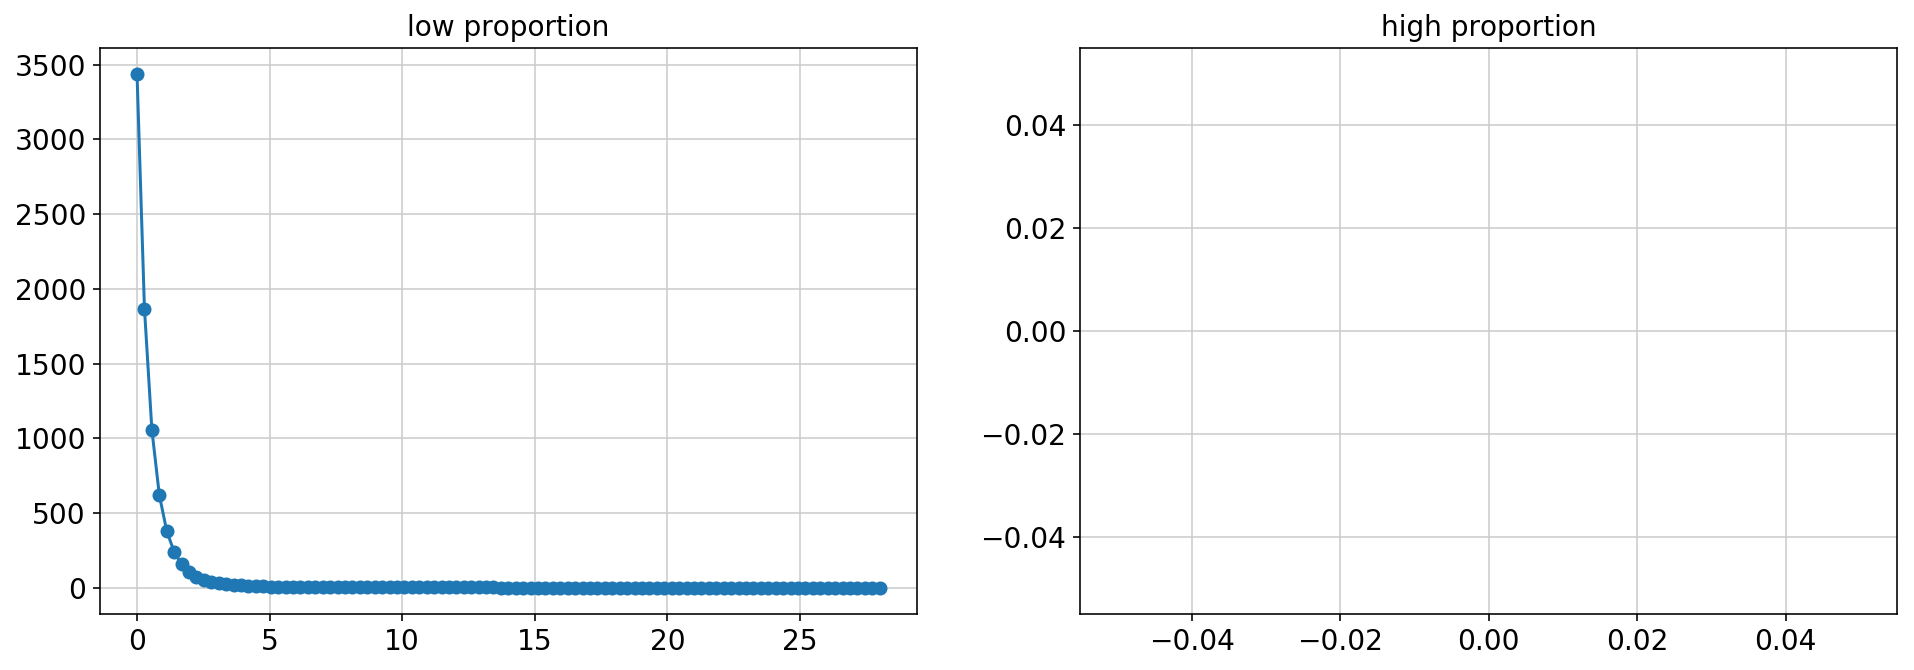

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:28.0


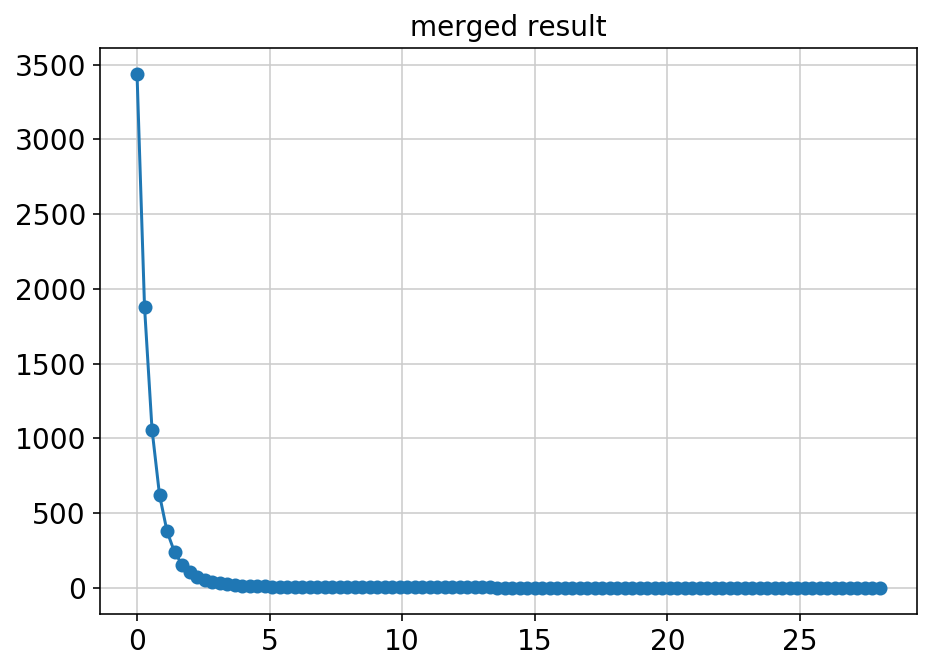

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 12.00%
>0.1: 4.496%
>0.15: 2.945%
>0.2: 2.305%
>0.25: 1.870%
>0.3: 1.466%
>0.35: 1.041%
>0.4: 0.615%


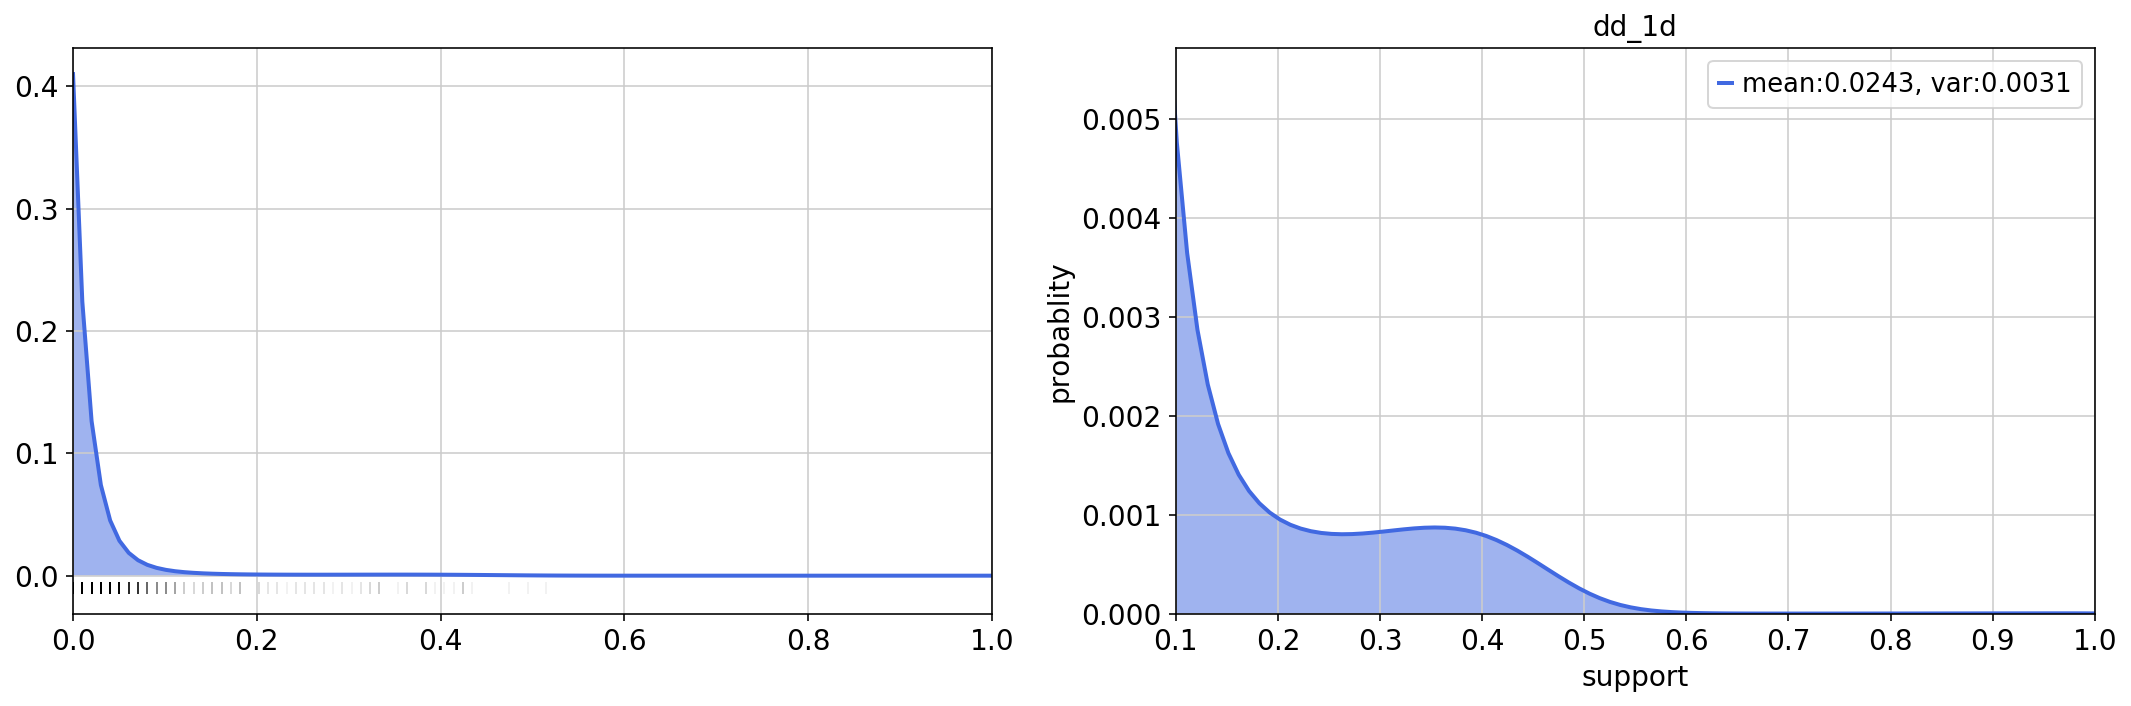

gamma: 28.0
### N_r=365, mean_cts=9, N_c=10000


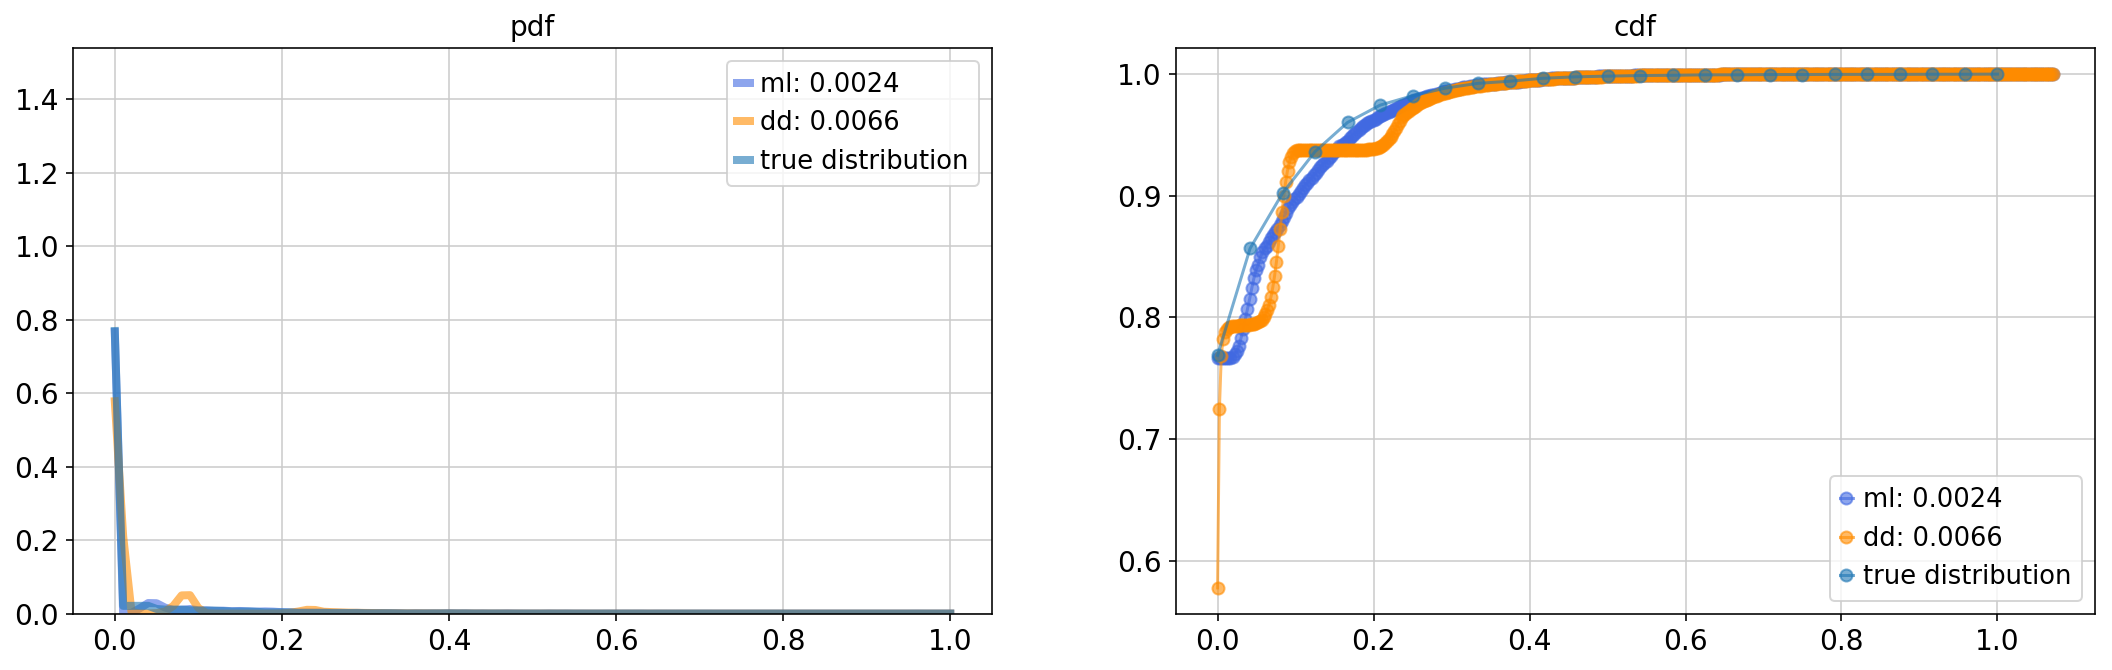



### N_r=3655, mean_cts=99, N_c=1000


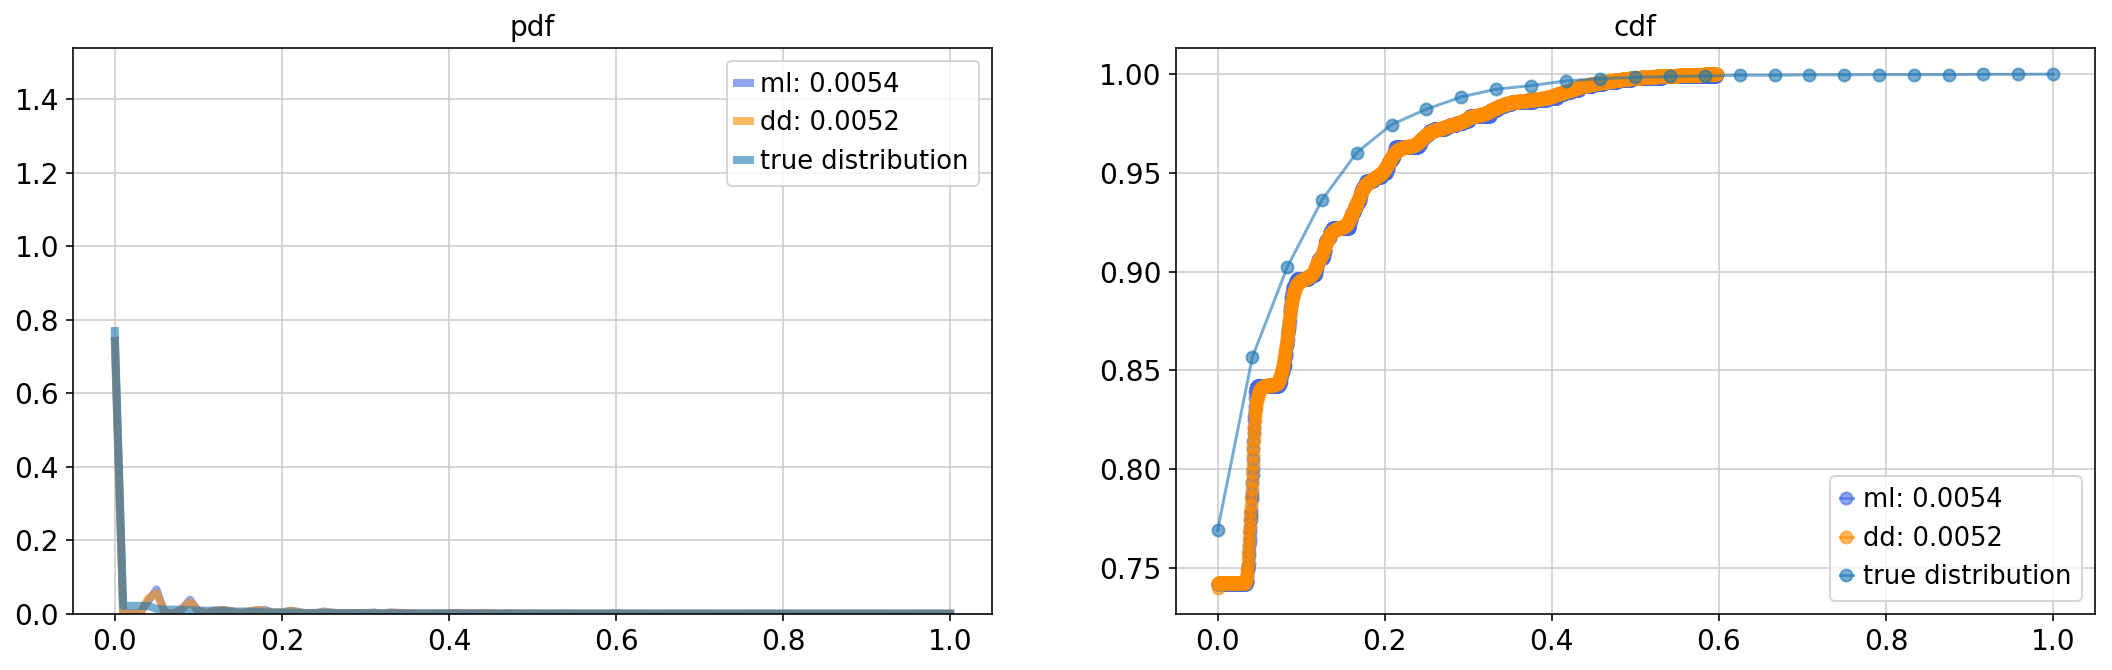

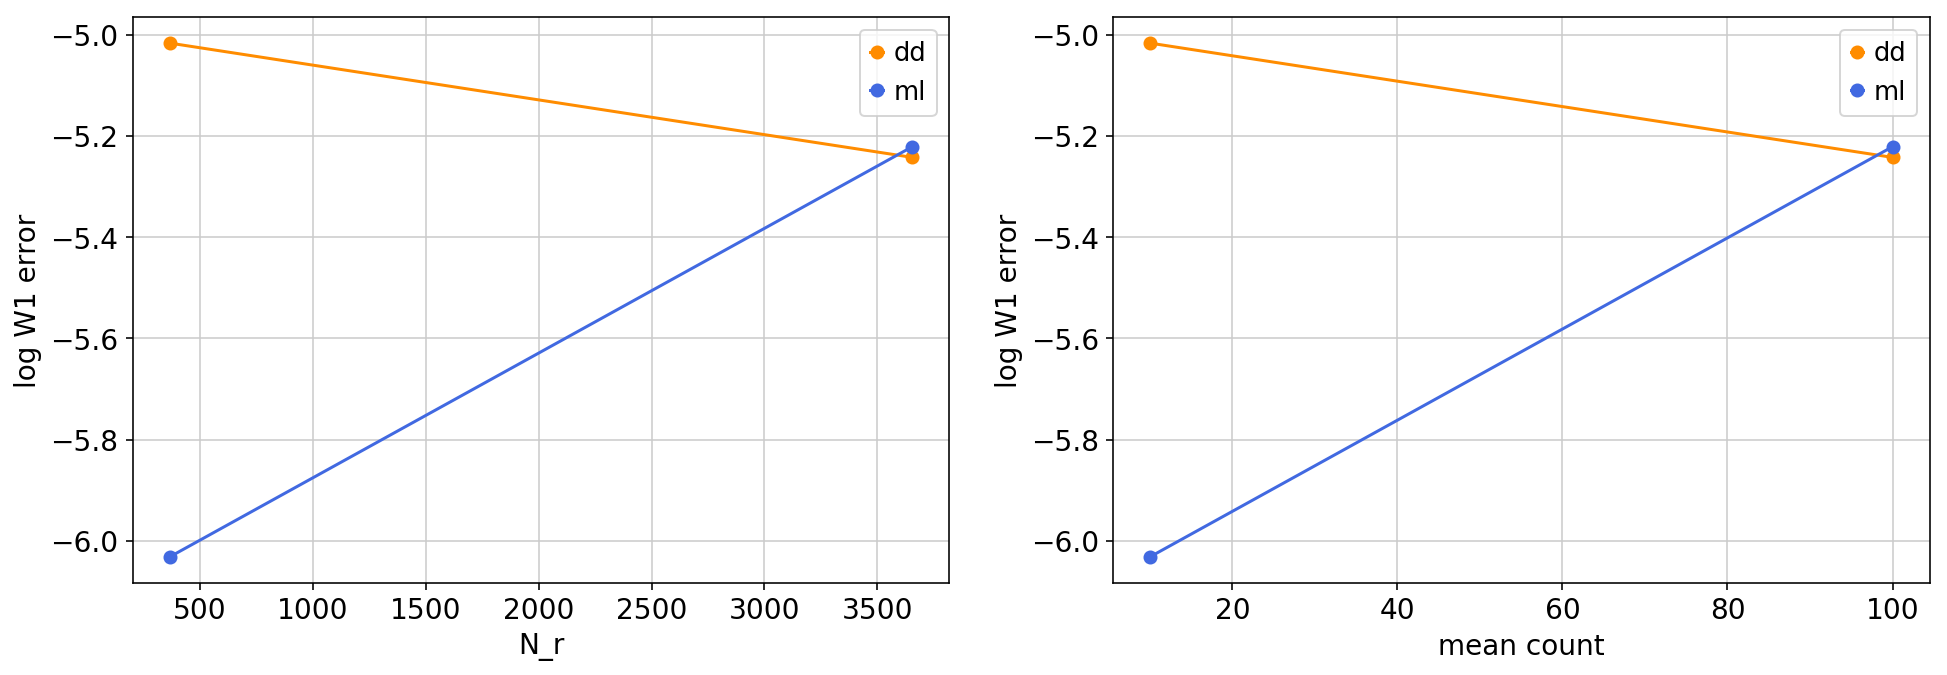

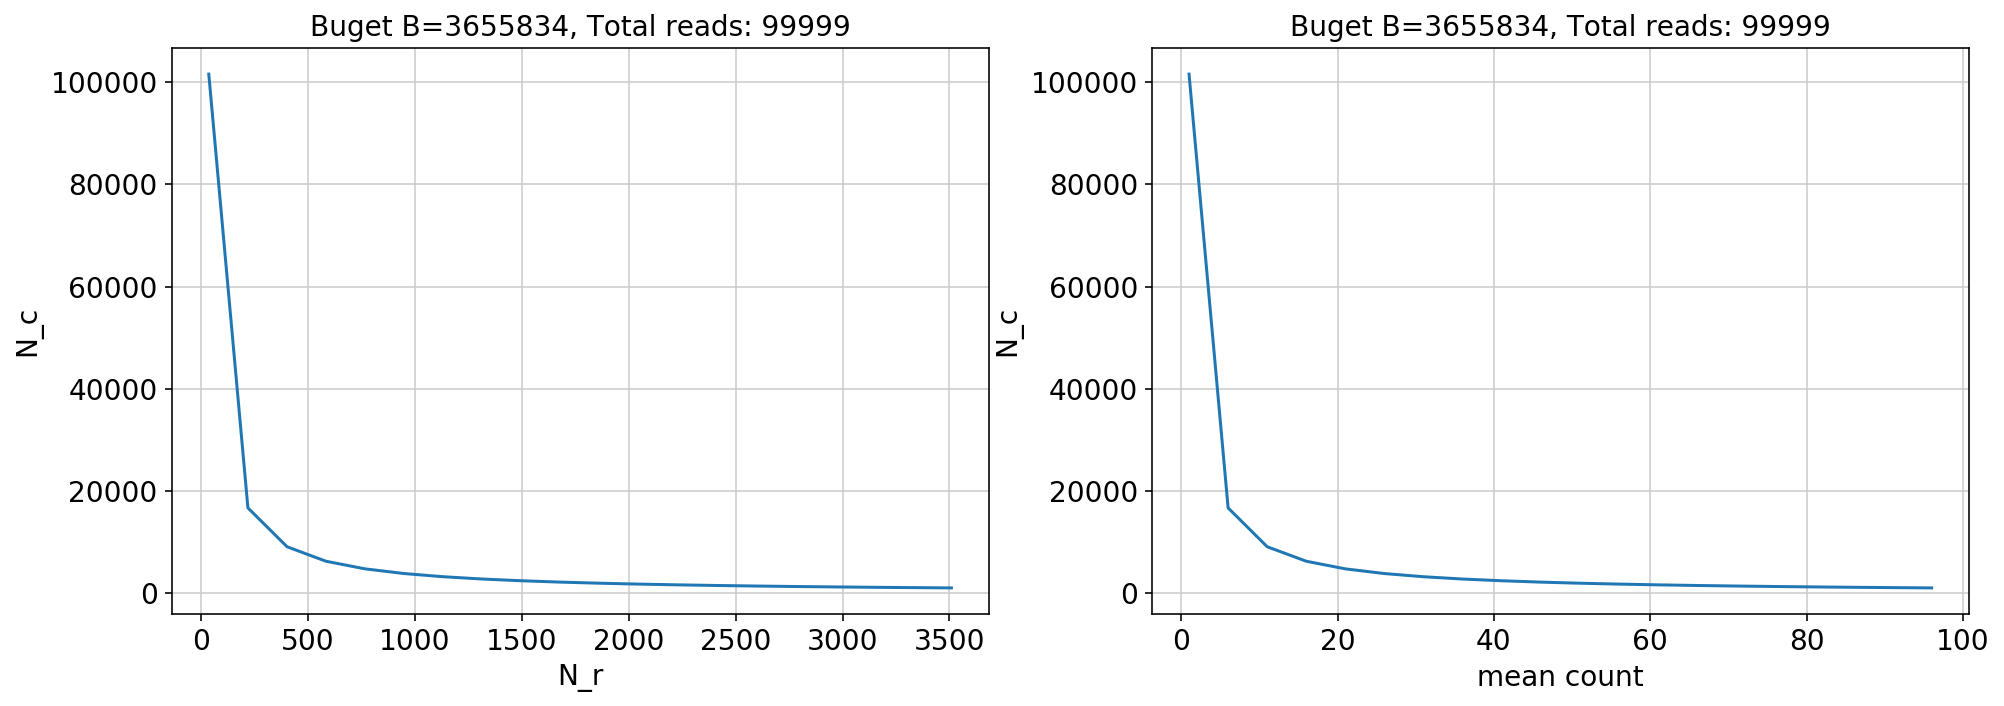

/home/martin/single_cell_eb/sc_deconv.py:206: RuntimeWarning: overflow encountered in exp
  P_X  = np.exp(Q.dot(alpha))
/home/martin/single_cell_eb/sc_deconv.py:207: RuntimeWarning: invalid value encountered in true_divide
  P_X /= np.sum(P_X)
/home/martin/single_cell_eb/sc_deconv.py:206: RuntimeWarning: overflow encountered in exp
  P_X  = np.exp(Q.dot(alpha))
/home/martin/single_cell_eb/sc_deconv.py:207: RuntimeWarning: invalid value encountered in true_divide
  P_X /= np.sum(P_X)
/home/martin/single_cell_eb/sc_deconv.py:206: RuntimeWarning: overflow encountered in exp
  P_X  = np.exp(Q.dot(alpha))
/home/martin/single_cell_eb/sc_deconv.py:207: RuntimeWarning: invalid value encountered in true_divide
  P_X /= np.sum(P_X)
/home/martin/single_cell_eb/sc_deconv.py:253: RuntimeWarning: invalid value encountered in greater
  x1 = x1[p1>0]
/home/martin/single_cell_eb/sc_deconv.py:254: RuntimeWarning: invalid value encountered in greater
  p1 = p1[p1>0]
/home/martin/single_cell_eb/sc_deconv.

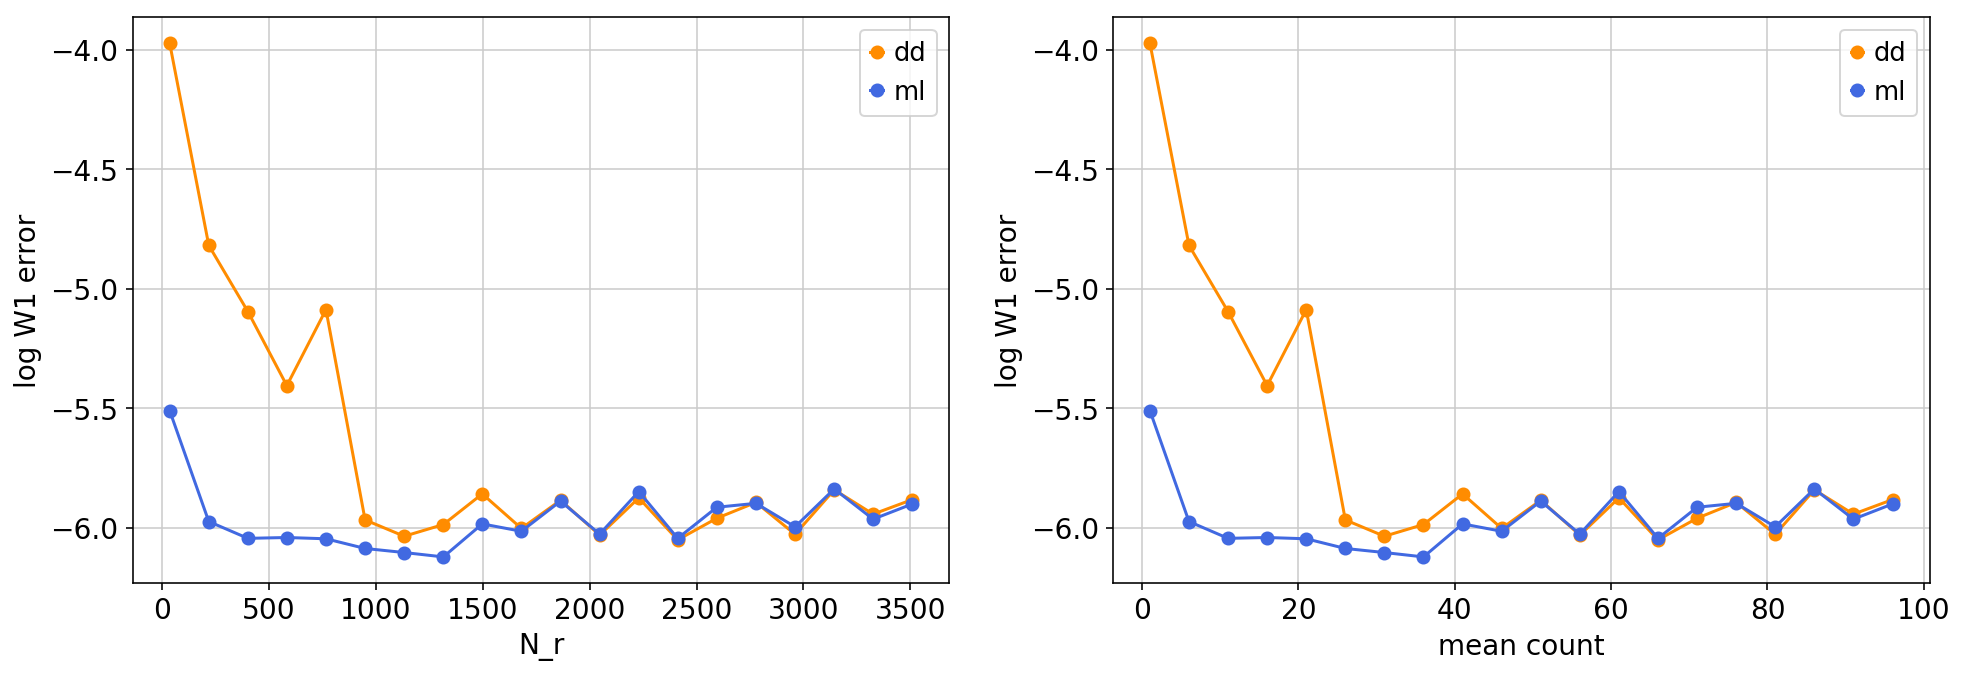

-------------------------------------------------------------------------
GZMB
Average counts per cell = 0.46116215248777


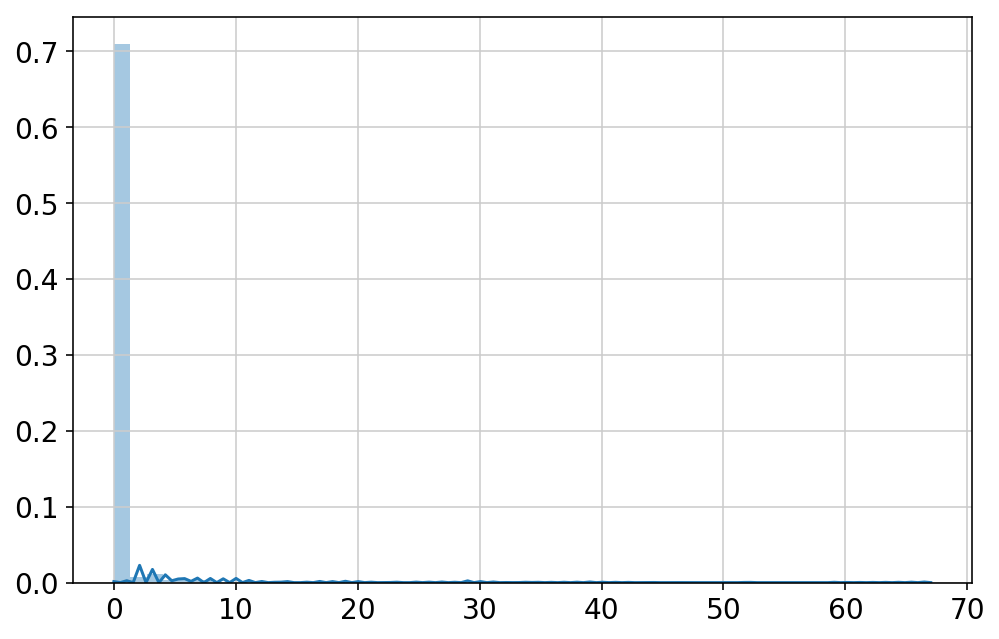

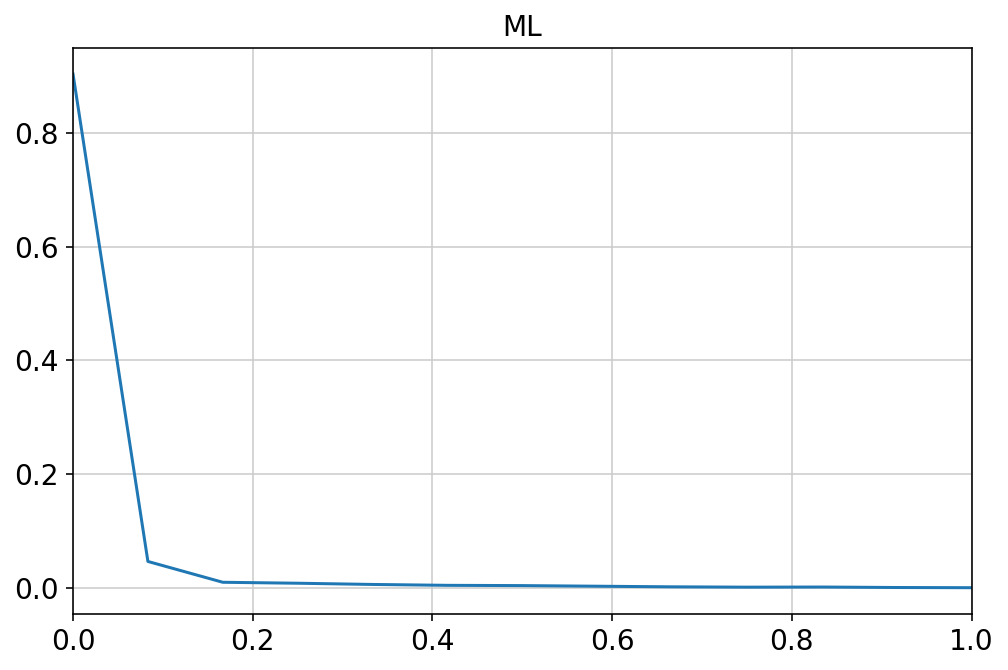

n_degree: 5, c_res: 2, c_reg: 1e-05, gamma: 12

### debug: proportion separation ### start ###


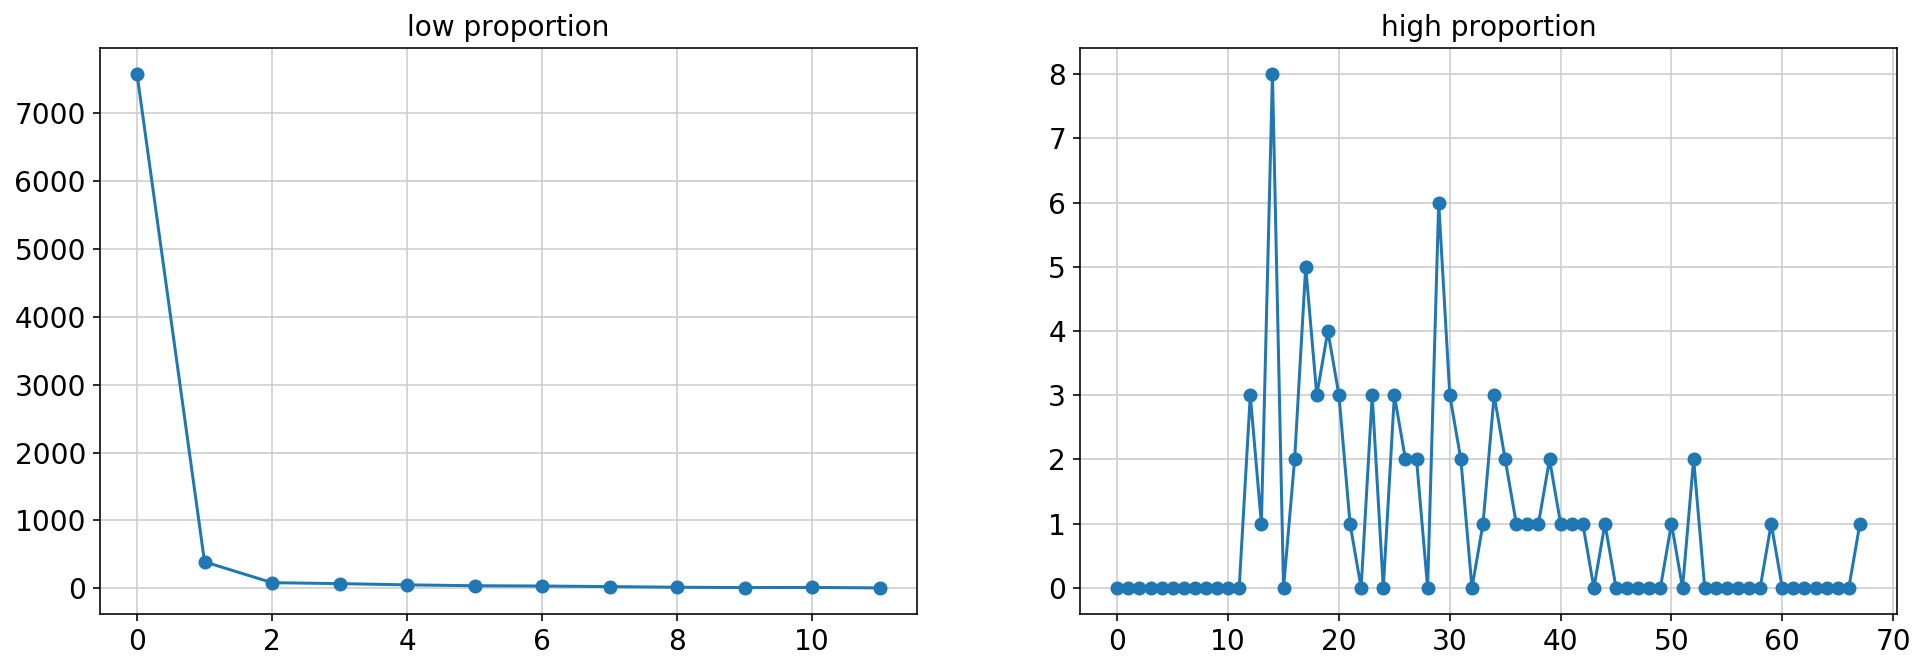

### debug: proportion separation ### end ###

### debug: proportion separation ### start ###
Numerical gradients
0.49525823397900126
0.043356185308596196
-0.180507599534252
-0.23188409592478365
-0.1263227846770576
Close-form gradients
[ 0.49525823  0.04335619 -0.18050759 -0.23188407 -0.12632276]
### debug: proportion separation ### end ###

### debug: optimization ### start ###
c_reg 1e-05
-l:0.4506250857144259, reg:0.004262469974735405
### debug: optimization ### end ###

### debug: dd result before merging ### start ###
alpha_hat:  [ 7.8900637  -9.7013283  13.46437058 -9.0430092  -2.61014008]
gamma:12


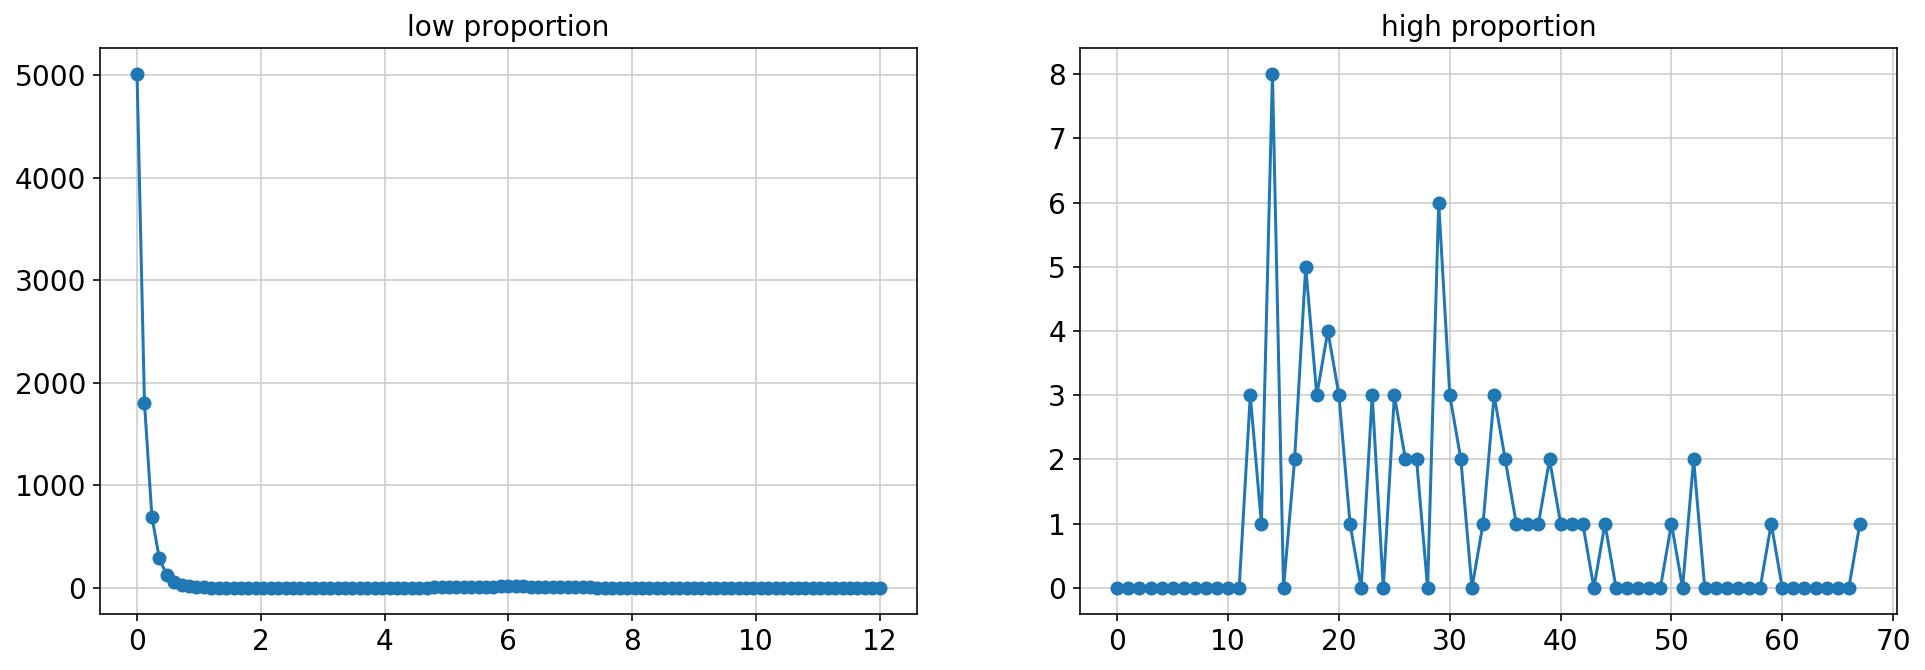

### debug: dd result before merging ### end ###

### debug: dd result after merging ### start ###
gamma:67.0


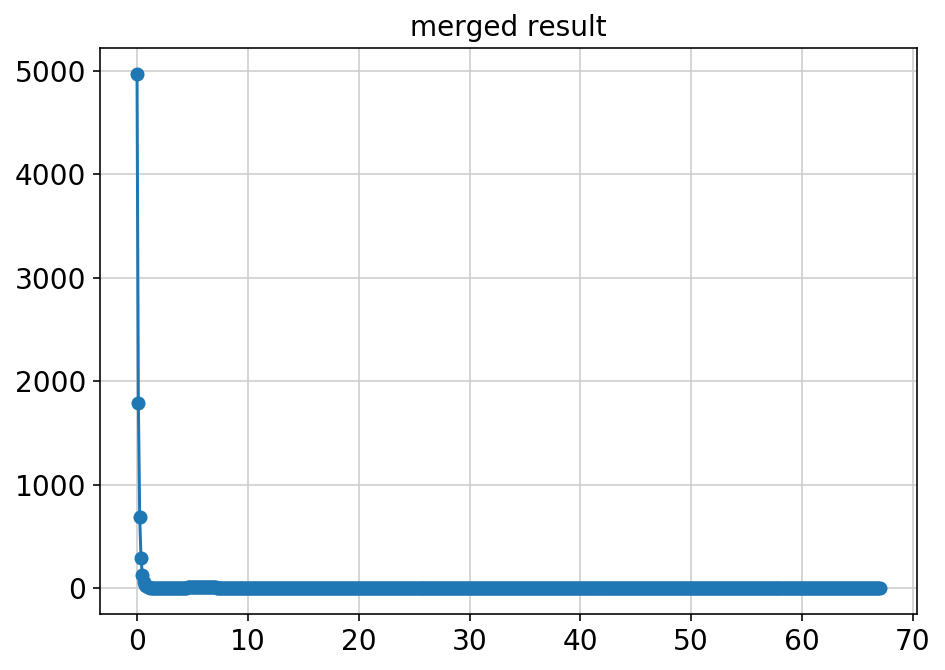

### debug: dd result after merging ### end ###

--- ccdf ---
>0.05: 3.831%
>0.1: 1.482%
>0.15: 0.902%
>0.2: 0.752%
>0.25: 0.625%
>0.3: 0.522%
>0.35: 0.440%
>0.4: 0.353%


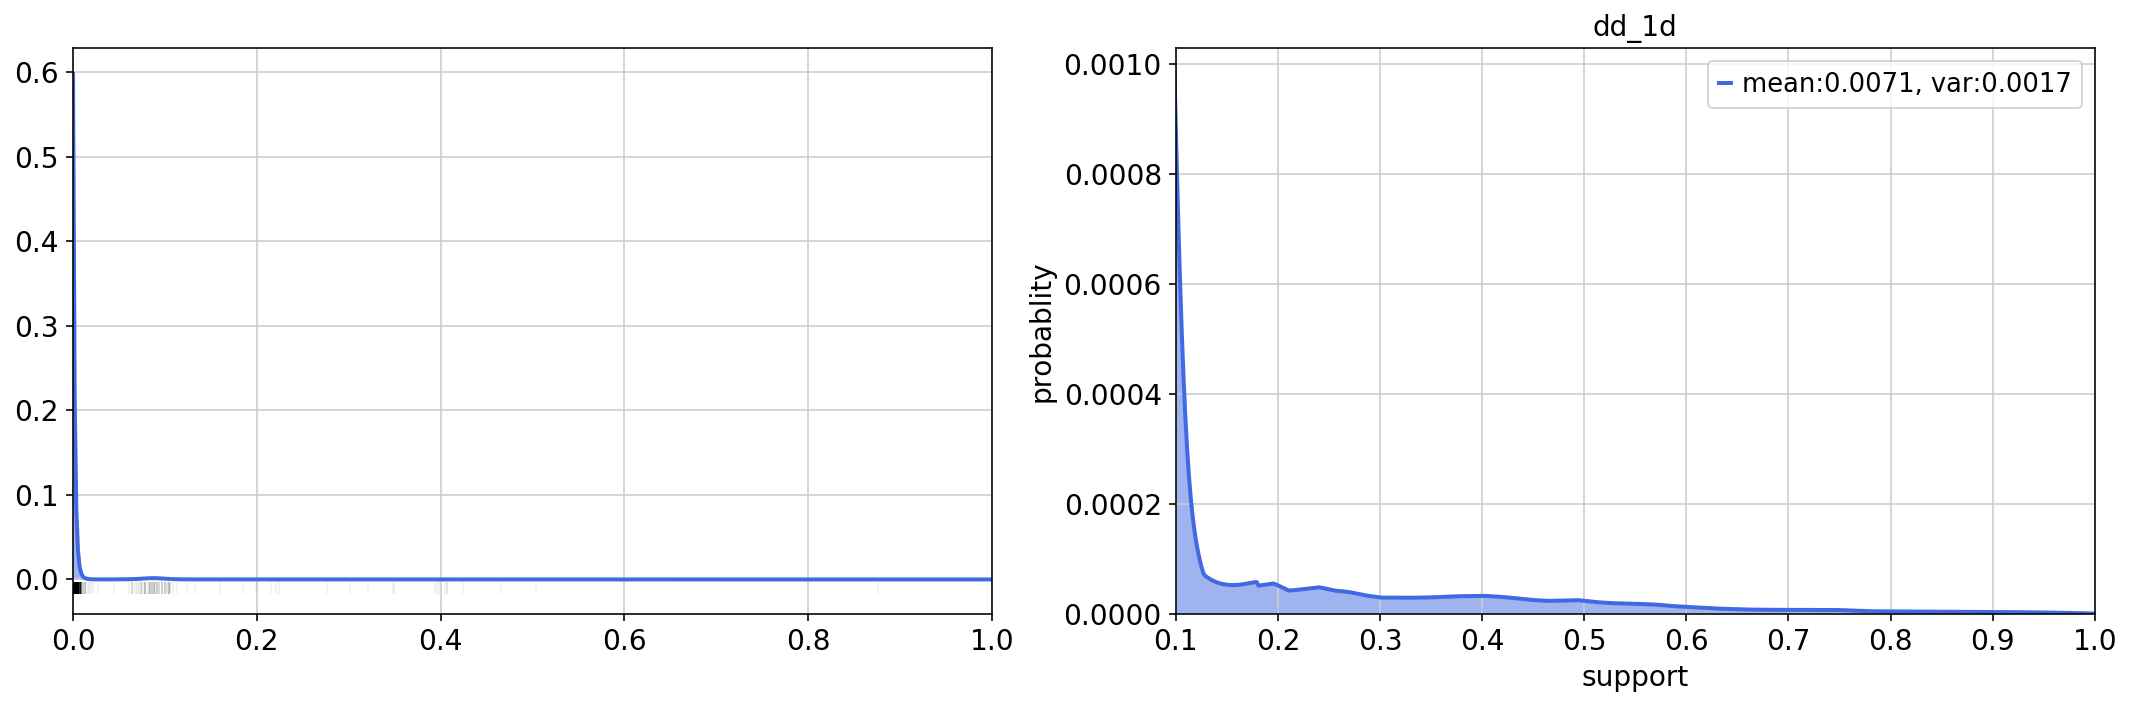

gamma: 67.0
### N_r=1452, mean_cts=9, N_c=10000


/home/martin/single_cell_eb/sc_deconv.py:289: RuntimeWarning: divide by zero encountered in double_scalars
  kernel_gaussian = 1/(np.sqrt(2*np.pi*temp_sigma**2))*np.exp(-(temp_x-x_new[i])**2/2/temp_sigma**2)


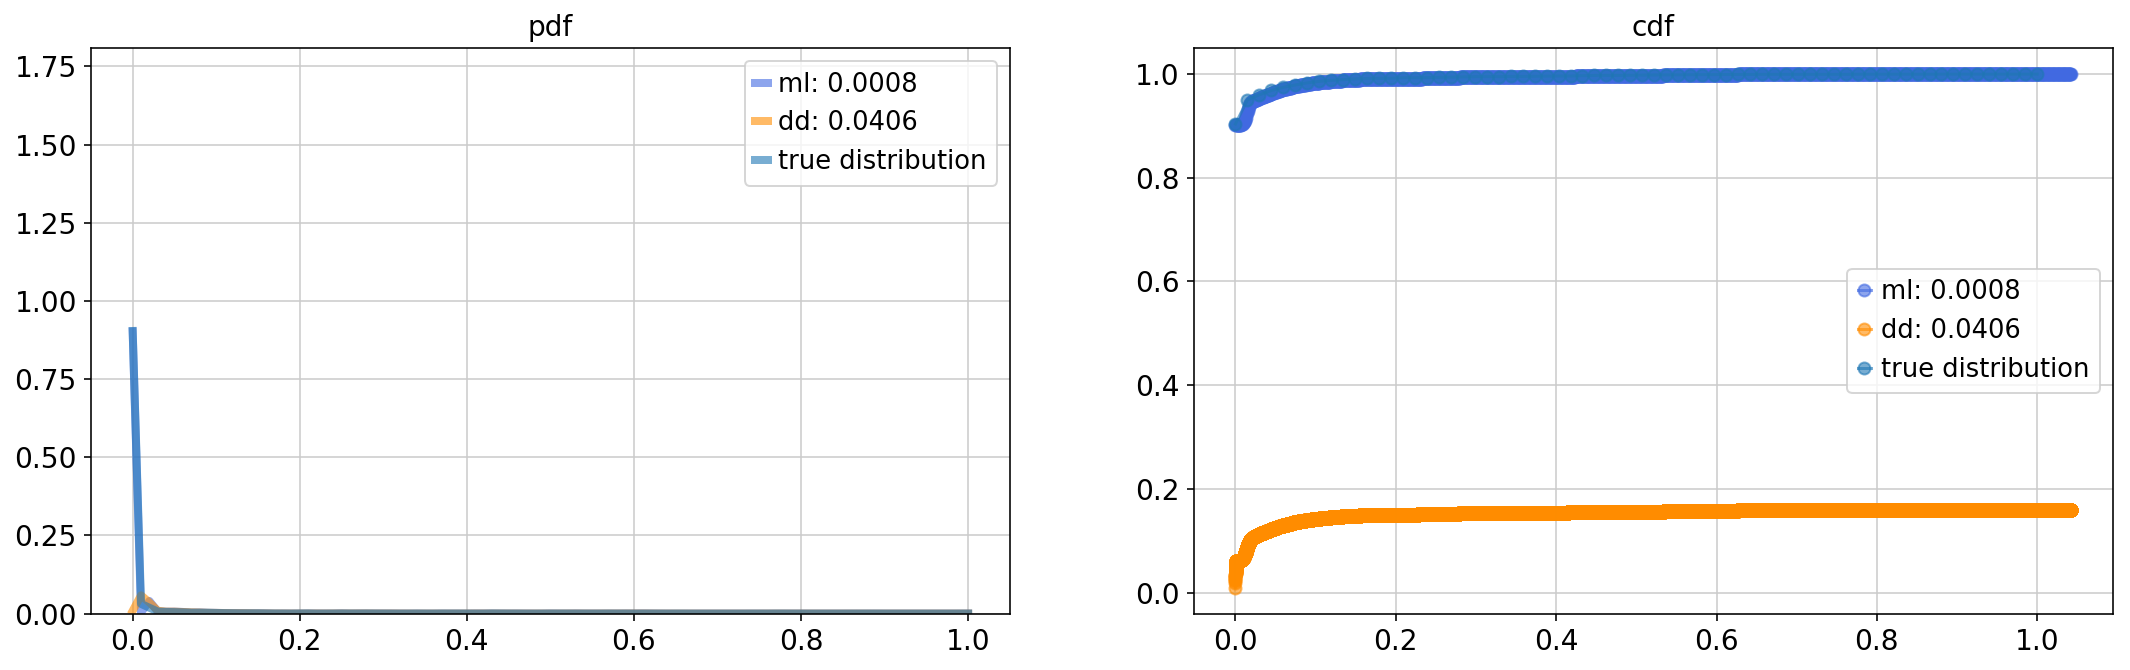



### N_r=14528, mean_cts=99, N_c=1000


In [ ]:
for gene in genes:
    Y=np.array(adata[:,gene].X,dtype=int)
    print(gene)
    print("Average counts per cell =",np.sum(Y)/len(Y))
    plt.figure(figsize=[8,5])
    sns.distplot(Y)
    plt.show()
    plt.figure(figsize=[8,5])
    p_hat_ml,ml_info=ml_1d(Y)
    plt.plot(ml_info['x'],p_hat_ml)
    plt.xlim([0,1])
    plt.title('ML')
    plt.show()

    p_hat,dd_info=dd_1d(Y,noise='poi',verbose=1,gamma=None,debug_mode=True)
    print("gamma:",dd_info['gamma'])
    
    p_gene,x_gene = counts2pdf_1d(Y)
    x_gene = x_gene/x_gene.max()
    comparison_1d(p_gene,x_gene,1e5,mean_cts=[10,100])
    tradeoff_1d(p_gene,x_gene,1e5)
    print("-------------------------------------------------------------------------")

In [ ]:
def plot_density_1d(p,x):
    M1,M2 = moments(p,x)
    plt.figure(figsize=[8,5])
    plt.plot(x,p,marker='.',lw=2,markersize=0,color="royalblue",label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    plt.fill_between(x, p, facecolor='royalblue', alpha=0.5)
    plt.xlim([0,1])
    plt.ylim([0,1.05*np.max(p)])
    
    
#     plt.bar(x,p,label='mean:%s, var:%s'%(str(M1)[0:6],str(M2-M1**2)[0:6]))
    

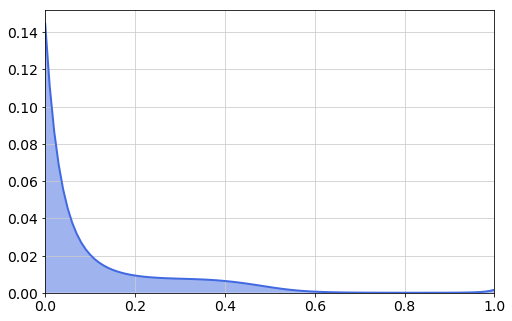

In [218]:
plot_density_1d(p_hat,dd_info['x'])